# **[Run] 0. read_csv**

In [2]:
!git clone https://Gastbylostlove:(access token)@github.com/Gastbylostlove/CRM.git


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `git clone https://Gastbylostlove:(access token)@github.com/Gastbylostlove/CRM.git'


In [3]:
!git config --global user.email gmlrn9571@gmail.com
!git config --global user.name Gastbylostlove

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/fc/파이널프로젝트')
os.getcwd()

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # boxplot
import seaborn as sns # boxplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import re
from datetime import datetime

# 코랩 한글깨짐 방지 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
pd.set_option('display.max_columns',None) #

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/fc/파이널프로젝트'

In [ ]:
# 데이터 불러오기

data = pd.read_csv('차이코퍼레이션 데이터(BA_assesment).csv')
data.head()

# **1. EDA**

## 1-1. Raw Data





**Raw Data**

|Column|customer_id|created_at|pre_discount|post_discount|cashback_amount|discount_amount|total_promotion|
|--|--|--|--|--|--|--|--|
|**Dictionay**|고객식별번호|결제일시|할인 전|할인 후(결제금액)|적립금액|할인금액|총 혜택 받은 금액|
|**Dtype**|int64|object|int64|int64|int64|int64|int64|
|**Data**|1~544,921|yyyy-mm-dd hh:mm:ss.sss|1~1,996,000|0~1,996,000|0~97,473|0~500,000|0~500,000|



|Column|push_permission|gender|is_foreigner|birthday|sign_up_date|merchant_id|
|--|--|--|--|--|--|--|
|**Dictionay**|푸시 여부|성별|외국인 여부|생년월일|가입일시|판매자식별번호(결제채널)|
|**Dtype**|bool|object|bool|object|object|int64|
|**Data**|True/False|female/male|True/False|yyyy-mm-dd|yyyy-mm-dd hh:mm:ss.sss|1~10|

## 1-1-1. EDA_Raw Data

In [ ]:
# 데이터 유형

data.info()
# numeric : integer
# categorical : object
# T/F : boolean
# date : date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623810 entries, 0 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   customer_id      int64 
 1   created_at       object
 2   pre_discount     int64 
 3   post_discount    int64 
 4   cashback_amount  int64 
 5   discount_amount  int64 
 6   total_promotion  int64 
 7   push_permission  bool  
 8   gender           object
 9   is_foreigner     bool  
 10  birthday         object
 11  sign_up_date     object
 12  merchant_id      int64 
dtypes: bool(2), int64(7), object(4)
memory usage: 482.7+ MB


In [ ]:
# NA

data.isnull().sum().sum()

0

## **[Run]** 1-2. Transpose Dtype

**Numeric Data**

|Column|pre_discount|post_discount|cashback_amount|discount_amount|total_promotion|
|--|--|--|--|--|--|
|**Dictionay**|할인 전|할인 후(결제금액)|적립금액|할인금액|총 혜택 받은 금액|
|**Dtype**|int64|int64|int64|int64|int64|int64|
|**Data**|1~1,996,000|0~1,996,000|0~97,473|0~500,000|0~500,000|

**Categorical Data**

|Column|customer_id|push_permission|gender|is_foreigner|merchant_id|
|--|--|--|--|--|--|
|**Dictionay**|고객식별번호|푸시 여부|성별|외국인 여부|판매자식별번호(결제채널)|
|**Dtype**|**object**|bool|object|bool|**object**|
|**Data**|1~544,921|True/False|female/male|True/False|1~10|

**Date Data**

|Column|created_at|birthday|sign_up_date|
|--|--|--|--|
|**Dictionay**|결제일시|생년월일|가입일시|
|**Dtype**|**datetime64[ns]**|**datetime64[ns]**|**datetime64[ns]**|
|**Data**|yyyy-mm-dd hh:mm:ss.sss|yyyy-mm-dd|yyyy-mm-dd hh:mm:ss.sss|

In [ ]:
# ### Transpose Dtype
data['push_permission'] = data['push_permission'].astype(str)
data['is_foreigner'] = data['is_foreigner'].astype(str)
data['customer_id'] = data['customer_id'].astype(str)
data['merchant_id'] = data['merchant_id'].astype(str)
data['created_at'] = pd.to_datetime(data['created_at'])
data['birthday'] = pd.to_datetime(data['birthday'])
data['sign_up_date'] = pd.to_datetime(data['sign_up_date'])
data.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,9
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,4
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,5


## 1-2-1. EDA_Transpose Dtype

In [ ]:
# ### EDA Process
# #1#
# data.info()

# #2#
# data.nunique() # data.unique()

# #3# max(counts), min(counts)
# column = data.columns
# row = data.shape[0]
# for i in column :
#   print(i)
#   print(data[i].value_counts())
#   print(round(data[i].value_counts()/row*100,0))
#   print('------------------------------------------------')

# #4#
# data.describe().round()

# #5# min(unique), max(unique)
# column = ['created_at', 'birthday', 'sign_up_date']
# for i in column :
#   print(i)
#   print(data[i].sort_values().unique())
#   print('------------------------------------------------')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623810 entries, 0 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype         
---  ------           -----         
 0   customer_id      object        
 1   created_at       datetime64[ns]
 2   pre_discount     int64         
 3   post_discount    int64         
 4   cashback_amount  int64         
 5   discount_amount  int64         
 6   total_promotion  int64         
 7   push_permission  object        
 8   gender           object        
 9   is_foreigner     object        
 10  birthday         datetime64[ns]
 11  sign_up_date     datetime64[ns]
 12  merchant_id      object        
dtypes: datetime64[ns](3), int64(5), object(5)
memory usage: 557.8+ MB


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.nunique() # data.unique()

customer_id         544921
created_at         5622647
pre_discount         69956
post_discount        70516
cashback_amount       7964
discount_amount       3863
total_promotion       8577
push_permission          2
gender                   2
is_foreigner             2
birthday             19946
sign_up_date        544807
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data.shape[0]
for i in column :
  print(i)
  print(data[i].value_counts())
  print(round(data[i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     2705
445691    2630
485910    1684
400418    1363
96306     1229
          ... 
1869         1
415134       1
162114       1
225078       1
30777        1
Name: customer_id, Length: 544921, dtype: int64
45419     0.0
445691    0.0
485910    0.0
400418    0.0
96306     0.0
         ... 
1869      0.0
415134    0.0
162114    0.0
225078    0.0
30777     0.0
Name: customer_id, Length: 544921, dtype: float64
------------------------------------------------
created_at
2020-01-30 00:12:06.592    3
2019-09-06 00:31:40.500    2
2019-12-18 10:40:23.350    2
2019-10-13 17:08:33.816    2
2020-01-10 00:34:06.872    2
                          ..
2019-08-28 11:19:01.122    1
2019-10-06 20:39:41.694    1
2019-10-23 22:57:56.263    1
2020-01-18 20:11:47.753    1
2019-11-07 11:33:34.230    1
Name: created_at, Length: 5622647, dtype: int64
2020-01-30 00:12:06.592    0.0
2019-09-06 00:31:40.500    0.0
2019-12-18 10:40:23.350    0.0
2019-10-13 17:08:33.816    0.0
2020-01-10 00:34:06.

In [ ]:
data.describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,5623810.0,5623810.0,5623810.0,5623810.0,5623810.0
mean,20455.0,19034.0,123.0,1421.0,1544.0
std,48732.0,47552.0,594.0,1961.0,1979.0
min,1.0,0.0,0.0,0.0,0.0
25%,7900.0,6900.0,0.0,0.0,542.0
50%,11900.0,10900.0,0.0,1000.0,1000.0
75%,19800.0,17920.0,0.0,2000.0,2000.0
max,1996000.0,1996000.0,97473.0,500000.0,500000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.331000000' '2019-08-01T00:32:56.346000000'
 '2019-08-01T00:32:57.160000000' ... '2020-03-31T23:59:04.295000000'
 '2020-03-31T23:59:11.789000000' '2020-03-31T23:59:14.018000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1926-02-20T00:00:00.000000000' ... '2006-01-26T00:00:00.000000000'
 '2006-02-07T00:00:00.000000000' '2006-02-22T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T15:38:01.007000000' '2019-05-02T21:18:16.853000000'
 '2019-05-02T23:16:34.365000000' ... '2020-03-31T23:44:10.840000000'
 '2020-03-31T23:47:17.563000000' '2020-03-31T23:52:26.260000000']
------------------------------------------------


## 1-2-2. Outlier_Transpose Dtype

In [ ]:
# ### Outlier Process
# #1#
# x = 'birthday'
# x1 = min(data[x])
# data[data[x] == x1].shape

# #2#
# data[data[x] == x1].nunique() # data[data[x] == x1].unique()

# #3# max(counts), min(counts)
# column = data.columns
# row = data[data[x] == x1].shape[0]
# for i in column :
#   print(i)
#   print(data[data[x] == x1][i].value_counts())
#   print(round(data[data[x] == x1][i].value_counts()/row*100,0))
#   print('------------------------------------------------')

# #4#
# data[data[x] == x1].describe().round()

# #5# min(unique), max(unique)
# column = ['created_at', 'birthday', 'sign_up_date']
# for i in column :
#   print(i)
#   print(data[data[x] == x1][i].sort_values().unique())
#   print('------------------------------------------------')

In [ ]:
fin_eda = pd.DataFrame()
column = ['created_at', 'pre_discount', 'post_discount',
          'cashback_amount', 'discount_amount', 'total_promotion',
          'push_permission', 'gender', 'is_foreigner', 'birthday', 'sign_up_date']
x = column[1]
x1 = min(data[x])
n1 = data[data[x] == x1].shape[0]
n2 = data[data[x] == x1].shape[1]
eda = pd.DataFrame({'Column' : [x], 'value' : [x1],
                    'Rows' : [n1], 'Columns' : [n2]})
#2#
eda = pd.concat([eda, pd.DataFrame(data[data[x] == x1].nunique()).transpose()], axis=1)
#3#
row = data[data[x] == x1].shape[0]
cnt = pd.DataFrame()
col = ['push_permission', 'gender', 'is_foreigner']

In [ ]:
j = col[1]
s = round(data[data[x] == x1][j].value_counts()/row*100,0)
c = pd.DataFrame(s).index[0]

In [ ]:
s

female    80.0
male      20.0
Name: gender, dtype: float64

In [ ]:
c

'female'

In [ ]:
s[c]

80.0

In [ ]:
pd.DataFrame({'value' : c, 'percent' : s[c]})

ValueError: ignored

In [ ]:
### Outlier Process Code

fin_eda = pd.DataFrame()
column = ['created_at', 'pre_discount', 'post_discount',
          'cashback_amount', 'discount_amount', 'total_promotion',
          'push_permission', 'gender', 'is_foreigner', 'birthday', 'sign_up_date']
for x in column :
  for x1 in [min(data[x]), max(data[x])] :
    #1#
    n1 = data[data[x] == x1].shape[0]
    n2 = data[data[x] == x1].shape[1]
    eda = pd.DataFrame({'Column' : [x], 'value' : [x1],
                          'Rows' : [n1], 'Columns' : [n2]})
    #2#
    eda = pd.concat([eda, pd.DataFrame(data[data[x] == x1].nunique()).transpose()], axis=1)
    #3#
    row = data[data[x] == x1].shape[0]
    col = ['push_permission', 'gender', 'is_foreigner']
    for j in col :
      s = round(data[data[x] == x1][j].value_counts()/row*100,0)
      c = pd.DataFrame(s).index[0]
      eda = pd.concat([eda, pd.DataFrame(c)], axis=1)
      eda = pd.concat([eda, pd.DataFrame(s[c])], axis=1) #
    #4#
    w = pd.DataFrame(data[data[x] == x1].describe().round())
    eda = pd.concat([eda, pd.DataFrame(w.loc['min']).transpose()], axis=1)
    eda = pd.concat([eda, pd.DataFrame(w.loc['max']).transpose()], axis=1)
    eda = pd.concat([eda, pd.DataFrame(w.loc['mean']).transpose()], axis=1)
    eda = pd.concat([eda, pd.DataFrame(w.loc['50%']).transpose()], axis=1)
    #5#
    col = ['created_at', 'birthday', 'sign_up_date']
    for i in col :
      cnt = data[data[x] == x1][i].sort_values().unique().min()
      cnt = cnt, data[data[x] == x1][i].sort_values().unique().max()
      eda = pd.concat([eda, pd.DataFrame(cnt)], axis=1)

    fin_eda = pd.concat([fin_eda, eda])

fin_eda.head()

ValueError: ignored

### Outlier_birthday_min_1900-01-01

**birthday**

*   **Outlier : 1900-01-01**
  - 8913건, 3902명
  - 1900-01-01 은 이상치이므로 Delete / Predict 할 예정이다. ●
  - created_at 과 sign_up_date 가 2020-01-09 까지 존재하는 것으로 보아, 2020-01-09 이후 회원가입 시스템이 변경되었을 수 있다.
*   1919-05-15
- 1926-02-20
- ...


In [ ]:
# 1900-01-01

x = 'birthday'
x1 = min(data['birthday'])
data[data[x] == x1].shape

(8913, 13)

In [ ]:
# 1900-01-01 # 8913건, 3902명

data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id        3902
created_at         8913
pre_discount       2718
post_discount      2674
cashback_amount       4
discount_amount    1108
total_promotion    1110
push_permission       2
gender                2
is_foreigner          2
birthday              1
sign_up_date       3902
merchant_id          10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
494776    157
231452    137
385075    102
318915     71
130441     70
         ... 
276888      1
119851      1
204718      1
430721      1
219625      1
Name: customer_id, Length: 3902, dtype: int64
494776    2.0
231452    2.0
385075    1.0
318915    1.0
130441    1.0
         ... 
276888    0.0
119851    0.0
204718    0.0
430721    0.0
219625    0.0
Name: customer_id, Length: 3902, dtype: float64
------------------------------------------------
created_at
2019-09-05 13:42:00.829    1
2019-12-24 20:43:27.606    1
2019-09-22 00:38:52.758    1
2019-08-01 20:42:26.339    1
2019-11-08 01:49:46.363    1
                          ..
2019-11-05 13:53:50.743    1
2019-08-01 06:29:22.409    1
2019-08-01 21:37:01.874    1
2019-10-21 06:21:32.110    1
2019-11-13 16:33:05.488    1
Name: created_at, Length: 8913, dtype: int64
2019-09-05 13:42:00.829    0.0
2019-12-24 20:43:27.606    0.0
2019-09-22 00:38:52.758    0.0
2019-08-01 20:42:26.339    0.0
2019-11-08 01:49:46.363    0.0
       

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,8913.0,8913.0,8913.0,8913.0,8913.0
mean,29914.0,26995.0,0.0,2920.0,2920.0
std,99315.0,97160.0,4.0,3341.0,3341.0
min,100.0,0.0,0.0,0.0,0.0
25%,7000.0,4500.0,0.0,988.0,988.0
50%,11010.0,8880.0,0.0,2000.0,2000.0
75%,18161.0,15840.0,0.0,5000.0,5000.0
max,1138000.0,1138000.0,245.0,50000.0,50000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:33:57.985000000' '2019-08-01T00:39:02.829000000'
 '2019-08-01T00:40:52.779000000' ... '2020-01-09T21:20:04.469000000'
 '2020-01-09T21:54:53.725000000' '2020-01-09T22:07:16.061000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-29T10:05:23.821000000' '2019-06-10T23:15:50.237000000'
 '2019-06-13T00:10:02.596000000' ... '2020-01-09T21:08:54.334000000'
 '2020-01-09T21:20:36.561000000' '2020-01-09T22:08:38.317000000']
------------------------------------------------


In [ ]:
# 1900-01-01 # 8913건, 3902명 # Delete / Predict

column = ['sign_up_date', 'created_at']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

sign_up_date
['2019-05-29T10:05:23.821000000' '2019-06-10T23:15:50.237000000'
 '2019-06-13T00:10:02.596000000' ... '2020-01-09T21:08:54.334000000'
 '2020-01-09T21:20:36.561000000' '2020-01-09T22:08:38.317000000']
------------------------------------------------
created_at
['2019-08-01T00:33:57.985000000' '2019-08-01T00:39:02.829000000'
 '2019-08-01T00:40:52.779000000' ... '2020-01-09T21:20:04.469000000'
 '2020-01-09T21:54:53.725000000' '2020-01-09T22:07:16.061000000']
------------------------------------------------


In [ ]:
# 1919-05-15

x1 = '1919-05-15'
data[data[x] == x1].shape

(6, 13)

In [ ]:
# 1919-05-15 # 6건, 1명

data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id        1
created_at         6
pre_discount       3
post_discount      3
cashback_amount    1
discount_amount    3
total_promotion    3
push_permission    1
gender             1
is_foreigner       1
birthday           1
sign_up_date       1
merchant_id        4
dtype: int64

In [ ]:
column = data.columns
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print('------------------------------------------------')

customer_id
463740    6
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2019-09-03 02:56:26.445    1
2019-08-01 01:41:35.631    1
2019-09-03 02:54:13.268    1
2019-08-05 10:30:35.572    1
2019-09-03 02:55:38.687    1
2019-08-05 10:22:45.478    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
16560    3
7000     2
5000     1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
14720    3
4000     2
0        1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
0    6
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
1840    3
3000    2
5000    1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
1840    3
3000    2
5000    1
Name: total_promotion, dtype: int64
------------------------------------------------
pu

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,6.0,6.0,6.0,6.0,6.0
mean,11447.0,8693.0,0.0,2753.0,2753.0
std,5649.0,6762.0,0.0,1239.0,1239.0
min,5000.0,0.0,0.0,1840.0,1840.0
25%,7000.0,4000.0,0.0,1840.0,1840.0
50%,11780.0,9360.0,0.0,2420.0,2420.0
75%,16560.0,14720.0,0.0,3000.0,3000.0
max,16560.0,14720.0,0.0,5000.0,5000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T01:41:35.631000000' '2019-08-05T10:22:45.478000000'
 '2019-08-05T10:30:35.572000000' '2019-09-03T02:54:13.268000000'
 '2019-09-03T02:55:38.687000000' '2019-09-03T02:56:26.445000000']
------------------------------------------------
birthday
['1919-05-15T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-08-01T01:38:50.582000000']
------------------------------------------------


In [ ]:
# 1926-02-20 # 1건, 1명

x1 = '1926-02-20'
data[data[x] == x1].shape

(1, 13)

In [ ]:
data[data[x] == x1]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
2512739,543,2019-08-01 21:02:36.926,5200,200,0,5000,5000,False,male,False,1926-02-20,2019-08-01 21:03:47.271,7


In [ ]:
data[data['birthday'] > '1926-02-20']['birthday'].sort_values().unique()

array(['1926-07-03T00:00:00.000000000', '1927-10-17T00:00:00.000000000',
       '1927-11-02T00:00:00.000000000', ...,
       '2006-01-26T00:00:00.000000000', '2006-02-07T00:00:00.000000000',
       '2006-02-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# 1926-07-03 # 1건, 1명

x1 = '1926-07-03'
data[data[x] == x1].shape

(1, 13)

In [ ]:
data[data[x] == x1]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
5245716,426724,2019-12-03 03:56:05.124,5640,640,0,5000,5000,True,female,False,1926-07-03,2019-12-03 03:59:00.087,1


In [ ]:
# 1927-10-17 # 1건, 1명

x1 = '1927-10-17'
data[data[x] == x1].shape

(1, 13)

In [ ]:
data[data[x] == x1]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
5086271,12475,2019-08-15 09:48:24.969,18660,13920,0,4740,4740,True,female,False,1927-10-17,2019-08-15 09:53:23.378,9


In [ ]:
# 1927-11-02

x1 = '1927-11-02'
data[data[x] == x1].shape

(4, 13)

In [ ]:
# 1927-11-02 # 4건, 1명

data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id        1
created_at         4
pre_discount       3
post_discount      3
cashback_amount    1
discount_amount    1
total_promotion    1
push_permission    1
gender             1
is_foreigner       1
birthday           1
sign_up_date       1
merchant_id        3
dtype: int64

### Outlier_post_discount_min

In [ ]:
x = 'post_discount'
x1 = min(data[x])
data[data[x] == x1].shape

(8973, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id        8958
created_at         8973
pre_discount          6
post_discount         1
cashback_amount       1
discount_amount       6
total_promotion       6
push_permission       2
gender                2
is_foreigner          2
birthday           5907
sign_up_date       8958
merchant_id          10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
129272    2
139566    2
480484    2
63653     2
19974     2
         ..
282139    1
183215    1
437771    1
277556    1
383892    1
Name: customer_id, Length: 8958, dtype: int64
129272    0.0
139566    0.0
480484    0.0
63653     0.0
19974     0.0
         ... 
282139    0.0
183215    0.0
437771    0.0
277556    0.0
383892    0.0
Name: customer_id, Length: 8958, dtype: float64
------------------------------------------------
created_at
2019-08-01 00:52:58.193    1
2019-08-01 08:29:22.205    1
2019-08-01 03:58:15.392    1
2019-08-01 06:51:49.086    1
2019-08-01 17:06:07.013    1
                          ..
2019-08-01 13:55:48.665    1
2019-08-01 13:52:18.898    1
2019-08-01 16:59:21.731    1
2019-08-01 08:41:51.065    1
2019-08-01 08:14:46.676    1
Name: created_at, Length: 8973, dtype: int64
2019-08-01 00:52:58.193    0.0
2019-08-01 08:29:22.205    0.0
2019-08-01 03:58:15.392    0.0
2019-08-01 06:51:49.086    0.0
2019-08-01 17:06:07.013    0.0
                          ...

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,8973.0,8973.0,8973.0,8973.0,8973.0
mean,5023.0,0.0,0.0,5023.0,5023.0
std,436.0,0.0,0.0,436.0,436.0
min,2500.0,0.0,0.0,2500.0,2500.0
25%,5000.0,0.0,0.0,5000.0,5000.0
50%,5000.0,0.0,0.0,5000.0,5000.0
75%,5000.0,0.0,0.0,5000.0,5000.0
max,8000.0,0.0,0.0,8000.0,8000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:33:07.037000000' '2019-08-01T00:33:08.279000000'
 '2019-08-01T00:33:08.749000000' ... '2020-03-30T23:41:31.412000000'
 '2020-03-31T00:57:48.488000000' '2020-03-31T02:34:26.740000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1929-01-02T00:00:00.000000000' ... '2004-09-20T00:00:00.000000000'
 '2004-09-23T00:00:00.000000000' '2005-04-14T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T23:16:34.365000000' '2019-05-02T23:29:30.876000000'
 '2019-06-05T18:16:31.798000000' ... '2020-01-07T08:25:14.961000000'
 '2020-01-21T16:58:26.808000000' '2020-01-25T07:54:08.978000000']
------------------------------------------------


In [ ]:
data[data[x] > x1].shape

(5614837, 13)

In [ ]:
data[data[x] > x1].nunique() # data[data[x] == x1].unique()

customer_id         543555
created_at         5613676
pre_discount         69956
post_discount        70515
cashback_amount       7964
discount_amount       3863
total_promotion       8577
push_permission          2
gender                   2
is_foreigner             2
birthday             19924
sign_up_date        543441
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] > x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] > x1][i].value_counts())
  print(round(data[data[x] > x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     2705
445691    2630
485910    1684
400418    1363
96306     1229
          ... 
478447       1
431194       1
423594       1
51144        1
30777        1
Name: customer_id, Length: 543555, dtype: int64
45419     0.0
445691    0.0
485910    0.0
400418    0.0
96306     0.0
         ... 
478447    0.0
431194    0.0
423594    0.0
51144     0.0
30777     0.0
Name: customer_id, Length: 543555, dtype: float64
------------------------------------------------
created_at
2020-01-30 00:12:06.592    3
2019-10-24 12:33:09.849    2
2019-08-05 01:55:06.278    2
2020-01-02 18:51:12.733    2
2019-11-21 20:32:25.874    2
                          ..
2019-09-24 11:04:25.599    1
2019-11-01 03:26:03.553    1
2019-11-09 02:21:40.723    1
2020-01-30 22:08:40.537    1
2019-11-07 11:33:34.230    1
Name: created_at, Length: 5613676, dtype: int64
2020-01-30 00:12:06.592    0.0
2019-10-24 12:33:09.849    0.0
2019-08-05 01:55:06.278    0.0
2020-01-02 18:51:12.733    0.0
2019-11-21 20:32:25.

In [ ]:
data[data[x] > x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,5614837.0,5614837.0,5614837.0,5614837.0,5614837.0
mean,20480.0,19064.0,123.0,1416.0,1538.0
std,48767.0,47584.0,594.0,1957.0,1976.0
min,1.0,1.0,0.0,0.0,0.0
25%,7900.0,6900.0,0.0,0.0,540.0
50%,11900.0,10900.0,0.0,1000.0,1000.0
75%,19800.0,18000.0,0.0,2000.0,2000.0
max,1996000.0,1996000.0,97473.0,500000.0,500000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] > x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.331000000' '2019-08-01T00:32:56.346000000'
 '2019-08-01T00:32:57.160000000' ... '2020-03-31T23:59:04.295000000'
 '2020-03-31T23:59:11.789000000' '2020-03-31T23:59:14.018000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1926-02-20T00:00:00.000000000' ... '2006-01-26T00:00:00.000000000'
 '2006-02-07T00:00:00.000000000' '2006-02-22T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T15:38:01.007000000' '2019-05-02T21:18:16.853000000'
 '2019-05-02T23:16:34.365000000' ... '2020-03-31T23:44:10.840000000'
 '2020-03-31T23:47:17.563000000' '2020-03-31T23:52:26.260000000']
------------------------------------------------


### Outlier_post_discount_max

**post_discount**
- 1,996,000
  - 1건, 1명
  - **273470**은 충성 고객이다.
- 1,985,950
  - 1건, 1명
  - **79780**은 1번 결제했다.

In [ ]:
# 1,996,000 # 1건, 1명

column = data.columns

for i in column :
  print(i)
  print(data[data['post_discount'] == max(data['post_discount'])][i].value_counts())
  print('------------------------------------------------')

customer_id
273470    1
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2020-02-04 10:30:55.832    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
1996000    1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
1996000    1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
59880    1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
0    1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
59880    1
Name: total_promotion, dtype: int64
------------------------------------------------
push_permission
True    1
Name: push_permission, dtype: int64
------------------------------------------------
gender
female    1
Name: gender, dtype: int64
------------------------------------------------
is_foreigner
False 

In [ ]:
# 1,996,000 # 273470

column = data.columns

for i in column :
  print(i)
  print(data[data['customer_id'] == '273470'][i].sort_values().unique())
  print('------------------------------------------------')

customer_id
['273470']
------------------------------------------------
created_at
['2019-11-19T11:38:01.819000000' '2019-11-27T17:13:19.393000000'
 '2019-12-05T01:04:40.965000000' '2019-12-13T23:18:38.652000000'
 '2019-12-24T08:46:48.148000000' '2020-01-04T01:02:25.052000000'
 '2020-01-06T08:54:43.748000000' '2020-01-12T16:32:35.580000000'
 '2020-01-13T14:25:30.267000000' '2020-01-14T08:57:44.717000000'
 '2020-01-15T00:25:53.570000000' '2020-01-22T00:26:27.070000000'
 '2020-01-26T18:26:46.556000000' '2020-01-28T22:28:42.874000000'
 '2020-01-30T08:57:07.058000000' '2020-01-31T00:26:06.327000000'
 '2020-02-04T10:17:42.706000000' '2020-02-04T10:30:55.832000000'
 '2020-02-14T12:09:58.208000000' '2020-02-18T17:51:07.000000000'
 '2020-02-19T20:07:13.819000000' '2020-03-12T00:20:32.253000000']
------------------------------------------------
pre_discount
[   1900    3398    4900    5900    6900    7525    7900    9300   11800
   12420   15000   17900   19400   20395   34560 1996000]
--------

In [ ]:
data['post_discount'].sort_values().unique()

array([      0,       1,       2, ..., 1976000, 1985950, 1996000])

In [ ]:
# 1,985,950 # 1건, 1명

column = data.columns

for i in column :
  print(i)
  print(data[data['post_discount'] == 1985950][i].value_counts())
  print('------------------------------------------------')

customer_id
79780    1
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2019-12-09 22:34:31.742    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
1990950    1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
1985950    1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
0    1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
5000    1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
5000    1
Name: total_promotion, dtype: int64
------------------------------------------------
push_permission
True    1
Name: push_permission, dtype: int64
------------------------------------------------
gender
male    1
Name: gender, dtype: int64
------------------------------------------------
is_foreigner
False    1


In [ ]:
# 1,985,950 # 79780

column = data.columns

for i in column :
  print(i)
  print(data[data['customer_id'] == '79780'][i].sort_values().unique())
  print('------------------------------------------------')

customer_id
['79780']
------------------------------------------------
created_at
['2019-12-09T22:34:31.742000000']
------------------------------------------------
pre_discount
[1990950]
------------------------------------------------
post_discount
[1985950]
------------------------------------------------
cashback_amount
[0]
------------------------------------------------
discount_amount
[5000]
------------------------------------------------
total_promotion
[5000]
------------------------------------------------
push_permission
['True']
------------------------------------------------
gender
['male']
------------------------------------------------
is_foreigner
['False']
------------------------------------------------
birthday
['1971-07-16T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-12-09T22:29:25.815000000']
------------------------------------------------
merchant_id
['4']
------------------------------------------------


### Outlier_cashback_amount_min

In [ ]:
x = 'cashback_amount'
x1 = min(data[x])
data[data[x] == x1].shape

(4558171, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id         523576
created_at         4557350
pre_discount         61879
post_discount        62078
cashback_amount          1
discount_amount       3863
total_promotion       3863
push_permission          2
gender                   2
is_foreigner             2
birthday             19861
sign_up_date        523465
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     2278
445691    2097
485910    1354
498862     892
262049     826
          ... 
403253       1
481278       1
154755       1
371014       1
30777        1
Name: customer_id, Length: 523576, dtype: int64
45419     0.0
445691    0.0
485910    0.0
498862    0.0
262049    0.0
         ... 
403253    0.0
481278    0.0
154755    0.0
371014    0.0
30777     0.0
Name: customer_id, Length: 523576, dtype: float64
------------------------------------------------
created_at
2020-01-30 00:12:06.592    3
2020-02-06 00:12:05.621    2
2020-03-13 22:19:41.733    2
2019-12-12 10:03:19.588    2
2019-12-25 20:44:09.778    2
                          ..
2020-02-05 00:12:15.953    1
2020-01-25 10:01:59.048    1
2020-01-19 02:21:49.343    1
2020-01-01 22:18:38.899    1
2019-11-07 11:33:34.230    1
Name: created_at, Length: 4557350, dtype: int64
2020-01-30 00:12:06.592    0.0
2020-02-06 00:12:05.621    0.0
2020-03-13 22:19:41.733    0.0
2019-12-12 10:03:19.588    0.0
2019-12-25 20:44:09.

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,4558171.0,4558171.0,4558171.0,4558171.0,4558171.0
mean,20946.0,19257.0,0.0,1689.0,1689.0
std,51968.0,50609.0,0.0,2051.0,2051.0
min,1.0,0.0,0.0,0.0,0.0
25%,7900.0,6800.0,0.0,850.0,850.0
50%,12087.0,10723.0,0.0,1290.0,1290.0
75%,19540.0,17800.0,0.0,2000.0,2000.0
max,1990950.0,1985950.0,0.0,500000.0,500000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.331000000' '2019-08-01T00:32:56.346000000'
 '2019-08-01T00:32:57.160000000' ... '2020-03-31T23:55:27.385000000'
 '2020-03-31T23:56:17.998000000' '2020-03-31T23:57:22.096000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1926-02-20T00:00:00.000000000' ... '2006-01-02T00:00:00.000000000'
 '2006-01-26T00:00:00.000000000' '2006-02-07T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T15:38:01.007000000' '2019-05-02T21:18:16.853000000'
 '2019-05-02T23:16:34.365000000' ... '2020-03-31T23:29:42.272000000'
 '2020-03-31T23:31:34.298000000' '2020-03-31T23:44:10.840000000']
------------------------------------------------


In [ ]:
data[data[x] > x1].shape

(1065639, 13)

In [ ]:
data[data[x] > x1].nunique() # data[data[x] == x1].unique()

customer_id         197266
created_at         1065446
pre_discount         43202
post_discount        43092
cashback_amount       7963
discount_amount         12
total_promotion       8452
push_permission          2
gender                   2
is_foreigner             2
birthday             17222
sign_up_date        197254
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] > x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] > x1][i].value_counts())
  print(round(data[data[x] > x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
400418    1258
96306      590
445691     533
45419      427
465865     364
          ... 
295226       1
98446        1
199181       1
114343       1
98920        1
Name: customer_id, Length: 197266, dtype: int64
400418    0.0
96306     0.0
445691    0.0
45419     0.0
465865    0.0
         ... 
295226    0.0
98446     0.0
199181    0.0
114343    0.0
98920     0.0
Name: customer_id, Length: 197266, dtype: float64
------------------------------------------------
created_at
2020-02-03 10:01:06.432    2
2020-03-13 16:17:55.775    2
2020-03-25 09:00:17.430    2
2020-03-09 09:00:29.573    2
2020-03-10 10:00:34.251    2
                          ..
2020-01-19 16:42:26.792    1
2020-02-05 02:23:50.104    1
2020-03-13 01:31:20.167    1
2020-03-30 10:02:12.845    1
2020-03-09 14:06:25.014    1
Name: created_at, Length: 1065446, dtype: int64
2020-02-03 10:01:06.432    0.0
2020-03-13 16:17:55.775    0.0
2020-03-25 09:00:17.430    0.0
2020-03-09 09:00:29.573    0.0
2020-03-10 10:00:34.

In [ ]:
data[data[x] > x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,1065639.0,1065639.0,1065639.0,1065639.0,1065639.0
mean,18358.0,18082.0,647.0,276.0,923.0
std,31233.0,31247.0,1233.0,826.0,1488.0
min,38.0,38.0,1.0,0.0,1.0
25%,7480.0,6916.0,237.0,0.0,267.0
50%,11800.0,11610.0,404.0,0.0,490.0
75%,20460.0,20040.0,735.0,0.0,1232.0
max,1996000.0,1996000.0,97473.0,300000.0,323250.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] > x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-12-26T01:34:39.548000000' '2020-01-02T00:31:37.148000000'
 '2020-01-02T00:45:25.615000000' ... '2020-03-31T23:59:04.295000000'
 '2020-03-31T23:59:11.789000000' '2020-03-31T23:59:14.018000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1928-01-21T00:00:00.000000000'
 '1929-03-20T00:00:00.000000000' ... '2006-01-18T00:00:00.000000000'
 '2006-01-26T00:00:00.000000000' '2006-02-22T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T21:18:16.853000000' '2019-05-02T23:29:30.876000000'
 '2019-05-09T16:59:16.599000000' ... '2020-03-31T23:41:37.750000000'
 '2020-03-31T23:47:17.563000000' '2020-03-31T23:52:26.260000000']
------------------------------------------------


### Outlier_cashback_amount_max

**cashback_amount**
- 97,473
  - 1건, 1명
  - **106823**은 충성 고객이다.
- 95,735
  - 1건, 1명
  - **502444**은 충성 고객이다.

In [ ]:
# 97,473 # 1건, 1명

column = data.columns

for i in column :
  print(i)
  print(data[data['cashback_amount'] == max(data['cashback_amount'])][i].value_counts())
  print('------------------------------------------------')

customer_id
106823    1
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2020-02-19 18:21:17.422    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
1949490    1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
1949490    1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
97473    1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
0    1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
97473    1
Name: total_promotion, dtype: int64
------------------------------------------------
push_permission
False    1
Name: push_permission, dtype: int64
------------------------------------------------
gender
female    1
Name: gender, dtype: int64
------------------------------------------------
is_foreigner
False

In [ ]:
data[data['customer_id'] == '106823']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
19681,106823,2019-09-15 10:16:05.324,5310,4720,0,590,590,False,female,False,1986-05-15,2019-07-09 13:02:28.524,2
48702,106823,2019-12-07 10:00:07.705,9900,7900,0,2000,2000,False,female,False,1986-05-15,2019-07-09 13:02:28.524,8
89531,106823,2020-03-26 12:56:59.497,3790,3790,188,0,188,False,female,False,1986-05-15,2019-07-09 13:02:28.524,6
237325,106823,2020-01-09 20:50:30.022,19810,18810,0,1000,1000,False,female,False,1986-05-15,2019-07-09 13:02:28.524,7
306286,106823,2020-03-18 09:04:56.990,11700,9700,234,2000,2234,False,female,False,1986-05-15,2019-07-09 13:02:28.524,1
361298,106823,2019-09-16 01:32:25.372,7020,6240,0,780,780,False,female,False,1986-05-15,2019-07-09 13:02:28.524,8
400540,106823,2020-01-09 20:49:39.104,19810,18810,0,1000,1000,False,female,False,1986-05-15,2019-07-09 13:02:28.524,3
423348,106823,2020-01-09 20:44:42.499,19810,18810,0,1000,1000,False,female,False,1986-05-15,2019-07-09 13:02:28.524,4
512303,106823,2020-01-10 00:41:24.117,19810,18810,0,1000,1000,False,female,False,1986-05-15,2019-07-09 13:02:28.524,1
554328,106823,2020-01-28 00:56:32.323,18400,17400,0,1000,1000,False,female,False,1986-05-15,2019-07-09 13:02:28.524,2


In [ ]:
data['cashback_amount'].sort_values().unique()

array([    0,     1,     2, ..., 94935, 95735, 97473])

In [ ]:
# 95735 # 1건, 1명

column = data.columns

for i in column :
  print(i)
  print(data[data['cashback_amount'] == 95735][i].value_counts())
  print('------------------------------------------------')

customer_id
502444    1
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2020-01-16 06:04:17.974    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
1914710    1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
1913710    1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
95735    1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
1000    1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
96735    1
Name: total_promotion, dtype: int64
------------------------------------------------
push_permission
True    1
Name: push_permission, dtype: int64
------------------------------------------------
gender
female    1
Name: gender, dtype: int64
------------------------------------------------
is_foreigner
Fal

In [ ]:
data[data['customer_id'] == '502444']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
4274247,502444,2019-12-18 08:56:21.078,13900,12900,0,1000,1000,True,female,False,1993-04-06,2019-06-30 23:51:43.721,3
4281272,502444,2020-03-13 10:37:55.641,16500,16500,825,0,825,True,female,False,1993-04-06,2019-06-30 23:51:43.721,1
4298102,502444,2019-11-12 00:40:01.807,4950,4400,0,550,550,True,female,False,1993-04-06,2019-06-30 23:51:43.721,7
4300635,502444,2020-01-07 10:13:13.625,9900,8900,0,1000,1000,True,female,False,1993-04-06,2019-06-30 23:51:43.721,3
4311182,502444,2019-09-23 02:25:49.172,15210,13520,0,1690,1690,True,female,False,1993-04-06,2019-06-30 23:51:43.721,7
4313337,502444,2019-10-11 06:35:45.724,3510,3120,0,390,390,True,female,False,1993-04-06,2019-06-30 23:51:43.721,7
4327004,502444,2020-02-03 19:40:21.667,2500,2500,125,0,125,True,female,False,1993-04-06,2019-06-30 23:51:43.721,7
4329112,502444,2019-09-12 05:34:28.141,23800,21800,0,2000,2000,True,female,False,1993-04-06,2019-06-30 23:51:43.721,1
4348680,502444,2020-02-22 02:27:12.926,10700,8700,214,2000,2214,True,female,False,1993-04-06,2019-06-30 23:51:43.721,6
4348720,502444,2020-02-12 09:19:36.994,5900,5900,295,0,295,True,female,False,1993-04-06,2019-06-30 23:51:43.721,3


### Outlier_discount_amount_min

In [ ]:
x = 'discount_amount'
x1 = min(data[x])
data[data[x] == x1].shape

(1454610, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id         270901
created_at         1454372
pre_discount         43167
post_discount        43167
cashback_amount       7418
discount_amount          1
total_promotion       7418
push_permission          2
gender                   2
is_foreigner             2
birthday             18124
sign_up_date        270879
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     2175
445691    2135
400418    1274
485910    1211
96306     1032
          ... 
265328       1
349591       1
352640       1
4405         1
326872       1
Name: customer_id, Length: 270901, dtype: int64
45419     0.0
445691    0.0
400418    0.0
485910    0.0
96306     0.0
         ... 
265328    0.0
349591    0.0
352640    0.0
4405      0.0
326872    0.0
Name: customer_id, Length: 270901, dtype: float64
------------------------------------------------
created_at
2020-02-17 21:50:32.016    2
2020-03-10 09:00:14.565    2
2020-02-24 10:00:17.232    2
2020-03-17 09:00:19.221    2
2020-02-18 22:03:09.329    2
                          ..
2020-02-13 10:01:11.549    1
2020-02-06 01:54:36.111    1
2020-03-13 12:22:04.924    1
2020-03-01 11:45:17.731    1
2019-12-12 07:48:51.491    1
Name: created_at, Length: 1454372, dtype: int64
2020-02-17 21:50:32.016    0.0
2020-03-10 09:00:14.565    0.0
2020-02-24 10:00:17.232    0.0
2020-03-17 09:00:19.221    0.0
2020-02-18 22:03:09.

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,1454610.0,1454610.0,1454610.0,1454610.0,1454610.0
mean,15766.0,15766.0,391.0,0.0,391.0
std,29940.0,29940.0,1006.0,0.0,1006.0
min,1.0,1.0,0.0,0.0,0.0
25%,5880.0,5880.0,0.0,0.0,0.0
50%,9900.0,9900.0,185.0,0.0,185.0
75%,17800.0,17800.0,479.0,0.0,479.0
max,1996000.0,1996000.0,97473.0,0.0,97473.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:33:28.826000000' '2019-08-01T00:33:30.901000000'
 '2019-08-01T00:33:38.670000000' ... '2020-03-31T23:59:04.295000000'
 '2020-03-31T23:59:11.789000000' '2020-03-31T23:59:14.018000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1928-01-21T00:00:00.000000000'
 '1929-03-20T00:00:00.000000000' ... '2006-01-18T00:00:00.000000000'
 '2006-01-26T00:00:00.000000000' '2006-02-22T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T21:18:16.853000000' '2019-05-02T23:29:30.876000000'
 '2019-05-09T16:59:16.599000000' ... '2020-03-31T23:44:10.840000000'
 '2020-03-31T23:47:17.563000000' '2020-03-31T23:52:26.260000000']
------------------------------------------------


In [ ]:
data[data[x] > x1].shape

(4169200, 13)

In [ ]:
data[data[x] > x1].nunique() # data[data[x] == x1].unique()

customer_id         513623
created_at         4168488
pre_discount         61537
post_discount        62021
cashback_amount       4342
discount_amount       3862
total_promotion       6177
push_permission          2
gender                   2
is_foreigner             2
birthday             19825
sign_up_date        513510
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] > x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] > x1][i].value_counts())
  print(round(data[data[x] > x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     530
445691    495
485910    473
112309    402
262049    396
         ... 
44739       1
91775       1
323314      1
99326       1
30777       1
Name: customer_id, Length: 513623, dtype: int64
45419     0.0
445691    0.0
485910    0.0
112309    0.0
262049    0.0
         ... 
44739     0.0
91775     0.0
323314    0.0
99326     0.0
30777     0.0
Name: customer_id, Length: 513623, dtype: float64
------------------------------------------------
created_at
2020-01-30 00:12:06.592    3
2019-08-01 22:48:03.320    2
2020-01-15 22:58:14.699    2
2020-01-14 10:07:27.167    2
2019-08-29 20:23:26.658    2
                          ..
2019-11-09 13:38:44.030    1
2020-02-25 12:27:30.023    1
2020-01-16 18:33:13.257    1
2020-01-19 10:45:10.947    1
2019-11-07 11:33:34.230    1
Name: created_at, Length: 4168488, dtype: int64
2020-01-30 00:12:06.592    0.0
2019-08-01 22:48:03.320    0.0
2020-01-15 22:58:14.699    0.0
2020-01-14 10:07:27.167    0.0
2019-08-29 20:23:26.658    0.0


In [ ]:
data[data[x] > x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,4169200.0,4169200.0,4169200.0,4169200.0,4169200.0
mean,22091.0,20174.0,29.0,1917.0,1946.0
std,53668.0,52272.0,297.0,2058.0,2075.0
min,900.0,0.0,0.0,100.0,100.0
25%,8820.0,7120.0,0.0,1000.0,1000.0
50%,12930.0,11399.0,0.0,1589.0,1618.0
75%,20320.0,18300.0,0.0,2000.0,2000.0
max,1990950.0,1985950.0,95735.0,500000.0,500000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] > x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.331000000' '2019-08-01T00:32:56.346000000'
 '2019-08-01T00:32:57.160000000' ... '2020-03-31T23:49:18.963000000'
 '2020-03-31T23:53:45.008000000' '2020-03-31T23:56:17.998000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1926-02-20T00:00:00.000000000' ... '2005-12-28T00:00:00.000000000'
 '2006-01-02T00:00:00.000000000' '2006-02-07T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T15:38:01.007000000' '2019-05-02T21:18:16.853000000'
 '2019-05-02T23:16:34.365000000' ... '2020-03-29T23:43:41.772000000'
 '2020-03-29T23:50:01.273000000' '2020-03-29T23:51:22.234000000']
------------------------------------------------


### Outlier_discount_amount_max_500,000

**discount_amount**
- **Outlier : 500,000**
  - 2건, 2명
  - 2019-09-04, 2019-12-14 결제
  - **276087, 177212** 모두 마지막 결제 때 500,000원 할인을 받았다. 500,000원 할인 받은 이후 결제 내역이 없다.
- 300,000
  - 6건, 6명
  - 2020-01-23 ~ 2020-03-28 결제

In [ ]:
# 500,000

x = 'discount_amount'
x1 = max(data[x])
data[data[x] == x1].shape

(2, 13)

In [ ]:
# 500,000 # 2건, 2명

data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id        2
created_at         2
pre_discount       2
post_discount      2
cashback_amount    1
discount_amount    1
total_promotion    1
push_permission    1
gender             1
is_foreigner       2
birthday           2
sign_up_date       2
merchant_id        2
dtype: int64

In [ ]:
data[data[x] == x1]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
3137949,276087,2019-09-04 20:41:57.177,1348280,848280,0,500000,500000,True,male,False,1982-03-23,2019-06-04 17:41:01.322,9
5368219,177212,2019-12-14 11:29:32.242,1154400,654400,0,500000,500000,True,male,True,1989-04-22,2019-05-29 18:26:59.748,7


In [ ]:
# 500,000 # 276087 # 2건
# 500,000 # 177212

x = 'customer_id'
x1 = '276087'
data[data[x] == x1].shape

(2, 13)

In [ ]:
data[data[x] == x1]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
3137949,276087,2019-09-04 20:41:57.177,1348280,848280,0,500000,500000,True,male,False,1982-03-23,2019-06-04 17:41:01.322,9
3302718,276087,2019-08-01 23:25:56.135,10730,2730,0,8000,8000,True,male,False,1982-03-23,2019-06-04 17:41:01.322,3


In [ ]:
# 500,000 # 276087 # 2건
# 500,000 # 177212 # 35건

column = data.columns

for i in column :
  print(i)
  print(data[data['customer_id'] == '177212'][i].value_counts())
  print('------------------------------------------------')

customer_id
177212    35
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2019-08-13 06:22:23.519    1
2019-10-09 15:50:28.515    1
2019-08-03 11:34:19.117    1
2019-08-26 05:43:03.285    1
2019-08-30 11:43:30.196    1
2019-12-14 11:29:32.242    1
2019-08-26 05:32:42.986    1
2019-08-28 11:47:30.851    1
2019-08-10 19:09:38.366    1
2019-10-07 06:23:28.294    1
2019-08-21 18:10:54.368    1
2019-08-07 08:07:21.248    1
2019-08-12 09:26:57.238    1
2019-09-03 09:41:55.804    1
2019-08-24 20:18:27.129    1
2019-08-12 09:41:14.218    1
2019-08-12 09:38:01.166    1
2019-08-30 11:40:28.829    1
2019-08-07 08:08:43.399    1
2019-08-29 11:48:57.626    1
2019-09-22 11:27:34.970    1
2019-08-25 20:54:56.772    1
2019-08-07 07:58:29.100    1
2019-08-18 20:53:34.124    1
2019-12-09 09:39:37.286    1
2019-08-02 07:29:57.541    1
2019-09-19 09:15:35.614    1
2019-10-09 19:50:39.776    1
2019-08-11 11:39:09.389    1
2019-08-26 05:31:51.071    1
2019-08-05 03

In [ ]:
column = data.columns
row = data.shape[0]

for i in column :
  print(i)
  print(data[data['customer_id'] == '177212'][i].sort_values().unique())
  print('------------------------------------------------')

customer_id
['177212']
------------------------------------------------
created_at
['2019-08-01T23:17:24.451000000' '2019-08-02T07:29:57.541000000'
 '2019-08-03T11:34:19.117000000' '2019-08-05T03:01:41.607000000'
 '2019-08-05T03:15:33.568000000' '2019-08-05T08:38:13.269000000'
 '2019-08-07T07:58:29.100000000' '2019-08-07T08:07:21.248000000'
 '2019-08-07T08:08:43.399000000' '2019-08-10T19:09:38.366000000'
 '2019-08-11T11:39:09.389000000' '2019-08-12T09:21:30.853000000'
 '2019-08-12T09:26:57.238000000' '2019-08-12T09:38:01.166000000'
 '2019-08-12T09:41:14.218000000' '2019-08-13T06:22:23.519000000'
 '2019-08-18T20:53:34.124000000' '2019-08-21T18:10:54.368000000'
 '2019-08-24T20:18:27.129000000' '2019-08-25T20:54:56.772000000'
 '2019-08-26T05:31:51.071000000' '2019-08-26T05:32:42.986000000'
 '2019-08-26T05:43:03.285000000' '2019-08-28T11:47:30.851000000'
 '2019-08-29T11:48:57.626000000' '2019-08-30T11:40:28.829000000'
 '2019-08-30T11:43:30.196000000' '2019-09-03T09:41:55.804000000'
 '2019-

In [ ]:
data['discount_amount'].sort_values().unique()

array([     0,    100,    101, ...,  65000, 300000, 500000])

In [ ]:
# 300,000 # 6건, 6명

column = data.columns

for i in column :
  print(i)
  print(data[data['discount_amount'] == 300000][i].value_counts())
  print('------------------------------------------------')

customer_id
518590    1
518390    1
522460    1
330038    1
347196    1
476668    1
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2020-01-24 15:42:13.593    1
2020-03-28 19:40:07.091    1
2020-01-24 17:42:53.509    1
2020-02-17 18:50:37.776    1
2020-01-23 23:11:05.447    1
2020-02-07 13:00:38.081    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
465000     1
1244400    1
451243     1
965650     1
315950     1
342200     1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
165000    1
944400    1
151243    1
665650    1
15950     1
42200     1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
0        3
23250    1
22562    1
19313    1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
300000    6
Name: discount_amount, dtype: int64
-------------------

In [ ]:
data[data['discount_amount'] == 300000]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
766529,518590,2020-01-24 15:42:13.593,465000,165000,23250,300000,323250,True,male,False,1991-01-05,2019-06-10 17:54:47.897,3
1712573,518390,2020-03-28 19:40:07.091,1244400,944400,0,300000,300000,True,male,False,1990-01-19,2019-06-10 18:02:18.383,7
3307000,522460,2020-01-24 17:42:53.509,451243,151243,22562,300000,322562,True,female,False,1989-02-22,2019-07-01 16:07:47.771,8
3309071,330038,2020-02-17 18:50:37.776,965650,665650,19313,300000,319313,False,female,False,1992-09-28,2019-11-21 15:10:04.213,4
3502850,347196,2020-01-23 23:11:05.447,315950,15950,0,300000,300000,False,male,False,1990-09-17,2019-07-31 21:42:52.819,6
5042728,476668,2020-02-07 13:00:38.081,342200,42200,0,300000,300000,True,male,False,1987-01-30,2019-06-01 17:59:01.748,5


In [ ]:
# 300,000 # 518590(5) # 518390 # 522460 # 330038 # 347196 # 476668

column = data.columns

for i in column :
  print(i)
  print(data[data['customer_id'] == '518590'][i].value_counts())
  print('------------------------------------------------')

customer_id
518590    5
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2020-01-24 15:42:13.593    1
2020-01-10 18:36:48.124    1
2020-02-08 00:53:24.511    1
2020-01-18 19:09:08.467    1
2020-01-10 18:43:09.484    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
465000    1
28200     1
56700     1
100800    1
45900     1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
165000    1
27600     1
56700     1
99800     1
45900     1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
23250    1
0        1
2835     1
5040     1
2295     1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
0         2
300000    1
600       1
1000      1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
323250    1
600       1
28

In [ ]:
data[data['customer_id'] == '518590']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
766529,518590,2020-01-24 15:42:13.593,465000,165000,23250,300000,323250,True,male,False,1991-01-05,2019-06-10 17:54:47.897,3
1148655,518590,2020-01-10 18:36:48.124,28200,27600,0,600,600,True,male,False,1991-01-05,2019-06-10 17:54:47.897,6
1225914,518590,2020-02-08 00:53:24.511,56700,56700,2835,0,2835,True,male,False,1991-01-05,2019-06-10 17:54:47.897,7
1355282,518590,2020-01-18 19:09:08.467,100800,99800,5040,1000,6040,True,male,False,1991-01-05,2019-06-10 17:54:47.897,2
1355336,518590,2020-01-10 18:43:09.484,45900,45900,2295,0,2295,True,male,False,1991-01-05,2019-06-10 17:54:47.897,4


In [ ]:
# 300,000 # 518590(5) # 518390(2) # 522460 # 330038 # 347196 # 476668

column = data.columns

for i in column :
  print(i)
  print(data[data['customer_id'] == '518390'][i].value_counts())
  print('------------------------------------------------')

customer_id
518390    2
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2020-03-28 19:40:07.091    1
2019-10-15 17:08:08.923    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
1244400    1
6750       1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
944400    1
6000      1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
0    2
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
300000    1
750       1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
300000    1
750       1
Name: total_promotion, dtype: int64
------------------------------------------------
push_permission
True    2
Name: push_permission, dtype: int64
------------------------------------------------
gender
male    2
Name: gender, dtyp

In [ ]:
data[data['customer_id'] == '518390']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
1712573,518390,2020-03-28 19:40:07.091,1244400,944400,0,300000,300000,True,male,False,1990-01-19,2019-06-10 18:02:18.383,7
1893257,518390,2019-10-15 17:08:08.923,6750,6000,0,750,750,True,male,False,1990-01-19,2019-06-10 18:02:18.383,3


In [ ]:
# 300,000 # 518590(5) # 518390(2) # 522460(22) # 330038 # 347196 # 476668

column = data.columns

for i in column :
  print(i)
  print(data[data['customer_id'] == '522460'][i].value_counts())
  print('------------------------------------------------')

customer_id
522460    22
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2019-08-01 20:31:27.132    1
2020-01-22 09:35:32.593    1
2019-08-26 22:56:15.088    1
2020-01-24 17:42:53.509    1
2019-11-11 19:19:46.766    1
2020-03-17 17:07:40.251    1
2019-09-16 18:15:44.181    1
2019-08-05 12:32:07.333    1
2020-03-03 11:39:56.343    1
2019-08-12 22:57:29.401    1
2019-08-05 12:25:12.327    1
2019-10-29 21:32:08.171    1
2019-08-12 22:51:19.068    1
2020-01-22 21:29:46.675    1
2019-10-10 11:16:13.070    1
2019-10-28 19:46:22.647    1
2020-03-17 17:11:10.295    1
2020-02-11 23:15:09.074    1
2019-08-06 16:36:09.091    1
2020-03-04 19:11:20.202    1
2019-08-26 11:06:14.228    1
2020-03-04 14:20:33.823    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
7000      5
85000     2
30254     1
451243    1
6961      1
11900     1
11000     1
30415     1
5623      1
11241     1
13165     1
12430     1
13300   

In [ ]:
data[data['customer_id'] == '522460']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
2832847,522460,2019-08-01 20:31:27.132,30254,25254,0,5000,5000,True,female,False,1989-02-22,2019-07-01 16:07:47.771,5
2841664,522460,2020-01-22 09:35:32.593,85000,82000,0,3000,3000,True,female,False,1989-02-22,2019-07-01 16:07:47.771,7
2860399,522460,2019-08-26 11:06:14.228,32800,29800,0,3000,3000,True,female,False,1989-02-22,2019-07-01 16:07:47.771,2
2892521,522460,2020-03-04 19:11:20.202,18463,18463,922,0,922,True,female,False,1989-02-22,2019-07-01 16:07:47.771,7
2921691,522460,2019-08-06 16:36:09.091,18000,16000,0,2000,2000,True,female,False,1989-02-22,2019-07-01 16:07:47.771,4
2956190,522460,2020-02-11 23:15:09.074,13300,10800,266,2500,2766,True,female,False,1989-02-22,2019-07-01 16:07:47.771,8
2977737,522460,2020-03-17 17:11:10.295,12430,12430,620,0,620,True,female,False,1989-02-22,2019-07-01 16:07:47.771,4
3004644,522460,2019-10-28 19:46:22.647,13165,11703,0,1462,1462,True,female,False,1989-02-22,2019-07-01 16:07:47.771,2
3012439,522460,2019-10-10 11:16:13.070,11241,9992,0,1249,1249,True,female,False,1989-02-22,2019-07-01 16:07:47.771,4
3018423,522460,2020-01-22 21:29:46.675,85000,82000,0,3000,3000,True,female,False,1989-02-22,2019-07-01 16:07:47.771,8


In [ ]:
# 300,000 # 518590(5) # 518390(2) # 522460(22) # 330038(3) # 347196 # 476668

column = data.columns

for i in column :
  print(i)
  print(data[data['customer_id'] == '330038'][i].value_counts())
  print('------------------------------------------------')

customer_id
330038    3
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2020-02-11 23:52:40.920    1
2020-02-17 18:50:37.776    1
2020-02-25 20:17:43.619    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
5500      1
965650    1
12900     1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
5500      1
665650    1
12900     1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
275      1
19313    1
645      1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
0         2
300000    1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
275       1
319313    1
645       1
Name: total_promotion, dtype: int64
------------------------------------------------
push_permission
False    3
Name: push_permission, dtype: 

In [ ]:
data[data['customer_id'] == '330038']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
2801301,330038,2020-02-11 23:52:40.920,5500,5500,275,0,275,False,female,False,1992-09-28,2019-11-21 15:10:04.213,9
3309071,330038,2020-02-17 18:50:37.776,965650,665650,19313,300000,319313,False,female,False,1992-09-28,2019-11-21 15:10:04.213,4
3353852,330038,2020-02-25 20:17:43.619,12900,12900,645,0,645,False,female,False,1992-09-28,2019-11-21 15:10:04.213,4


In [ ]:
# 65,000 # 1건, 1명

column = data.columns

for i in column :
  print(i)
  print(data[data['discount_amount'] == 65000][i].value_counts())
  print('------------------------------------------------')

customer_id
228009    1
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2019-11-16 00:41:03.619    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
498900    1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
433900    1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
0    1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
65000    1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
65000    1
Name: total_promotion, dtype: int64
------------------------------------------------
push_permission
False    1
Name: push_permission, dtype: int64
------------------------------------------------
gender
male    1
Name: gender, dtype: int64
------------------------------------------------
is_foreigner
False    

In [ ]:
data[data['discount_amount'] < 65000]['discount_amount'].sort_values().unique()

array([    0,   100,   101, ..., 40000, 50000, 58000])

In [ ]:
# 58,000 # 1건, 1명

column = data.columns

for i in column :
  print(i)
  print(data[data['discount_amount'] == 58000][i].value_counts())
  print('------------------------------------------------')

customer_id
53426    1
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2019-11-15 14:02:58.626    1
Name: created_at, dtype: int64
------------------------------------------------
pre_discount
437650    1
Name: pre_discount, dtype: int64
------------------------------------------------
post_discount
379650    1
Name: post_discount, dtype: int64
------------------------------------------------
cashback_amount
0    1
Name: cashback_amount, dtype: int64
------------------------------------------------
discount_amount
58000    1
Name: discount_amount, dtype: int64
------------------------------------------------
total_promotion
58000    1
Name: total_promotion, dtype: int64
------------------------------------------------
push_permission
False    1
Name: push_permission, dtype: int64
------------------------------------------------
gender
female    1
Name: gender, dtype: int64
------------------------------------------------
is_foreigner
False   

In [ ]:
# 50,000 # 59건, 59명

column = data.columns

for i in column :
  print(i)
  print(data[data['discount_amount'] == 50000][i].value_counts())
  print('------------------------------------------------')

customer_id
142225    1
473600    1
79338     1
228700    1
487778    1
309509    1
84991     1
517980    1
31080     1
488444    1
121535    1
96373     1
325100    1
138046    1
202721    1
521622    1
223628    1
48953     1
132277    1
294753    1
71665     1
169813    1
83194     1
134276    1
354102    1
178125    1
114639    1
18168     1
314801    1
347475    1
356494    1
480238    1
513500    1
353761    1
239052    1
43856     1
99340     1
314221    1
264700    1
89461     1
280216    1
147359    1
227330    1
102221    1
541490    1
400778    1
184747    1
184652    1
15930     1
12845     1
81687     1
434535    1
283923    1
278799    1
405661    1
299115    1
91965     1
507693    1
512550    1
Name: customer_id, dtype: int64
------------------------------------------------
created_at
2019-11-15 11:27:34.738    1
2019-11-15 11:23:15.853    1
2019-11-16 10:54:21.387    1
2019-11-16 01:09:27.010    1
2019-11-15 17:37:54.662    1
2019-11-15 21:43:51.985    1
2019-11-15 18:

In [ ]:
column = data.columns
row = data.shape[0]

for i in column :
  print(i)
  print(data[data['discount_amount'] == 50000][i].sort_values().unique())
  print('------------------------------------------------')

customer_id
['102221' '114639' '121535' '12845' '132277' '134276' '138046' '142225'
 '147359' '15930' '169813' '178125' '18168' '184652' '184747' '202721'
 '223628' '227330' '228700' '239052' '264700' '278799' '280216' '283923'
 '294753' '299115' '309509' '31080' '314221' '314801' '325100' '347475'
 '353761' '354102' '356494' '400778' '405661' '434535' '43856' '473600'
 '480238' '487778' '488444' '48953' '507693' '512550' '513500' '517980'
 '521622' '541490' '71665' '79338' '81687' '83194' '84991' '89461' '91965'
 '96373' '99340']
------------------------------------------------
created_at
['2019-11-15T00:32:48.844000000' '2019-11-15T00:38:04.613000000'
 '2019-11-15T02:47:00.899000000' '2019-11-15T03:40:21.860000000'
 '2019-11-15T06:13:48.262000000' '2019-11-15T07:16:41.693000000'
 '2019-11-15T07:29:15.176000000' '2019-11-15T10:11:51.760000000'
 '2019-11-15T11:03:34.127000000' '2019-11-15T11:23:15.853000000'
 '2019-11-15T11:24:27.594000000' '2019-11-15T11:27:34.738000000'
 '2019-11-15T

In [ ]:
# 40,000 # 473건, 440명

column = data.columns

for i in column :
  print(i)
  print(data[data['discount_amount'] == 40000][i].value_counts())
  print('------------------------------------------------')

customer_id
202232    3
153741    3
209188    3
230370    3
494218    3
         ..
151284    1
490122    1
382549    1
288180    1
130679    1
Name: customer_id, Length: 440, dtype: int64
------------------------------------------------
created_at
2019-10-24 01:34:04.885    1
2019-11-13 01:37:42.251    1
2019-11-13 01:35:13.174    1
2019-10-24 00:32:14.281    1
2019-10-24 06:06:01.426    1
                          ..
2019-10-24 00:41:36.490    1
2019-11-13 02:03:58.161    1
2019-11-13 01:36:56.578    1
2019-10-24 07:26:04.978    1
2019-11-13 01:55:19.096    1
Name: created_at, Length: 473, dtype: int64
------------------------------------------------
pre_discount
121900    255
925000    124
120000     26
120900     12
121500      7
126900      5
125900      5
122900      4
120980      3
120500      3
124900      3
125210      2
128900      2
121820      2
124800      2
120710      1
129900      1
120780      1
120010      1
124500      1
130800      1
123900      1
122800      1
1471

In [ ]:
column = data.columns
row = data.shape[0]

for i in column :
  print(i)
  print(data[data['discount_amount'] == 40000][i].sort_values().unique())
  print('------------------------------------------------')

customer_id
['101033' '101934' '102554' '102684' '105371' '107263' '107556' '108803'
 '109730' '110421' '112510' '115090' '115812' '116509' '117462' '118472'
 '124133' '126122' '126584' '127240' '12733' '128290' '130679' '13075'
 '13473' '139207' '140428' '140542' '142710' '14400' '144971' '145432'
 '14656' '149263' '150355' '151284' '153741' '154624' '155274' '156693'
 '156960' '157952' '157990' '158329' '159514' '160066' '161432' '162319'
 '165385' '167854' '167927' '16902' '169334' '170029' '171490' '174778'
 '176793' '177681' '177882' '178531' '17856' '178598' '179627' '184793'
 '185000' '185754' '188479' '188708' '191775' '192045' '192609' '193488'
 '194259' '195005' '196643' '196748' '197331' '199538' '202232' '202317'
 '20258' '20568' '206213' '209092' '209188' '210570' '210689' '212558'
 '214572' '215624' '216823' '217028' '218988' '220414' '223018' '223990'
 '224011' '224593' '226462' '226611' '227594' '229475' '229921' '230370'
 '232942' '233616' '234516' '235571' '237022' '2

### Outlier_total_promotion_min

In [ ]:
x = 'total_promotion'
x1 = min(data[x])
data[data[x] == x1].shape

(562080, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id        193709
created_at         562041
pre_discount        16612
post_discount       16612
cashback_amount         1
discount_amount         1
total_promotion         1
push_permission         2
gender                  2
is_foreigner            2
birthday            17416
sign_up_date       193700
merchant_id            10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     1748
445691    1602
485910     881
498862     730
96306      456
          ... 
324670       1
460932       1
358456       1
69842        1
326872       1
Name: customer_id, Length: 193709, dtype: int64
45419     0.0
445691    0.0
485910    0.0
498862    0.0
96306     0.0
         ... 
324670    0.0
460932    0.0
358456    0.0
69842     0.0
326872    0.0
Name: customer_id, Length: 193709, dtype: float64
------------------------------------------------
created_at
2019-12-26 00:30:24.897    2
2019-12-06 10:01:27.872    2
2020-03-13 22:19:41.733    2
2020-01-04 00:55:43.685    2
2020-01-08 13:28:41.791    2
                          ..
2019-08-12 19:57:43.624    1
2020-01-15 20:41:43.733    1
2020-01-06 13:29:19.571    1
2019-10-09 11:37:37.136    1
2019-12-12 07:48:51.491    1
Name: created_at, Length: 562041, dtype: int64
2019-12-26 00:30:24.897    0.0
2019-12-06 10:01:27.872    0.0
2020-03-13 22:19:41.733    0.0
2020-01-04 00:55:43.685    0.0
2020-01-08 13:28:41.7

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,562080.0,562080.0,562080.0,562080.0,562080.0
mean,11309.0,11309.0,0.0,0.0,0.0
std,25917.0,25917.0,0.0,0.0,0.0
min,1.0,1.0,0.0,0.0,0.0
25%,4740.0,4740.0,0.0,0.0,0.0
50%,7800.0,7800.0,0.0,0.0,0.0
75%,11800.0,11800.0,0.0,0.0,0.0
max,1790000.0,1790000.0,0.0,0.0,0.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:33:28.826000000' '2019-08-01T00:33:30.901000000'
 '2019-08-01T00:33:38.670000000' ... '2020-03-31T23:54:26.144000000'
 '2020-03-31T23:55:27.385000000' '2020-03-31T23:57:22.096000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1928-01-21T00:00:00.000000000'
 '1930-02-15T00:00:00.000000000' ... '2005-12-22T00:00:00.000000000'
 '2005-12-28T00:00:00.000000000' '2006-01-26T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-09T16:59:16.599000000' '2019-05-14T10:28:41.093000000'
 '2019-05-14T15:45:06.997000000' ... '2020-03-31T23:29:42.272000000'
 '2020-03-31T23:31:34.298000000' '2020-03-31T23:44:10.840000000']
------------------------------------------------


In [ ]:
data[data[x] > x1].shape

(5061730, 13)

In [ ]:
data[data[x] > x1].nunique() # data[data[x] == x1].unique()

customer_id         529057
created_at         5060765
pre_discount         69230
post_discount        69837
cashback_amount       7964
discount_amount       3863
total_promotion       8576
push_permission          2
gender                   2
is_foreigner             2
birthday             19885
sign_up_date        528943
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] > x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] > x1][i].value_counts())
  print(round(data[data[x] > x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
400418    1294
445691    1028
45419      957
485910     803
96306      773
          ... 
530694       1
301351       1
419612       1
471206       1
30777        1
Name: customer_id, Length: 529057, dtype: int64
400418    0.0
445691    0.0
45419     0.0
485910    0.0
96306     0.0
         ... 
530694    0.0
301351    0.0
419612    0.0
471206    0.0
30777     0.0
Name: customer_id, Length: 529057, dtype: float64
------------------------------------------------
created_at
2020-01-30 00:12:06.592    3
2020-03-01 13:49:42.557    2
2019-08-10 10:41:19.931    2
2019-11-13 00:30:07.791    2
2020-02-27 12:01:44.794    2
                          ..
2019-08-26 12:30:32.317    1
2019-09-23 00:44:38.789    1
2019-09-29 14:43:07.892    1
2019-11-06 13:58:30.524    1
2019-11-07 11:33:34.230    1
Name: created_at, Length: 5060765, dtype: int64
2020-01-30 00:12:06.592    0.0
2020-03-01 13:49:42.557    0.0
2019-08-10 10:41:19.931    0.0
2019-11-13 00:30:07.791    0.0
2020-02-27 12:01:44.

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,562080.0,562080.0,562080.0,562080.0,562080.0
mean,11309.0,11309.0,0.0,0.0,0.0
std,25917.0,25917.0,0.0,0.0,0.0
min,1.0,1.0,0.0,0.0,0.0
25%,4740.0,4740.0,0.0,0.0,0.0
50%,7800.0,7800.0,0.0,0.0,0.0
75%,11800.0,11800.0,0.0,0.0,0.0
max,1790000.0,1790000.0,0.0,0.0,0.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] > x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.331000000' '2019-08-01T00:32:56.346000000'
 '2019-08-01T00:32:57.160000000' ... '2020-03-31T23:59:04.295000000'
 '2020-03-31T23:59:11.789000000' '2020-03-31T23:59:14.018000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1926-02-20T00:00:00.000000000' ... '2006-01-26T00:00:00.000000000'
 '2006-02-07T00:00:00.000000000' '2006-02-22T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T15:38:01.007000000' '2019-05-02T21:18:16.853000000'
 '2019-05-02T23:16:34.365000000' ... '2020-03-31T23:41:37.750000000'
 '2020-03-31T23:47:17.563000000' '2020-03-31T23:52:26.260000000']
------------------------------------------------


### Outlier_push_permission_True

In [ ]:
x = 'push_permission'
x1 = 'True'
data[data[x] == x1].shape

(2907346, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id         228121
created_at         2907046
pre_discount         56684
post_discount        56989
cashback_amount       6446
discount_amount       3396
total_promotion       7153
push_permission          1
gender                   2
is_foreigner             2
birthday             18946
sign_up_date        228105
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     2705
445691    2630
485910    1684
400418    1363
96306     1229
          ... 
515865       1
472963       1
128090       1
468690       1
434118       1
Name: customer_id, Length: 228121, dtype: int64
45419     0.0
445691    0.0
485910    0.0
400418    0.0
96306     0.0
         ... 
515865    0.0
472963    0.0
128090    0.0
468690    0.0
434118    0.0
Name: customer_id, Length: 228121, dtype: float64
------------------------------------------------
created_at
2019-10-23 14:41:57.886    2
2020-02-06 11:35:31.326    2
2019-12-13 10:04:16.248    2
2020-02-12 16:51:22.288    2
2020-01-15 21:36:29.308    2
                          ..
2019-10-28 02:11:19.999    1
2019-11-29 21:47:42.980    1
2019-11-19 23:18:43.092    1
2019-12-04 14:52:02.546    1
2019-11-07 11:33:34.230    1
Name: created_at, Length: 2907046, dtype: int64
2019-10-23 14:41:57.886    0.0
2020-02-06 11:35:31.326    0.0
2019-12-13 10:04:16.248    0.0
2020-02-12 16:51:22.288    0.0
2020-01-15 21:36:29.

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,2907346.0,2907346.0,2907346.0,2907346.0,2907346.0
mean,19577.0,18246.0,128.0,1331.0,1459.0
std,43630.0,42607.0,585.0,1826.0,1847.0
min,1.0,0.0,0.0,0.0,0.0
25%,7900.0,6900.0,0.0,0.0,495.0
50%,11900.0,10900.0,0.0,1000.0,1000.0
75%,19800.0,17900.0,0.0,2000.0,2000.0
max,1996000.0,1996000.0,95735.0,500000.0,500000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.331000000' '2019-08-01T00:32:57.680000000'
 '2019-08-01T00:32:57.712000000' ... '2020-03-31T23:58:55.267000000'
 '2020-03-31T23:59:11.789000000' '2020-03-31T23:59:14.018000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1926-07-03T00:00:00.000000000'
 '1927-10-17T00:00:00.000000000' ... '2005-12-28T00:00:00.000000000'
 '2006-01-26T00:00:00.000000000' '2006-02-22T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T15:38:01.007000000' '2019-05-02T21:18:16.853000000'
 '2019-05-02T23:16:34.365000000' ... '2020-03-31T23:18:08.563000000'
 '2020-03-31T23:27:20.674000000' '2020-03-31T23:47:17.563000000']
------------------------------------------------


### Outlier_push_permission_False

In [ ]:
x = 'push_permission'
x1 = 'False'
data[data[x] == x1].shape

(2716464, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id         316800
created_at         2716187
pre_discount         52728
post_discount        52943
cashback_amount       6200
discount_amount       3444
total_promotion       6950
push_permission          1
gender                   2
is_foreigner             2
birthday             16820
sign_up_date        316754
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
112309    477
543273    426
506352    426
156394    425
530784    399
         ... 
186618      1
34085       1
279763      1
1046        1
30777       1
Name: customer_id, Length: 316800, dtype: int64
112309    0.0
543273    0.0
506352    0.0
156394    0.0
530784    0.0
         ... 
186618    0.0
34085     0.0
279763    0.0
1046      0.0
30777     0.0
Name: customer_id, Length: 316800, dtype: float64
------------------------------------------------
created_at
2020-01-13 02:41:57.112    2
2020-02-17 21:03:40.859    2
2020-01-31 04:33:08.009    2
2019-08-01 00:55:56.531    2
2019-08-12 22:42:30.660    2
                          ..
2020-01-17 11:50:18.157    1
2019-11-05 10:00:11.547    1
2019-11-08 20:11:03.850    1
2020-01-26 01:07:36.579    1
2019-10-01 03:32:17.435    1
Name: created_at, Length: 2716187, dtype: int64
2020-01-13 02:41:57.112    0.0
2020-02-17 21:03:40.859    0.0
2020-01-31 04:33:08.009    0.0
2019-08-01 00:55:56.531    0.0
2019-08-12 22:42:30.660    0.0


In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,2716464.0,2716464.0,2716464.0,2716464.0,2716464.0
mean,21395.0,19877.0,117.0,1518.0,1635.0
std,53641.0,52317.0,603.0,2091.0,2108.0
min,1.0,0.0,0.0,0.0,0.0
25%,7900.0,6798.0,0.0,228.0,586.0
50%,12000.0,10900.0,0.0,1000.0,1134.0
75%,19800.0,18000.0,0.0,2000.0,2000.0
max,1986000.0,1976000.0,97473.0,300000.0,319313.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.346000000' '2019-08-01T00:32:57.160000000'
 '2019-08-01T00:32:59.269000000' ... '2020-03-31T23:57:26.637000000'
 '2020-03-31T23:58:51.744000000' '2020-03-31T23:59:04.295000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1926-02-20T00:00:00.000000000' ... '2006-01-02T00:00:00.000000000'
 '2006-01-18T00:00:00.000000000' '2006-02-07T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-06-09T21:07:00.031000000' '2019-06-09T21:14:36.196000000'
 '2019-06-09T22:06:06.741000000' ... '2020-03-31T23:41:37.750000000'
 '2020-03-31T23:44:10.840000000' '2020-03-31T23:52:26.260000000']
------------------------------------------------


### Outlier_gender_female

In [ ]:
x = 'gender'
x1 = 'female'
data[data[x] == x1].shape

(4070077, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id         349482
created_at         4069488
pre_discount         61396
post_discount        61955
cashback_amount       6615
discount_amount       3664
total_promotion       7289
push_permission          2
gender                   1
is_foreigner             2
birthday             18625
sign_up_date        349448
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     2705
445691    2630
485910    1684
400418    1363
96306     1229
          ... 
173961       1
143882       1
504675       1
396860       1
30777        1
Name: customer_id, Length: 349482, dtype: int64
45419     0.0
445691    0.0
485910    0.0
400418    0.0
96306     0.0
         ... 
173961    0.0
143882    0.0
504675    0.0
396860    0.0
30777     0.0
Name: customer_id, Length: 349482, dtype: float64
------------------------------------------------
created_at
2019-12-30 00:34:02.230    2
2019-10-05 01:23:45.958    2
2019-10-23 01:24:47.623    2
2019-11-25 15:17:04.929    2
2020-01-06 17:41:15.652    2
                          ..
2020-02-28 10:02:28.634    1
2020-03-20 16:40:04.282    1
2020-02-24 17:19:40.238    1
2020-02-26 10:54:32.059    1
2019-11-07 11:33:34.230    1
Name: created_at, Length: 4069488, dtype: int64
2019-12-30 00:34:02.230    0.0
2019-10-05 01:23:45.958    0.0
2019-10-23 01:24:47.623    0.0
2019-11-25 15:17:04.929    0.0
2020-01-06 17:41:15.

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,4070077.0,4070077.0,4070077.0,4070077.0,4070077.0
mean,18961.0,17631.0,118.0,1330.0,1448.0
std,38776.0,37870.0,522.0,1666.0,1672.0
min,1.0,0.0,0.0,0.0,0.0
25%,7900.0,6900.0,0.0,0.0,500.0
50%,11970.0,10900.0,0.0,1000.0,1000.0
75%,19800.0,17999.0,0.0,2000.0,2000.0
max,1996000.0,1996000.0,97473.0,300000.0,322562.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.346000000' '2019-08-01T00:32:57.680000000'
 '2019-08-01T00:32:58.299000000' ... '2020-03-31T23:58:55.267000000'
 '2020-03-31T23:59:04.295000000' '2020-03-31T23:59:11.789000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1926-07-03T00:00:00.000000000' ... '2006-01-02T00:00:00.000000000'
 '2006-01-26T00:00:00.000000000' '2006-02-22T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-09T17:44:35.764000000' '2019-05-29T10:05:23.821000000'
 '2019-05-29T12:45:25.013000000' ... '2020-03-31T23:27:20.674000000'
 '2020-03-31T23:31:34.298000000' '2020-03-31T23:52:26.260000000']
------------------------------------------------


### Outlier_gender_male

In [ ]:
x = 'gender'
x1 = 'male'
data[data[x] == x1].shape

(1553733, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id         195439
created_at         1553646
pre_discount         44995
post_discount        45100
cashback_amount       5894
discount_amount       3043
total_promotion       6689
push_permission          2
gender                   1
is_foreigner             2
birthday             17470
sign_up_date        195417
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
112309    477
344388    416
465865    396
493698    394
386652    379
         ... 
356570      1
89443       1
250203      1
487618      1
434118      1
Name: customer_id, Length: 195439, dtype: int64
112309    0.0
344388    0.0
465865    0.0
493698    0.0
386652    0.0
         ... 
356570    0.0
89443     0.0
250203    0.0
487618    0.0
434118    0.0
Name: customer_id, Length: 195439, dtype: float64
------------------------------------------------
created_at
2019-11-07 13:01:10.917    2
2019-11-15 10:00:26.747    2
2019-08-19 07:01:57.265    2
2019-08-19 00:30:04.230    2
2019-08-01 14:27:30.307    2
                          ..
2019-11-28 11:13:30.174    1
2019-08-12 19:58:45.232    1
2019-10-25 21:39:59.636    1
2020-01-24 18:44:06.900    1
2019-10-01 03:32:17.435    1
Name: created_at, Length: 1553646, dtype: int64
2019-11-07 13:01:10.917    0.0
2019-11-15 10:00:26.747    0.0
2019-08-19 07:01:57.265    0.0
2019-08-19 00:30:04.230    0.0
2019-08-01 14:27:30.307    0.0


In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,1553733.0,1553733.0,1553733.0,1553733.0,1553733.0
mean,24369.0,22709.0,135.0,1661.0,1795.0
std,68086.0,66400.0,748.0,2563.0,2602.0
min,1.0,0.0,0.0,0.0,0.0
25%,7650.0,6304.0,0.0,300.0,621.0
50%,11900.0,10584.0,0.0,1070.0,1290.0
75%,19800.0,17900.0,0.0,2000.0,2000.0
max,1990950.0,1985950.0,94772.0,500000.0,500000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.331000000' '2019-08-01T00:32:57.160000000'
 '2019-08-01T00:32:57.712000000' ... '2020-03-31T23:57:22.006000000'
 '2020-03-31T23:57:26.637000000' '2020-03-31T23:59:14.018000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1926-02-20T00:00:00.000000000'
 '1927-11-25T00:00:00.000000000' ... '2006-01-18T00:00:00.000000000'
 '2006-01-26T00:00:00.000000000' '2006-02-07T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T15:38:01.007000000' '2019-05-02T21:18:16.853000000'
 '2019-05-02T23:16:34.365000000' ... '2020-03-31T23:41:37.750000000'
 '2020-03-31T23:44:10.840000000' '2020-03-31T23:47:17.563000000']
------------------------------------------------


### Outlier_is_foreigner_False

In [ ]:
x = 'is_foreigner'
x1 = 'False'
data[data[x] == x1].shape

(5561804, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id         541780
created_at         5560670
pre_discount         69655
post_discount        70215
cashback_amount       7914
discount_amount       3858
total_promotion       8523
push_permission          2
gender                   2
is_foreigner             1
birthday             19943
sign_up_date        541667
merchant_id             10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
45419     2705
445691    2630
485910    1684
400418    1363
313856     585
          ... 
318726       1
26987        1
397957       1
420344       1
30777        1
Name: customer_id, Length: 541780, dtype: int64
45419     0.0
445691    0.0
485910    0.0
400418    0.0
313856    0.0
         ... 
318726    0.0
26987     0.0
397957    0.0
420344    0.0
30777     0.0
Name: customer_id, Length: 541780, dtype: float64
------------------------------------------------
created_at
2020-01-30 00:12:06.592    3
2019-08-26 07:34:48.783    2
2019-12-30 00:41:01.756    2
2019-10-02 00:31:17.248    2
2019-09-02 13:07:57.767    2
                          ..
2020-01-15 09:13:45.991    1
2019-09-03 12:01:39.304    1
2019-10-07 21:12:38.022    1
2019-11-25 16:30:54.659    1
2019-11-07 11:33:34.230    1
Name: created_at, Length: 5560670, dtype: int64
2020-01-30 00:12:06.592    0.0
2019-08-26 07:34:48.783    0.0
2019-12-30 00:41:01.756    0.0
2019-10-02 00:31:17.248    0.0
2019-09-02 13:07:57.

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,5561804.0,5561804.0,5561804.0,5561804.0,5561804.0
mean,20463.0,19038.0,122.0,1425.0,1547.0
std,48893.0,47710.0,593.0,1954.0,1973.0
min,1.0,0.0,0.0,0.0,0.0
25%,7900.0,6900.0,0.0,0.0,548.0
50%,11900.0,10900.0,0.0,1000.0,1000.0
75%,19800.0,17900.0,0.0,2000.0,2000.0
max,1996000.0,1996000.0,97473.0,500000.0,500000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:32:56.331000000' '2019-08-01T00:32:56.346000000'
 '2019-08-01T00:32:57.160000000' ... '2020-03-31T23:59:04.295000000'
 '2020-03-31T23:59:11.789000000' '2020-03-31T23:59:14.018000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1919-05-15T00:00:00.000000000'
 '1926-02-20T00:00:00.000000000' ... '2006-01-26T00:00:00.000000000'
 '2006-02-07T00:00:00.000000000' '2006-02-22T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-02T15:38:01.007000000' '2019-05-02T21:18:16.853000000'
 '2019-05-02T23:16:34.365000000' ... '2020-03-31T23:41:37.750000000'
 '2020-03-31T23:44:10.840000000' '2020-03-31T23:52:26.260000000']
------------------------------------------------


### Outlier_is_foreigner_True

In [ ]:
x = 'is_foreigner'
x1 = 'True'
data[data[x] == x1].shape

(62006, 13)

In [ ]:
data[data[x] == x1].nunique() # data[data[x] == x1].unique()

customer_id         3141
created_at         62006
pre_discount        8004
post_discount       8096
cashback_amount     2040
discount_amount     1630
total_promotion     2788
push_permission        2
gender                 2
is_foreigner           1
birthday            2664
sign_up_date        3141
merchant_id           10
dtype: int64

In [ ]:
column = data.columns
row = data[data[x] == x1].shape[0]
for i in column :
  print(i)
  print(data[data[x] == x1][i].value_counts())
  print(round(data[data[x] == x1][i].value_counts()/row*100,0))
  print('------------------------------------------------')

customer_id
96306     1229
262049    1127
357525    1020
498862    1013
224460     556
          ... 
337409       1
446784       1
91674        1
311783       1
242661       1
Name: customer_id, Length: 3141, dtype: int64
96306     2.0
262049    2.0
357525    2.0
498862    2.0
224460    1.0
         ... 
337409    0.0
446784    0.0
91674     0.0
311783    0.0
242661    0.0
Name: customer_id, Length: 3141, dtype: float64
------------------------------------------------
created_at
2020-03-03 06:47:25.038    1
2019-08-18 10:08:04.637    1
2019-12-08 12:32:25.991    1
2019-12-12 10:21:19.505    1
2019-12-03 22:24:12.836    1
                          ..
2019-11-24 03:10:44.219    1
2019-10-17 20:01:45.750    1
2019-10-01 09:47:52.071    1
2019-11-29 21:46:05.009    1
2019-11-05 01:00:16.391    1
Name: created_at, Length: 62006, dtype: int64
2020-03-03 06:47:25.038    0.0
2019-08-18 10:08:04.637    0.0
2019-12-08 12:32:25.991    0.0
2019-12-12 10:21:19.505    0.0
2019-12-03 22:24:12.836   

In [ ]:
data[data[x] == x1].describe().round()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion
count,62006.0,62006.0,62006.0,62006.0,62006.0
mean,19745.0,18676.0,172.0,1068.0,1241.0
std,30966.0,30181.0,638.0,2466.0,2486.0
min,1.0,0.0,0.0,0.0,0.0
25%,7900.0,7120.0,0.0,0.0,297.0
50%,12300.0,11300.0,0.0,984.0,1000.0
75%,21400.0,19900.0,0.0,1780.0,1961.0
max,1394000.0,1392000.0,58950.0,500000.0,500000.0


In [ ]:
column = ['created_at', 'birthday', 'sign_up_date']
for i in column :
  print(i)
  print(data[data[x] == x1][i].sort_values().unique())
  print('------------------------------------------------')

created_at
['2019-08-01T00:34:00.785000000' '2019-08-01T00:34:42.510000000'
 '2019-08-01T00:37:07.641000000' ... '2020-03-31T23:46:05.161000000'
 '2020-03-31T23:46:15.760000000' '2020-03-31T23:52:16.945000000']
------------------------------------------------
birthday
['1900-01-01T00:00:00.000000000' '1948-09-10T00:00:00.000000000'
 '1949-01-11T00:00:00.000000000' ... '2000-09-08T00:00:00.000000000'
 '2000-10-26T00:00:00.000000000' '2000-11-17T00:00:00.000000000']
------------------------------------------------
sign_up_date
['2019-05-29T10:06:04.799000000' '2019-05-29T18:26:59.748000000'
 '2019-06-10T01:00:01.762000000' ... '2020-03-31T18:17:53.708000000'
 '2020-03-31T20:08:07.937000000' '2020-03-31T23:47:17.563000000']
------------------------------------------------




## **[Run]** 1-3. Final Data ●

**Drop**
- count 가 1인 customer_id 제거 : 재구매율이 0이므로 제거
- 생일이 1900-01-01 인 customer_id 제거

**Variable**
- count
- weekday, hour, is_covid_A, is_covid_B
- gender, age, push_permission
- cashback_R, cashback_F(is_cashback), cashback_M(cashback_amount)

**CLV**
= (M-c)/(1-r+i) - AC
- M-c = 평균 결제금액 (pre_discount - discount_amount = post_discount)
- r = 평균 재구매율
- i = 평균 할인율
- AC = 0



In [ ]:
data['discount_amount'].sum() / data['pre_discount'].sum() # i

0.06948700342145483

In [ ]:
# customer_id
data['count'] = 1

In [ ]:
# created_at
data['weekday'] = data['created_at'].dt.weekday # 0: 월요일
data['weekday'].replace({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu',
                         4:'Fri', 5:'Sat', 6:'Sun'}, inplace=True)
data['hour'] = data['created_at'].dt.hour
data['month'] = data['created_at'].dt.strftime('%Y-%m')
data['days'] = data['created_at'].dt.strftime('%Y-%m-%d')
data['is_covid_A'] =  np.where(data['days'] < '2020-01-20', False, True) # 첫 확진자 발생일 이전이면 False, 이후면 True
data['is_covid_B'] = np.where(data['days'] < '2020-03-22', False, True) # 사회적 거리두기 시행 이전이면 False, 이후이면 True

In [ ]:
# post_discount
data['range'] =  np.where(data['post_discount']< 10000,'under_$10',  # 1만원 미만
                                (np.where(data['post_discount']<100000 , 'under_$100',  # 10만원 미만
                                (np.where(data['post_discount']<1000000, 'under_$1000',  # 100만원 미만
                                'over_$1000')))))   #100만원 이상

In [ ]:
# cashback_amount
data['cashback_rate'] = data['cashback_amount'] / data['pre_discount'] * 100
data['is_cashback'] = np.where(data['cashback_amount'] == 0, False, True)

In [ ]:
# discount_amount
data['discount_rate'] = data['discount_amount'] / data['pre_discount'] * 100
data['is_discount'] = np.where(data['discount_amount'] == 0, False, True)
# is_discount_amount =
# is_discount_rate =

In [ ]:
# total_promotion
data['promotion_rate'] = data['total_promotion'] / data['pre_discount'] * 100
data['is_promotion'] = np.where(data['total_promotion'] == 0, False, True)

In [ ]:
# birthday
data['age'] = data['created_at'].dt.year - data['birthday'].dt.year
data['age_category'] = (data['age'] // 10) * 10
data['age_category'] = data['age_category'].astype('object')

In [ ]:
# merchant_id
data['merchant_id'].replace({'1':'A', '2':'B', '3':'C', '4':'D', '5':'E',
                             '6':'F', '7':'G', '8':'H', '9':'I', '10':'J'},
                            inplace=True)

In [ ]:
# drop merchant_id # 근거 부족
# data.drop(columns =['merchant_id'],inplace = True)

In [ ]:
# drop 1900-01-01
data.drop(data[data['birthday'] == '1900-01-01'].index, inplace = True)

In [ ]:
# drop count==1
# data.drop(data[data['count'] == 1].index, inplace = True)

In [ ]:
pd.to_csv('final2.csv')

AttributeError: ignored

## 1-3-1. EDA_Final Data ●

In [ ]:
# ### EDA Process
# #1#
# data.info()

# #2#
# data.nunique() # data.unique()

# #3# max(counts), min(counts)
# column = data.columns
# row = data.shape[0]
# for i in column :
#   print(i)
#   print(data[i].value_counts())
#   print(round(data[i].value_counts()/row*100,0))
#   print('------------------------------------------------')

# #4#
# data.describe().round()

# #5# min(unique), max(unique)
# column = ['created_at', 'birthday', 'sign_up_date']
# for i in column :
#   print(i)
#   print(data[i].sort_values().unique())
#   print('------------------------------------------------')

## 1-3-2. Transpose Dtype_Final Data

In [ ]:
# ### Transpose Dtype
# data['push_permission'] = data['push_permission'].astype(str)
# data['is_foreigner'] = data['is_foreigner'].astype(str)
# data['customer_id'] = data['customer_id'].astype(str)
# data['merchant_id'] = data['merchant_id'].astype(str)
# data['created_at'] = pd.to_datetime(data['created_at'])
# data['birthday'] = pd.to_datetime(data['birthday'])
# data['sign_up_date'] = pd.to_datetime(data['sign_up_date'])
# data.head()

## 1-3-2. Outlier_Final Data ●

In [ ]:
# ### Outlier Process
# #1#
# x = 'birthday'
# x1 = min(data[x])
# data[data[x] == x1].shape

# #2#
# data[data[x] == x1].nunique() # data[data[x] == x1].unique()

# #3# max(counts), min(counts)
# column = data.columns
# row = data[data[x] == x1].shape[0]
# for i in column :
#   print(i)
#   print(data[data[x] == x1][i].value_counts())
#   print(round(data[data[x] == x1][i].value_counts()/row*100,0))
#   print('------------------------------------------------')

# #4#
# data[data[x] == x1].describe().round()

# #5# min(unique), max(unique)
# column = ['created_at', 'birthday', 'sign_up_date']
# for i in column :
#   print(i)
#   print(data[data[x] == x1][i].sort_values().unique())
#   print('------------------------------------------------')

### Outlier_Cancel Data

In [ ]:
# data['count'] = 1
# data['days'] = data['created_at'].dt.strftime('%Y-%m-%d')

In [ ]:
dat = pd.DataFrame(data.groupby(['customer_id', 'days', 'pre_discount'])['count'].sum()) # correct
dat[dat['count'] > 1]

count
customer_id days       pre_discount       
100         2019-10-06 7110              2
            2019-12-04 11000             2
10001       2020-02-05 11900             2
100023      2019-11-06 11925             2
100025      2019-09-17 11700             2
...                                    ...
99985       2019-09-13 2610              2
99990       2020-03-12 17800             2
99991       2019-12-12 9900              2
99996       2020-01-12 84600             5
                       112800            2

[155736 rows x 1 columns]

In [ ]:
# dat = pd.DataFrame(data.groupby(['customer_id', 'days', 'post_discount'])['count'].sum())
# dat[dat['count'] > 1]

count
customer_id days       post_discount       
100         2019-10-06 6320               2
            2019-12-04 9000               2
10001       2020-02-05 9900               2
100019      2019-08-14 9600               2
100023      2019-11-06 10600              2
...                                     ...
99978       2019-11-19 7520               2
99985       2019-09-13 2320               2
99990       2020-03-12 17800              2
99996       2020-01-12 81900              5
                       109200             2

[153964 rows x 1 columns]

In [ ]:
data[data['customer_id'] == '99991'].sort_values('created_at')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,days
1152593,99991,2019-12-12 10:16:56.725,9900,7900,0,2000,2000,True,female,False,1983-08-20,2019-12-12 09:01:59.643,2,1,2019-12-12
1210192,99991,2019-12-12 11:24:43.398,9900,9900,0,0,0,True,female,False,1983-08-20,2019-12-12 09:01:59.643,5,1,2019-12-12
1244825,99991,2019-12-16 09:06:08.969,4000,4000,0,0,0,True,female,False,1983-08-20,2019-12-12 09:01:59.643,2,1,2019-12-16
737408,99991,2019-12-18 11:55:42.912,5900,5900,0,0,0,True,female,False,1983-08-20,2019-12-12 09:01:59.643,3,1,2019-12-18
890606,99991,2019-12-22 03:01:05.810,8900,6900,0,2000,2000,True,female,False,1983-08-20,2019-12-12 09:01:59.643,2,1,2019-12-22
901732,99991,2019-12-23 00:32:30.731,5500,5500,0,0,0,True,female,False,1983-08-20,2019-12-12 09:01:59.643,4,1,2019-12-23
1041966,99991,2020-01-01 02:14:54.917,3500,3500,0,0,0,True,female,False,1983-08-20,2019-12-12 09:01:59.643,10,1,2020-01-01
1350577,99991,2020-01-01 20:07:11.267,2400,2400,0,0,0,True,female,False,1983-08-20,2019-12-12 09:01:59.643,5,1,2020-01-01
1284729,99991,2020-01-02 00:48:39.195,990,990,0,0,0,True,female,False,1983-08-20,2019-12-12 09:01:59.643,9,1,2020-01-02
1238421,99991,2020-01-04 03:09:54.397,1900,1900,0,0,0,True,female,False,1983-08-20,2019-12-12 09:01:59.643,9,1,2020-01-04


In [ ]:
data[data['customer_id'] == '100019'].sort_values('created_at')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,days
533891,100019,2019-08-14 21:17:48.856,13800,9600,0,4200,4200,True,female,False,1982-12-16,2019-08-14 21:13:41.687,8,1,2019-08-14
105727,100019,2019-08-14 21:22:24.504,10800,9600,0,1200,1200,True,female,False,1982-12-16,2019-08-14 21:13:41.687,10,1,2019-08-14
485396,100019,2019-09-03 02:04:11.128,18900,16900,0,2000,2000,True,female,False,1982-12-16,2019-08-14 21:13:41.687,9,1,2019-09-03
397720,100019,2019-09-03 08:53:41.060,11610,10320,0,1290,1290,True,female,False,1982-12-16,2019-08-14 21:13:41.687,5,1,2019-09-03
327449,100019,2019-09-26 01:59:27.846,6210,5520,0,690,690,True,female,False,1982-12-16,2019-08-14 21:13:41.687,8,1,2019-09-26
674944,100019,2019-09-27 02:07:16.611,5310,4720,0,590,590,True,female,False,1982-12-16,2019-08-14 21:13:41.687,8,1,2019-09-27
76652,100019,2019-10-08 22:35:48.607,4410,3920,0,490,490,True,female,False,1982-12-16,2019-08-14 21:13:41.687,2,1,2019-10-08
185779,100019,2019-10-11 13:40:46.104,8010,7120,0,890,890,True,female,False,1982-12-16,2019-08-14 21:13:41.687,9,1,2019-10-11
626701,100019,2019-10-24 01:49:55.185,5310,4720,0,590,590,True,female,False,1982-12-16,2019-08-14 21:13:41.687,6,1,2019-10-24
388848,100019,2019-10-26 09:01:39.834,7650,6800,0,850,850,True,female,False,1982-12-16,2019-08-14 21:13:41.687,4,1,2019-10-26


In [ ]:
data[data['customer_id'] == '100'].sort_values('created_at')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,days
2368694,100,2019-08-26 12:03:42.414,13600,10600,0,3000,3000,True,female,False,1962-02-14,2019-07-15 11:03:25.968,4,1,2019-08-26
2268726,100,2019-08-26 13:14:04.884,990,990,0,0,0,True,female,False,1962-02-14,2019-07-15 11:03:25.968,4,1,2019-08-26
2200400,100,2019-08-26 13:44:00.108,3500,3500,0,0,0,True,female,False,1962-02-14,2019-07-15 11:03:25.968,4,1,2019-08-26
2706360,100,2019-08-26 18:07:15.151,10800,7800,0,3000,3000,True,female,False,1962-02-14,2019-07-15 11:03:25.968,9,1,2019-08-26
2532009,100,2019-08-27 08:49:19.108,41900,39900,0,2000,2000,True,female,False,1962-02-14,2019-07-15 11:03:25.968,2,1,2019-08-27
2443519,100,2019-08-28 12:07:12.400,13293,11816,0,1477,1477,True,female,False,1962-02-14,2019-07-15 11:03:25.968,4,1,2019-08-28
2549240,100,2019-08-29 09:34:50.460,13410,11920,0,1490,1490,True,female,False,1962-02-14,2019-07-15 11:03:25.968,1,1,2019-08-29
2245357,100,2019-08-29 12:14:00.304,3510,3120,0,390,390,True,female,False,1962-02-14,2019-07-15 11:03:25.968,3,1,2019-08-29
2288717,100,2019-09-05 17:27:26.174,5238,4656,0,582,582,True,female,False,1962-02-14,2019-07-15 11:03:25.968,9,1,2019-09-05
2656754,100,2019-09-26 19:20:00.484,3510,3120,0,390,390,True,female,False,1962-02-14,2019-07-15 11:03:25.968,5,1,2019-09-26


In [ ]:
data[data['customer_id'] == '99996'].sort_values('created_at')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,days
2531366,99996,2020-01-11 00:32:25.375,84600,81900,0,2700,2700,True,male,False,1987-02-19,2019-12-23 01:59:06.549,1,1,2020-01-11
2470171,99996,2020-01-11 00:42:45.049,56400,54600,0,1800,1800,True,male,False,1987-02-19,2019-12-23 01:59:06.549,5,1,2020-01-11
2185853,99996,2020-01-12 12:53:49.694,84600,81900,0,2700,2700,True,male,False,1987-02-19,2019-12-23 01:59:06.549,9,1,2020-01-12
2661321,99996,2020-01-12 13:08:20.165,84600,81900,0,2700,2700,True,male,False,1987-02-19,2019-12-23 01:59:06.549,5,1,2020-01-12
2245806,99996,2020-01-12 14:19:50.187,84600,81900,0,2700,2700,True,male,False,1987-02-19,2019-12-23 01:59:06.549,7,1,2020-01-12
2677877,99996,2020-01-12 14:22:33.384,84600,81900,0,2700,2700,True,male,False,1987-02-19,2019-12-23 01:59:06.549,10,1,2020-01-12
2573431,99996,2020-01-12 15:29:27.163,112800,109200,0,3600,3600,True,male,False,1987-02-19,2019-12-23 01:59:06.549,2,1,2020-01-12
2510224,99996,2020-01-12 15:36:23.320,169200,163800,0,5400,5400,True,male,False,1987-02-19,2019-12-23 01:59:06.549,3,1,2020-01-12
2396565,99996,2020-01-12 17:11:25.953,112800,109200,0,3600,3600,True,male,False,1987-02-19,2019-12-23 01:59:06.549,8,1,2020-01-12
2574277,99996,2020-01-12 18:39:12.401,141000,136500,0,4500,4500,True,male,False,1987-02-19,2019-12-23 01:59:06.549,8,1,2020-01-12


In [ ]:
dat = pd.DataFrame(data.groupby(['customer_id', 'days', 'pre_discount'])['count'].sum()) # correct
dat[dat['count'] > 2]

count
customer_id days       pre_discount       
100038      2019-10-18 11610             3
            2019-11-28 11610             3
100058      2019-10-22 93500            10
            2019-10-23 93500             5
100060      2020-01-11 958800            3
...                                    ...
9991        2019-08-29 28000             3
99938       2019-10-21 93500             3
            2019-11-22 6750              3
99973       2019-08-20 16110             3
99996       2020-01-12 84600             5

[31166 rows x 1 columns]

In [ ]:
# dat = pd.DataFrame(data.groupby(['customer_id', 'days', 'post_discount'])['count'].sum())
# dat[dat['count'] > 2]

count
customer_id days       post_discount       
100038      2019-10-18 10320              3
            2019-11-28 10320              3
100058      2019-10-22 90500             10
            2019-10-23 90500              5
100060      2020-01-11 928200             3
...                                     ...
9991        2019-08-29 26000              3
99938       2019-10-21 90500              3
            2019-11-22 6000               3
99973       2019-08-20 14320              3
99996       2020-01-12 81900              5

[30999 rows x 1 columns]

In [ ]:
data[data['customer_id'] == '100038'].sort_values('created_at')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,days
3935357,100038,2019-09-30 22:42:03.278,6210,5520,0,690,690,True,female,False,1974-02-10,2019-09-30 22:29:04.871,3,1,2019-09-30
4136014,100038,2019-09-30 22:53:08.613,17910,15920,0,1990,1990,True,female,False,1974-02-10,2019-09-30 22:29:04.871,5,1,2019-09-30
3693608,100038,2019-10-02 22:38:29.986,10611,9432,0,1179,1179,True,female,False,1974-02-10,2019-09-30 22:29:04.871,8,1,2019-10-02
4180154,100038,2019-10-03 13:02:53.558,10620,9440,0,1180,1180,True,female,False,1974-02-10,2019-09-30 22:29:04.871,1,1,2019-10-03
4014086,100038,2019-10-04 08:40:50.966,4410,3920,0,490,490,True,female,False,1974-02-10,2019-09-30 22:29:04.871,9,1,2019-10-04
3649573,100038,2019-10-04 11:48:07.477,25160,23160,0,2000,2000,True,female,False,1974-02-10,2019-09-30 22:29:04.871,3,1,2019-10-04
4210231,100038,2019-10-04 23:00:01.904,6210,5520,0,690,690,True,female,False,1974-02-10,2019-09-30 22:29:04.871,3,1,2019-10-04
3986250,100038,2019-10-14 11:03:05.593,7128,6336,0,792,792,True,female,False,1974-02-10,2019-09-30 22:29:04.871,5,1,2019-10-14
3690549,100038,2019-10-16 21:29:57.644,6912,6144,0,768,768,True,female,False,1974-02-10,2019-09-30 22:29:04.871,9,1,2019-10-16
3697390,100038,2019-10-17 09:23:19.802,3411,3032,0,379,379,True,female,False,1974-02-10,2019-09-30 22:29:04.871,3,1,2019-10-17


In [ ]:
data[data['customer_id'] == '100058'].sort_values('created_at')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,days
3569850,100058,2019-08-05 04:14:12.707,7200,4200,0,3000,3000,False,male,False,1978-03-11,2019-07-22 00:43:48.922,9,1,2019-08-05
4088072,100058,2019-08-05 04:15:40.510,7200,4200,0,3000,3000,False,male,False,1978-03-11,2019-07-22 00:43:48.922,10,1,2019-08-05
3945744,100058,2019-08-16 10:00:56.784,8910,7920,0,990,990,False,male,False,1978-03-11,2019-07-22 00:43:48.922,3,1,2019-08-16
3961683,100058,2019-08-16 10:03:09.994,14670,13040,0,1630,1630,False,male,False,1978-03-11,2019-07-22 00:43:48.922,1,1,2019-08-16
3609541,100058,2019-08-16 11:20:13.351,7830,6960,0,870,870,False,male,False,1978-03-11,2019-07-22 00:43:48.922,10,1,2019-08-16
3702535,100058,2019-09-26 11:14:23.510,16650,14800,0,1850,1850,False,male,False,1978-03-11,2019-07-22 00:43:48.922,8,1,2019-09-26
3694967,100058,2019-10-22 17:31:24.814,93500,90500,0,3000,3000,False,male,False,1978-03-11,2019-07-22 00:43:48.922,10,1,2019-10-22
4122663,100058,2019-10-22 17:34:49.878,93500,90500,0,3000,3000,False,male,False,1978-03-11,2019-07-22 00:43:48.922,8,1,2019-10-22
3974895,100058,2019-10-22 17:35:47.508,93500,90500,0,3000,3000,False,male,False,1978-03-11,2019-07-22 00:43:48.922,5,1,2019-10-22
3880756,100058,2019-10-22 17:42:38.722,93500,90500,0,3000,3000,False,male,False,1978-03-11,2019-07-22 00:43:48.922,7,1,2019-10-22


In [ ]:
dat = pd.DataFrame(data.groupby(['customer_id', 'days', 'pre_discount'])['count'].sum()) # correct
dat.value_counts()

count
1        5269598
2         124570
3          26622
4           2359
5            834
6            415
7            293
8            206
10           183
9             66
11            47
12            25
14            21
13            16
15            15
20            12
16            11
17             7
22             6
19             5
23             4
25             3
34             2
18             2
21             2
24             1
26             1
28             1
29             1
30             1
32             1
33             1
44             1
59             1
63             1
dtype: int64

In [ ]:
dat[24 <= dat['count']]

,,,count
customer_id,days,pre_discount,
12199,2020-03-03,13667,33
126684,2020-03-19,1900,29
214910,2020-03-12,8500,32
226414,2020-01-13,28200,63
29514,2020-01-13,28200,24
305344,2020-01-14,28200,34
356379,2019-12-23,93500,25
400418,2020-03-11,12900,25
49508,2019-12-23,93500,30


In [ ]:
data[data['customer_id'] == '226414'].sort_values('created_at')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,days
3601649,226414,2019-08-01 01:22:24.454,5000,0,0,5000,5000,False,male,False,1978-05-20,2019-07-26 11:09:35.093,1,1,2019-08-01
3931546,226414,2019-08-05 03:02:36.603,7000,4000,0,3000,3000,False,male,False,1978-05-20,2019-07-26 11:09:35.093,3,1,2019-08-05
3899461,226414,2019-08-12 00:44:07.269,7000,4000,0,3000,3000,False,male,False,1978-05-20,2019-07-26 11:09:35.093,4,1,2019-08-12
3725795,226414,2019-08-19 01:10:33.245,7000,4000,0,3000,3000,False,male,False,1978-05-20,2019-07-26 11:09:35.093,5,1,2019-08-19
3656137,226414,2019-08-19 01:11:03.847,7000,4000,0,3000,3000,False,male,False,1978-05-20,2019-07-26 11:09:35.093,6,1,2019-08-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698303,226414,2020-01-13 17:36:03.485,28200,27150,0,1050,1050,False,male,False,1978-05-20,2019-07-26 11:09:35.093,4,1,2020-01-13
3865224,226414,2020-01-13 17:36:26.843,28200,27150,0,1050,1050,False,male,False,1978-05-20,2019-07-26 11:09:35.093,4,1,2020-01-13
3932132,226414,2020-01-13 17:36:50.072,28200,27150,0,1050,1050,False,male,False,1978-05-20,2019-07-26 11:09:35.093,10,1,2020-01-13
3965651,226414,2020-01-13 17:37:15.213,28200,27150,0,1050,1050,False,male,False,1978-05-20,2019-07-26 11:09:35.093,9,1,2020-01-13


In [ ]:
data[data['customer_id'] == '96994'].sort_values('created_at')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,days
2268000,96994,2019-10-31 10:53:25.894,30000,28499,0,1501,1501,True,male,False,1981-02-19,2019-10-31 11:01:09.327,8,1,2019-10-31
2445299,96994,2019-11-18 17:28:58.006,4410,3920,0,490,490,True,male,False,1981-02-19,2019-10-31 11:01:09.327,8,1,2019-11-18
2171978,96994,2019-11-22 09:18:42.135,4410,3920,0,490,490,True,male,False,1981-02-19,2019-10-31 11:01:09.327,4,1,2019-11-22
2770387,96994,2019-11-24 14:51:40.771,15255,13560,0,1695,1695,True,male,False,1981-02-19,2019-10-31 11:01:09.327,5,1,2019-11-24
2175883,96994,2019-11-26 10:30:20.289,7583,6741,0,842,842,True,male,False,1981-02-19,2019-10-31 11:01:09.327,8,1,2019-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257597,96994,2020-03-22 21:23:24.677,6280,6280,313,0,313,True,male,False,1981-02-19,2019-10-31 11:01:09.327,9,1,2020-03-22
2626079,96994,2020-03-22 21:24:57.560,6280,6280,313,0,313,True,male,False,1981-02-19,2019-10-31 11:01:09.327,2,1,2020-03-22
2124463,96994,2020-03-22 21:26:27.269,6280,6280,313,0,313,True,male,False,1981-02-19,2019-10-31 11:01:09.327,2,1,2020-03-22
2169238,96994,2020-03-22 21:27:58.030,6280,6280,313,0,313,True,male,False,1981-02-19,2019-10-31 11:01:09.327,7,1,2020-03-22


In [ ]:
#

##  ●

### 월별 비교

In [ ]:
data['date'] = data['created_at'].dt.strftime('%Y-%m')
data_date = data.groupby('date')['pre_discount', 'post_discount','cashback_amount','discount_amount','total_promotion'].sum()

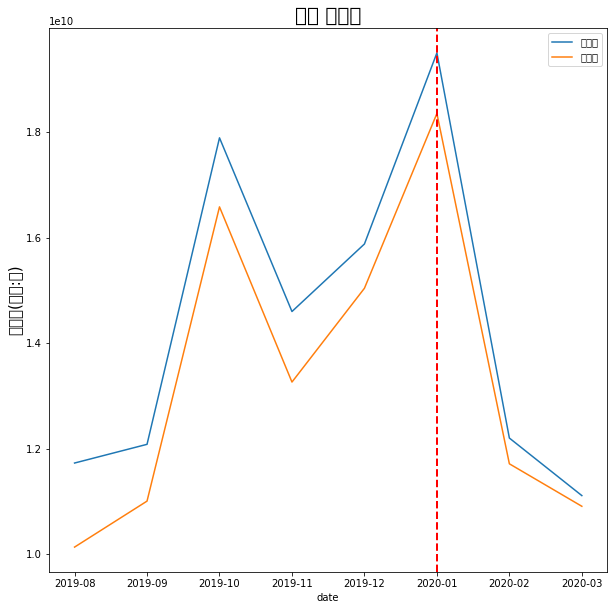

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.ylabel('매출액(단위:원)', fontsize=15)
plt.title('고객 구매액',fontsize = 20)
sns.lineplot(data=data_date, x = 'date',y='pre_discount')
sns.lineplot(data=data_date, x = 'date',y='post_discount')

plt.axvline(x='2020-01', color='r', linestyle='--', linewidth=2)
plt.legend(labels = ['할인전','할인후'])

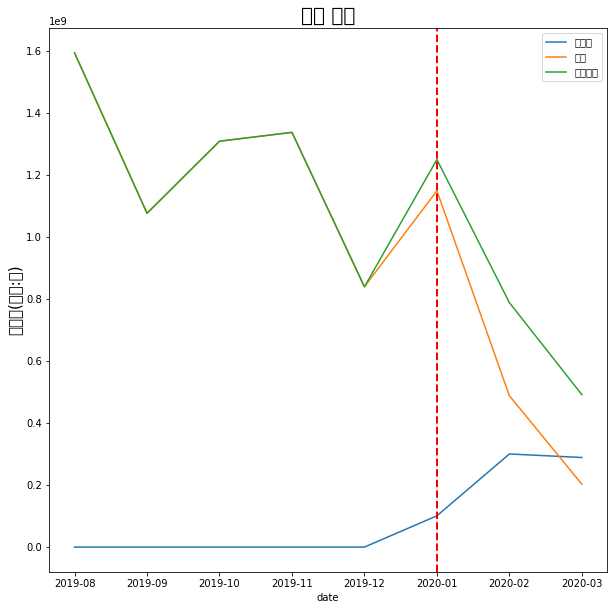

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.ylabel('할인액(단위:원)', fontsize=15)
plt.title('할인 금액', fontsize = 20)

sns.lineplot(data=data_date, x = 'date',y='cashback_amount')
sns.lineplot(data=data_date, x = 'date',y='discount_amount')
sns.lineplot(data=data_date, x = 'date',y='total_promotion')
plt.legend(labels = ['캐쉬백','할인','총할인액'])
plt.axvline(x='2020-01', color='r', linestyle='--', linewidth=2)

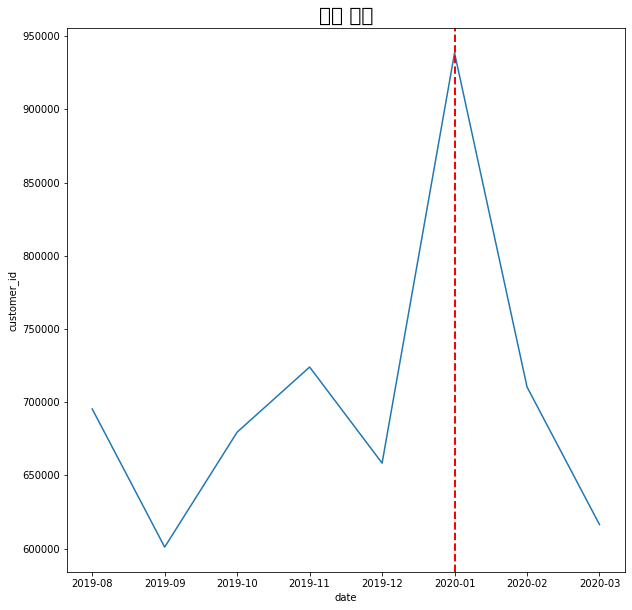

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.title("이용 건수",fontsize = 20)
sns.lineplot(data=qq, x = 'date',y='customer_id')
plt.axvline(x='2020-01', color='r', linestyle='--', linewidth=2)

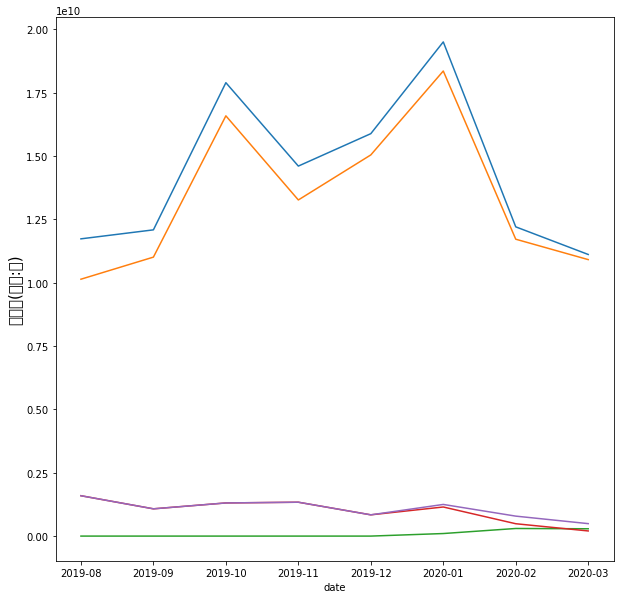

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.ylabel('매출액(단위:원)', fontsize=15)
sns.lineplot(data=data_date, x = 'date',y='pre_discount')
sns.lineplot(data=data_date, x = 'date',y='post_discount')

sns.lineplot(data=data_date, x = 'date',y='cashback_amount')
sns.lineplot(data=data_date, x = 'date',y='discount_amount')
sns.lineplot(data=data_date, x = 'date',y='total_promotion')
# plt.legend(labels = ['캐쉬백','할인','총할인액'])

### 고객별 비교_group by (정민)

In [ ]:
# 보유고객정보 분석
# 중복 제거된 고객 id
customer_info = data[['customer_id','gender','age','age_category','is_foreigner','push_permission']]
customer_info = customer_info.drop_duplicates(['customer_id']) # 중복제거
customers = pd.merge(counts,customer_info, on = 'customer_id',how='left')
customers.head()

,customer_id,counts,gender,age,age_category,is_foreigner,push_permission
0,45419,2705,female,30,30,False,True
1,445691,2630,female,29,20,False,True
2,485910,1684,female,31,30,False,True
3,400418,1363,female,27,20,False,True
4,96306,1229,female,28,20,True,True


In [ ]:
customers.groupby('gender').agg({'customer_id':['count'],'counts':['sum']})

,customer_id,counts
,count,sum
gender,,
female,349482,4070077
male,195439,1553733


In [ ]:
customers.groupby('age_category').agg({'customer_id':['count'],'counts':['sum']})

,customer_id,counts
,count,sum
age_category,,
10,11371,69762
20,157279,1287118
30,226024,2256942
40,114712,1501327
50,24646,398058
60,5701,84923
70,1076,13633
80,197,2976


> 시각화

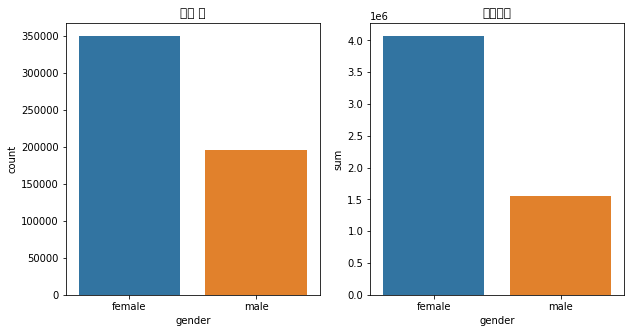

In [ ]:
# 성별에 따른 고객 수와 구매 횟수
a = customers.groupby('gender').agg({'customer_id':['count'],'counts':['sum']})
a.reset_index(inplace = True)

fig, ax = plt.subplots(1,2, figsize = (10,5) )

plt.subplot(1,2,1)
plt.title("고객 수")
sns.barplot(data = a, x = a['gender'], y = a['customer_id']['count'])

plt.subplot(1,2,2)
plt.title("구매횟수")
sns.barplot(data = a, x = a['gender'], y = a['counts']['sum'])

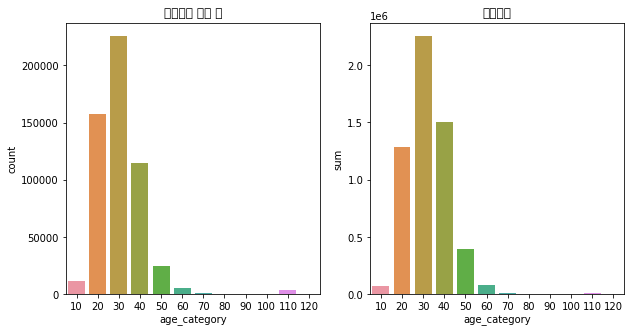

In [ ]:
# 연령대에 따른 고객 수와 구매 횟수
b = customers.groupby('age_category').agg({'customer_id':['count'],'counts':['sum']})
b.reset_index(inplace = True)

fig, ax = plt.subplots(1,2, figsize = (10,5) )


plt.subplot(1,2,1)
plt.title("연령대별 고객 수")
sns.barplot(data = b, x = b['age_category'], y = b['customer_id']['count'])

plt.subplot(1,2,2)
plt.title("구매횟수")
sns.barplot(data = b, x = b['age_category'], y = b['counts']['sum'])



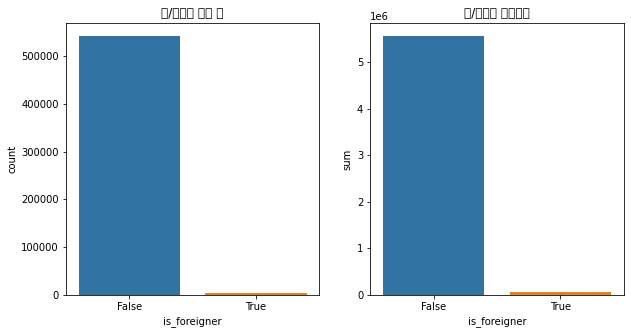

In [ ]:
#내/외국인에 따른 고객 수와 구매 횟수

c = customers.groupby('is_foreigner').agg({'customer_id':['count'],'counts':['sum']})
c.reset_index(inplace = True)

fig, ax = plt.subplots(1,2, figsize = (10,5) )


plt.subplot(1,2,1)
plt.title("내/외국인 고객 수")
sns.barplot(data = c, x ='is_foreigner', y = c['customer_id']['count'])

plt.subplot(1,2,2)
plt.title("내/외국인 구매횟수")
sns.barplot(data = c, x ='is_foreigner', y = c['counts']['sum'])



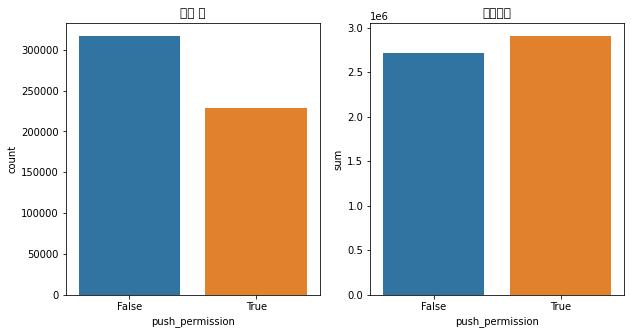

In [ ]:
#푸쉬설정에 따른 고객 수와 구매 횟수
d = customers.groupby('push_permission').agg({'customer_id':['count'],'counts':['sum']})
d.reset_index(inplace = True)

fig, ax = plt.subplots(1,2, figsize = (10,5) )


plt.subplot(1,2,1)
plt.title("고객 수")
sns.barplot(data = d, x ='push_permission', y = d['customer_id']['count'])

plt.subplot(1,2,2)
plt.title("구매횟수")
sns.barplot(data = d, x ='push_permission', y = d['counts']['sum'])



In [ ]:
# 고유수
data.nunique()
#1. 고객은 총 541,019명
#2. discount_amount와 push_permission 가 각각 1만개가 안되는 값인것을 보니, 할인의 패턴이 있는 것 같다.

customer_id           544921
created_at           5622647
pre_discount           69956
post_discount          70516
cashback_amount         7964
discount_amount         3863
total_promotion         8577
push_permission            2
gender                     2
is_foreigner               2
birthday               19946
sign_up_date          544807
merchant_id               10
count                      1
weekday                    7
days                     244
is_covid_A                 2
is_covid_B                 2
range_over_$1000           2
range_under_$10            2
range_under_$100           2
range_under_$1000          2
cashback_rate          44005
is_cashback                2
discount_rate          86353
is_discount                2
age                       83
age_category              12
first_p_days          544900
counts                   372
counts_g                   2
dtype: int64

In [ ]:
# 1. Categorical Data
# push_permission : 푸시 o / 푸시 x

data.groupby('push_permission').agg( {'customer_id':['count'],
              'pre_discount': ['mean'], 'post_discount':['mean'], 'cashback_amount':['mean','sum'], 'discount_amount':['mean','sum'],
              'total_promotion':['mean'],  'weekday':['mean'], 'age':['mean'],
              'first_p_days':['min','max','mean'],'cashback_rate':['mean'],'discount_rate':['mean']

})

> **push_permission** :알림 푸시에 따른 데이터 비교 분석

|목록| 푸쉬O ||푸쉬X|
|--|--|--|--|
|고객 수|✅|>||
|구매평균금액(할인전)||<|✅|
|구매평균금액(할인후)||<|✅|
|캐쉬백 평균금액|✅|>||
|할인받은 평균금액||<|✅|
|총 할인받은 평균금액||<|✅|
|총 할인 받은 비율(평균)|10|<|11|
|평균 연령대|38|>|34|
|first_p_days(평균)| 26일|>|24일|


\
>**인사이트**
1. 할인 받은 평균 금액과, 총 할인받은 평균 비율이 푸쉬를 안했을 경우가 높다. 그러나, 캐쉬백의 경우 푸쉬를 한 경우가 더 높음. 캐쉬백이 푸쉬 온오프에 영향을 미친 것으로 추측됨
2. 회원가입일로부터 첫구매까지 최소 1일~ 최대 291일. 평균 24~26일 걸림.(약 한달). 생각보다 텀이 오래걸림


In [ ]:
# gender : 남성 / 여성


data.groupby('gender').agg( {'customer_id':['count'],
              'pre_discount': ['mean'], 'post_discount':['mean'], 'cashback_amount':['mean'], 'discount_amount':['mean'],
              'total_promotion':['mean'],  'weekday':['mean'], 'age':['mean'],
              'first_p_days':['min','max','mean'],'cashback_rate':['mean'],'discount_rate':['mean'],'total_promotion_rate':['mean']

})


- **gender** :성별에 따른 데이터 비교 분석

|목록| 여성 ||남성|
|--|--|--|--|
|고객 수|✅|>||
|구매평균금액(할인전)|✅|>||
|구매평균금액(할인후)||<|✅|
|캐쉬백 평균금액||<|✅|
|할인받은 평균금액||<|✅|
|총 할인받은 평균금액||<|✅|
|총 할인 받은 비율(평균)|10|<|12|
|평균 연령대|35|<|38|
|first_p_days(평균)| 27일|>|21일|

\
> **인사이트**
1. 성별차이가 약 3배가 남. 여성의 비율이 매우 높음|
2. 가입일로부터 첫구매까지6일이나 차이가 남. 약 1주일의 기간으로 생각보다 많이 차이나는 것으로 보임
3. 구매 평균금액이 여성의 경우가 높으나, 총 할인 받은 금액의 비율이 남성이 높음. 즉, 구매 금액 대비 남성이 더 높은 할인 혜택을 받은 것을 알 수 있다.

In [ ]:
# is_foreigner : 내국인 / 외국인


data.groupby('is_foreigner').agg( {'customer_id':['count'],
              'pre_discount': ['mean'], 'post_discount':['mean'], 'cashback_amount':['mean'], 'discount_amount':['mean'],
              'total_promotion':['mean'],  'weekday':['mean'], 'age':['mean'],
              'first_p_days':['min','max','mean'],'cashback_rate':['mean'],'discount_rate':['mean'],'total_promotion_rate':['mean']

})


- **is_foreigner** :내/외국인에 따른 데이터 비교 분석

|목록| 내국인 ||외국인|
|--|--|--|--|
|고객 수|✅|>||
|구매평균금액(할인전)|✅|>||
|구매평균금액(할인후)|✅|>||
|캐쉬백 평균금액||<|✅|
|할인받은 평균금액|✅|>||
|총 할인받은 평균금액|✅|>||
|총 할인 받은 비율(평균)|✅|>||
|평균 연령대|36|>|32|
|first_p_days(평균)| 25일|>|27일|

\
> 인사이트
1. 외국인의 캐쉬백 받는 평균금액이 내국인보다 높다!
2. 캐쉬백 혜택이 외국인에게 좀 더 많은 혜택을 주는지 혹은 외국인이 사용하기 편리한 것이 캐쉬백인지는 알 수 없다


In [ ]:
#나이대별
data['age_category'] = data['age_category'].astype(int)
data.groupby('age_category').agg( {'customer_id':['count'],
              'pre_discount': ['mean','sum'], 'post_discount':['mean'], 'cashback_amount':['mean'], 'discount_amount':['mean'],
              'total_promotion':['mean'],
              'first_p_days':['min','max','mean'],'cashback_rate':['mean'],'discount_rate':['mean'],'total_promotion_rate':['mean']

}).sort_values(by='age_category',ascending=True)



> 인사이트
1. 연령분포가 20~30대에 몰려있다
2. 평균 구매 금액과 총 할인받은 비율이 70대가 가장 높다. 모수가 적어서 이러한 결과가 나온 것으로 판단된다.
3. 할인 전 총 구매 금액은 30대가 가장 높다(모수가 많은 만큼, 높을 수 밖에 없음)


100세의 경우, 회원 가입 후 결제까지 텀이 2분밖에 되지 않는다. 매우 이상함... 100세는 제거하고 보는게 맞을 것 같다.

### 1건 구매 vs 여러 건 구매 고객별 비교(정민)


In [ ]:
# 1번 구매한 사람, 1번 이상 구매한 사람 두 그룹으로 나누어 비교
arl= np.where(data['counts']==1,'one','two')
ww = data.groupby(arl, axis=0).mean()
ww.reset_index(inplace = True)

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.ylabel('매출액(단위:원)', fontsize=15)
plt.title('할인받은 비율(total_promotion_rate)',fontsize = 20)
sns.barplot(data=ww, x = 'index',y='total_promotion_rate')


- 구매 평균 가격이 1번 구매 한 사람이 더 높다.(모수때문인듯..?)
- 여기서 주목할 점은! 1번 구매한 사람은 2번 이상 구매한 사람보다 **할인**을 많이 받은 반면, **캐쉬백은 2번이상 구매한 사람이 더 많이 받았다.**
- 결과적으로, 2번 이상 구매한 사람이 첫 구매한 사람보다 평균 총 할인 비율이 7퍼센트 적다. **첫 구매 할인이 매우 큰 것으로 보임**

In [ ]:
# push_permission : 푸시 o / 푸시 x

#1건 구매
data.groupby(['counts_g','push_permission']).agg( {'customer_id':['count'],
              'pre_discount': ['mean'], 'post_discount':['mean'], 'cashback_amount':['mean','sum'], 'discount_amount':['mean','sum'],
              'total_promotion':['mean'], 'age':['mean'],
              'first_p_days':['min','max','mean'],'cashback_rate':['mean'],'discount_rate':['mean']

})

>푸쉬 온/오프 **인사이트**

1. 1번 구매한 사람은 **푸쉬를 안한 사람**의 비중과 할인 받은 총 금액이 더 높다.
  그러나, 2번 이상 구매한 사람은**푸쉬를 한 사람**의 비중과 할인 받은 총금액이 더 높다
2. 평균적으로 두번 이상 구매한 사람이 회원 가입 부터 첫구매까지 걸리는 일수가 적다

1.   두번 이상 구매한 사람의 **캐쉬백** 받은 비율이 더 높다( 약 0.4% )
2.   그러나, 두번 이상 구매한 사람의**할인 받은 비율**과 총 할인받은 비율이 더 낮다 ( 약 7%)
2.   즉, **첫 구매당시 할일율이 매우 높음을 알 수 있다.**



In [ ]:
# 성별

#1건 구매
data.groupby(['gender','counts_g']).agg( {'customer_id':['count'],
              'pre_discount': ['mean'], 'post_discount':['mean'], 'cashback_amount':['mean','sum'], 'discount_amount':['sum','mean'],
              'total_promotion':['mean','sum'], 'age':['mean'],
              'first_p_days':['min','max','mean'],'cashback_rate':['mean'],'discount_rate':['mean']

})

> 성별 **인사이트**



1.   가장 많이 차이가 나는 부분은, 1번 구매한 손님의 캐쉬백 할인 금액이다.
    남성이 여성보다 평균적으로 2배 더 많은 캐쉬백을 받았다.
2. 여성의 평균 연령이 남성보다 낮다
3. first_p_days 가 여성이 평균 기간이 더 길다. 특히, 1번 구매한 여성의 기간이 제일 길다.
4. 캐쉬백은 성별에 따른 유의미한 차이가 없다
5. 총 할인 비율 또한 큰 차이가 없으나, 여성이 남성보다 적은 할인 비율을 보인다.




In [ ]:
# 내/외국인

#1건 구매
data.groupby(['counts_g','is_foreigner']).agg( {'customer_id':['count'],
              'pre_discount': ['mean'], 'cashback_amount':['mean'], 'discount_amount':['mean'],
              'total_promotion':['mean'], 'cashback_rate':['mean'],'discount_rate':['mean'],
              'age':['mean'], 'first_p_days':['min','max','mean']

})

> 내/외국인 **인사이트**

1. 외국인의 경우, 2번 이상 구매한 사람이 1번 구매한 사람보다 많다

In [ ]:
#나이대별

data.groupby(['age_category','counts_g']).agg( {'customer_id':['count'],
              'pre_discount': ['mean','sum'], 'post_discount':['mean'], 'cashback_amount':['mean'], 'discount_amount':['mean'],
              'total_promotion':['mean'],
              'first_p_days':['min','max','mean'],'cashback_rate':['mean'],'discount_rate':['mean']

}).sort_values(by='age_category',ascending=True)

1. 전 연령대가 2번 이상 구매한 횟수가 1번 구매한 횟수보다 많다
2. 전체적으로 모수가 너무 많은 차이가 나서 평균으로 비교하기 어려움

### 8월 17일 (희구)


In [ ]:
# 결제 금액이 0원
data[data.post_discount == 0]

In [ ]:
# 결제 금액이 0원인 사람 중 PUSH 알람 유무 성별 수
data[data.post_discount == 0].groupby(['push_permission'])['gender'].value_counts()

In [ ]:
# 결제 금액이 0원인 사람 중 PUSH 알람 유무 내외국인 수
data[data.post_discount == 0].groupby(['push_permission'])['is_foreigner'].value_counts()

In [ ]:
#결제 금액이 0원인 사람의 성별 내외국인 수
data[data.post_discount == 0].groupby(['gender'])['is_foreigner'].value_counts()

In [ ]:
# 결제건이 0원이 아닌
data[data.post_discount != 0]

In [ ]:
data[data.post_discount != 0].groupby(['push_permission'])['gender'].value_counts()

In [ ]:
data[data.post_discount != 0].groupby(['push_permission'])['is_foreigner'].value_counts()

In [ ]:
data[data.post_discount != 0].groupby(['gender'])['is_foreigner'].value_counts()

In [ ]:
data[data.post_discount != 0].groupby(['age'])['gender'].value_counts()

In [ ]:
data[data.post_discount == 0].groupby('age_category')['gender'].value_counts()

In [ ]:
data[data.post_discount != 0].groupby(['age_category'])['gender'].value_counts()

**결제 금액 0원 VS 1원 이상 인사이트**
1. 0원 결제 금액보다 압도적으로 0원이 아닌 결제 내역이 더 많다.
2. 0원이 아닌 결제 금액 사람들의 푸시 알람 유무가 많이 차이 나지 않는다.
3. 0원이 결제 금액 사람들에서는 푸시 알람 유무가 두 배차이로 하지 않은 사람들이 더 많다.
4. 0원 결제 사람들의 나이대와 성별은 30대 남성과 30대 여성이 많고
비교적 남성 고객 비율이 높다
5. 0원이 아닌 결제 사람들의 나이대와 성별은 30대 여성이 많고 비교적 여성 고객들의 비율이 많이 나온다.


### 8월 22일 (희구)

In [ ]:
data

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,I,1,Sun,10,2020-03-22,1,1,0,0,1,0,2.999779,1,0.000000,0,63,60,2019-12-02 00:47:53.608,13,two
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,F,1,Thu,9,2020-03-12,1,0,0,0,1,0,3.000000,1,0.000000,0,37,30,2020-01-02 11:22:49.008,20,two
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,I,1,Sat,8,2020-02-01,1,0,0,1,0,0,3.000000,1,0.000000,0,45,40,2019-08-15 01:04:53.750,47,two
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,D,1,Fri,10,2020-03-06,1,0,0,0,1,0,3.000000,1,0.000000,0,24,20,2019-08-26 07:28:54.224,24,two
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,E,1,Fri,12,2020-03-13,1,0,0,0,1,0,3.000000,1,0.000000,0,21,20,2020-03-12 00:32:37.555,3,two
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623805,434398,2019-12-12 07:48:51.491,7547,7547,0,0,0,True,female,False,1975-02-06,2019-06-17 11:09:42.453,E,1,Thu,7,2019-12-12,0,0,0,1,0,0,0.000000,0,0.000000,0,44,40,2019-08-01 11:54:13.514,136,two
5623806,481515,2019-12-20 07:37:15.259,22900,20900,0,2000,2000,True,female,False,1989-01-23,2019-08-22 01:26:58.339,B,1,Fri,7,2019-12-20,0,0,0,0,1,0,0.000000,0,8.733624,1,30,30,2019-08-22 01:31:10.257,40,two
5623807,298192,2020-01-05 01:55:28.331,19790,18790,0,1000,1000,True,female,False,1985-04-06,2019-09-13 17:15:21.732,A,1,Sun,1,2020-01-05,0,0,0,0,1,0,0.000000,0,5.053057,1,35,30,2019-09-18 11:52:30.099,13,two
5623808,430962,2019-10-01 03:32:17.435,15921,14152,0,1769,1769,False,male,False,1983-07-25,2019-06-20 00:59:09.309,C,1,Tue,3,2019-10-01,0,0,0,0,1,0,0.000000,0,11.111111,1,36,30,2019-08-01 10:10:04.725,18,two


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5623810 entries, 0 to 5623809
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   customer_id        object        
 1   created_at         datetime64[ns]
 2   pre_discount       int64         
 3   post_discount      int64         
 4   cashback_amount    int64         
 5   discount_amount    int64         
 6   total_promotion    int64         
 7   push_permission    object        
 8   gender             object        
 9   is_foreigner       object        
 10  birthday           datetime64[ns]
 11  sign_up_date       datetime64[ns]
 12  merchant_id        object        
 13  count              int64         
 14  weekday            object        
 15  hour               int64         
 16  days               object        
 17  is_covid_A         int64         
 18  is_covid_B         int64         
 19  range_over_$1000   uint8         
 20  range_under_$10    uint8

**중복 결제건 특징**

In [ ]:
data[data.created_at == '2020-01-30 00:12:06.592']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g
1238736,228664,2020-01-30 00:12:06.592,5900,3900,0,2000,2000,True,female,False,1984-08-20,2020-01-09 00:32:35.541,C,1,Thu,0,2020-01-30,1,0,0,1,0,0,0.0,0,33.898305,1,36,30,2020-01-09 00:38:29.486,47,two
4423814,31439,2020-01-30 00:12:06.592,3500,1500,0,2000,2000,False,male,False,1982-08-04,2019-08-01 09:14:56.987,C,1,Thu,0,2020-01-30,1,0,0,1,0,0,0.0,0,57.142857,1,38,30,2019-08-01 10:34:13.309,26,two
5273866,321088,2020-01-30 00:12:06.592,4500,2500,0,2000,2000,True,female,False,1980-08-24,2019-12-03 21:35:03.458,C,1,Thu,0,2020-01-30,1,0,0,1,0,0,0.0,0,44.444444,1,40,40,2019-12-03 23:24:17.316,36,two


In [ ]:
data[data.created_at == '2019-09-06 00:31:40.500']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g
1221640,13082,2019-09-06 00:31:40.500,10220,9085,0,1135,1135,False,female,False,1995-08-20,2019-08-07 02:26:15.949,C,1,Fri,0,2019-09-06,0,0,0,1,0,0,0.0,0,11.105675,1,24,20,2019-08-07 02:28:08.061,53,two
2307875,351824,2019-09-06 00:31:40.500,11601,10312,0,1289,1289,False,female,False,1987-01-18,2019-08-01 21:46:23.254,I,1,Fri,0,2019-09-06,0,0,0,0,1,0,0.0,0,11.111111,1,32,30,2019-08-01 21:48:33.236,64,two


In [ ]:
# 1원 상품을 결제한 고객의 특징은?
#len(data[data.post_discount == 1 ])
data[(data.post_discount == 1)]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g
891990,5803,2020-01-01 10:08:18.239,1,1,0,0,0,True,female,False,1974-04-20,2019-09-01 09:53:34.084,D,1,Wed,10,2020-01-01,0,0,0,1,0,0,0.0,0,0.000000,0,46,40,2019-09-01 10:21:54.958,10,two
1187465,59464,2019-11-14 15:52:28.075,5001,1,0,5000,5000,True,male,False,1981-12-06,2019-09-25 07:32:06.004,J,1,Thu,15,2019-11-14,0,0,0,1,0,0,0.0,0,99.980004,1,38,30,2019-11-14 15:52:28.075,12,two
1473931,182621,2020-01-02 10:02:15.749,1,1,0,0,0,False,male,False,1987-06-10,2019-09-18 06:49:44.589,H,1,Thu,10,2020-01-02,0,0,0,1,0,0,0.0,0,0.000000,0,33,30,2019-09-18 06:48:43.231,50,two
2485524,516287,2019-09-01 13:38:48.548,1,1,0,0,0,True,female,True,1985-12-19,2019-06-14 14:42:09.367,B,1,Sun,13,2019-09-01,0,0,0,1,0,0,0.0,0,0.000000,0,34,30,2019-08-01 10:01:57.442,123,two
3300189,183000,2019-08-18 16:00:17.652,1,1,0,0,0,True,female,False,1969-08-14,2019-06-18 10:29:49.701,F,1,Sun,16,2019-08-18,0,0,0,1,0,0,0.0,0,0.000000,0,50,50,2019-08-01 21:28:09.799,42,two
3321496,301137,2020-01-02 15:28:34.414,1,1,0,0,0,False,male,False,1986-01-14,2019-11-16 14:58:43.240,G,1,Thu,15,2020-01-02,0,0,0,1,0,0,0.0,0,0.000000,0,34,30,2020-01-02 15:28:34.414,8,two
3709854,276138,2019-09-30 13:29:54.215,1,1,0,0,0,True,female,False,1971-02-17,2019-08-12 11:14:26.362,F,1,Mon,13,2019-09-30,0,0,0,1,0,0,0.0,0,0.000000,0,48,40,2019-08-12 11:37:28.064,90,two
3792912,449183,2020-02-02 14:40:43.995,1,1,0,0,0,True,female,False,1983-12-19,2019-09-06 16:43:52.091,I,1,Sun,14,2020-02-02,1,0,0,1,0,0,0.0,0,0.000000,0,37,30,2019-09-06 16:48:28.078,51,two
4022413,157571,2019-08-01 01:31:41.042,5001,1,0,5000,5000,True,male,False,1981-12-04,2019-06-21 10:05:03.783,I,1,Thu,1,2019-08-01,0,0,0,1,0,0,0.0,0,99.980004,1,38,30,2019-08-01 01:31:41.042,158,two
4028749,110452,2019-09-30 22:22:18.099,1,1,0,0,0,False,female,False,1996-01-20,2019-06-14 00:41:37.412,I,1,Mon,22,2019-09-30,0,0,0,1,0,0,0.0,0,0.000000,0,23,20,2019-08-02 09:24:35.372,83,two


In [ ]:
#1,996,000원 상품을 결제
data[(data.post_discount == 1996000)]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g
3132474,273470,2020-02-04 10:30:55.832,1996000,1996000,59880,0,59880,True,female,False,1981-11-13,2019-11-15 18:34:30.427,H,1,Tue,10,2020-02-04,1,0,1,0,0,0,3.0,1,0.0,0,39,30,2019-11-19 11:38:01.819,22,two


In [ ]:
# 0원원 상품 결제
data[(data.post_discount == 0)].groupby('push_permission')['age_category'].value_counts()


push_permission  age_category
False            30              3030
                 20              1382
                 40               988
                 110              190
                 50               180
                 60               100
                 10                46
                 70                29
                 80                 6
                 90                 1
                 100                1
True             30              1351
                 40               763
                 20               551
                 50               150
                 60                72
                 110               57
                 10                45
                 70                29
                 80                 2
Name: age_category, dtype: int64

In [ ]:
# 캐쉬백 97,473 결제건 특징
data[data.cashback_amount == 97473]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g
613096,106823,2020-02-19 18:21:17.422,1949490,1949490,97473,0,97473,False,female,False,1986-05-15,2019-07-09 13:02:28.524,F,1,Wed,18,2020-02-19,1,0,1,0,0,0,4.999923,1,0.0,0,34,30,2019-09-15 10:16:05.324,14,two


In [ ]:
# 캐쉬백 여부
data[(data.cashback_amount == 0) & (data.age_category == 60)]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g
4159,366457,2019-08-26 11:34:07.501,14500,11500,0,3000,3000,True,male,False,1956-01-16,2019-06-14 13:57:17.696,J,1,Mon,11,2019-08-26,0,0,0,0,1,0,0.0,0,20.689655,1,63,60,2019-08-04 09:41:53.223,145,two
4174,353156,2019-12-20 12:09:47.117,18700,17700,0,1000,1000,True,male,False,1959-07-13,2019-08-26 12:04:05.596,E,1,Fri,12,2019-12-20,0,0,0,0,1,0,0.0,0,5.347594,1,60,60,2019-08-26 12:02:53.095,52,two
4294,386175,2019-12-25 23:22:52.864,935000,915000,0,20000,20000,False,female,False,1956-05-02,2019-08-01 18:48:16.218,B,1,Wed,23,2019-12-25,0,0,0,0,0,1,0.0,0,2.139037,1,63,60,2019-08-01 18:50:38.746,25,two
4395,350417,2019-11-04 10:03:44.493,6741,5992,0,749,749,True,male,False,1959-06-25,2019-06-13 15:50:55.025,C,1,Mon,10,2019-11-04,0,0,0,1,0,0,0.0,0,11.111111,1,60,60,2019-08-01 04:28:18.982,82,two
4465,301236,2020-01-01 01:05:53.736,10800,9800,0,1000,1000,True,female,False,1952-02-18,2019-12-08 22:19:16.557,B,1,Wed,1,2020-01-01,0,0,0,1,0,0,0.0,0,9.259259,1,68,60,2019-12-08 22:17:19.287,86,two
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623692,240428,2019-10-21 03:21:08.452,935000,905000,0,30000,30000,True,female,False,1959-11-29,2019-08-01 22:00:04.860,H,1,Mon,3,2019-10-21,0,0,0,0,0,1,0.0,0,3.208556,1,60,60,2019-08-01 22:12:58.384,55,two
5623708,285654,2019-08-26 20:24:58.172,7500,4500,0,3000,3000,True,male,False,1959-10-06,2019-07-24 23:41:05.653,J,1,Mon,20,2019-08-26,0,0,0,1,0,0,0.0,0,40.000000,1,60,60,2019-08-06 20:23:57.767,12,two
5623711,190494,2020-01-27 09:41:16.198,3900,1900,0,2000,2000,True,female,False,1951-12-19,2019-07-01 12:48:39.412,B,1,Mon,9,2020-01-27,1,0,0,1,0,0,0.0,0,51.282051,1,69,60,2019-09-30 07:32:06.385,31,two
5623770,362266,2019-10-21 22:14:10.017,4073,3621,0,452,452,False,male,False,1952-03-08,2019-08-12 19:30:20.129,B,1,Mon,22,2019-10-21,0,0,0,1,0,0,0.0,0,11.097471,1,67,60,2019-08-12 21:58:38.545,5,two


In [ ]:
# discount_amount = 500000
data[data.discount_amount == 500000 ]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g
3137949,276087,2019-09-04 20:41:57.177,1348280,848280,0,500000,500000,True,male,False,1982-03-23,2019-06-04 17:41:01.322,I,1,Wed,20,2019-09-04,0,0,0,0,0,1,0.0,0,37.084285,1,37,30,2019-08-01 23:25:56.135,2,two
5368219,177212,2019-12-14 11:29:32.242,1154400,654400,0,500000,500000,True,male,True,1989-04-22,2019-05-29 18:26:59.748,G,1,Sat,11,2019-12-14,0,0,0,0,0,1,0.0,0,43.312543,1,30,30,2019-08-01 23:17:24.451,35,two


In [ ]:
# discount_rate
data['discount_category'] = (data['discount_rate'] // 10) * 10
data['discount_category'] = data['discount_category'].astype('object')

In [ ]:
data.groupby('discount_category')['gender', 'age_category','push_permission']

In [ ]:
# discount_amount = 0
data[(data.discount_amount == 0) & (data.gender == 'female') ]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g,discount_category
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,I,1,Sun,10,2020-03-22,1,1,0,0,1,0,2.999779,1,0.0,0,63,60,2019-12-02 00:47:53.608,13,two,0.0
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,F,1,Thu,9,2020-03-12,1,0,0,0,1,0,3.000000,1,0.0,0,37,30,2020-01-02 11:22:49.008,20,two,0.0
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,I,1,Sat,8,2020-02-01,1,0,0,1,0,0,3.000000,1,0.0,0,45,40,2019-08-15 01:04:53.750,47,two,0.0
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,E,1,Fri,12,2020-03-13,1,0,0,0,1,0,3.000000,1,0.0,0,21,20,2020-03-12 00:32:37.555,3,two,0.0
5,542961,2020-03-02 19:32:27.893,30900,30900,927,0,927,False,female,False,1979-08-12,2019-06-27 11:38:07.948,B,1,Mon,19,2020-03-02,1,0,0,0,1,0,3.000000,1,0.0,0,41,40,2019-10-23 14:37:11.456,7,two,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623769,475844,2020-01-10 16:26:53.756,5780,5780,0,0,0,False,female,False,1982-02-18,2019-11-19 10:59:08.411,C,1,Fri,16,2020-01-10,0,0,0,1,0,0,0.000000,0,0.0,0,38,30,2019-11-19 10:45:13.018,61,two,0.0
5623795,95339,2020-01-17 22:32:50.242,6900,6900,0,0,0,True,female,False,1990-03-02,2019-07-31 21:22:40.447,H,1,Fri,22,2020-01-17,0,0,0,1,0,0,0.000000,0,0.0,0,30,30,2019-08-01 12:55:18.974,13,two,0.0
5623796,159782,2019-12-28 15:30:14.589,9800,9800,0,0,0,False,female,False,1972-06-08,2019-06-13 01:17:24.265,I,1,Sat,15,2019-12-28,0,0,0,1,0,0,0.000000,0,0.0,0,47,40,2019-08-02 09:03:15.674,32,two,0.0
5623799,363365,2020-03-07 22:45:14.105,1980,1980,0,0,0,False,female,False,1993-01-09,2019-06-15 03:47:15.931,F,1,Sat,22,2020-03-07,1,0,0,1,0,0,0.000000,0,0.0,0,27,20,2019-08-03 14:11:56.203,332,two,0.0


In [ ]:
# 캐쉬백 범주
data['cashback_category'] = (data['cashback_rate'] // 1)
data['cashback_category'] = data['cashback_category'].astype('object')

In [ ]:
data[(data.cashback_category == 3) & (data.push_permission == 'True')]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g,discount_category,cashback_category
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,F,1,Thu,9,2020-03-12,1,0,0,0,1,0,3.0,1,0.000000,0,37,30,2020-01-02 11:22:49.008,20,two,0.0,3.0
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,I,1,Sat,8,2020-02-01,1,0,0,1,0,0,3.0,1,0.000000,0,45,40,2019-08-15 01:04:53.750,47,two,0.0,3.0
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,E,1,Fri,12,2020-03-13,1,0,0,0,1,0,3.0,1,0.000000,0,21,20,2020-03-12 00:32:37.555,3,two,0.0,3.0
16,336066,2020-02-18 00:47:37.611,27300,25300,819,2000,2819,True,female,False,1995-04-08,2019-10-02 21:22:17.021,H,1,Tue,0,2020-02-18,1,0,0,0,1,0,3.0,1,7.326007,1,25,20,2019-11-02 00:36:49.837,3,two,0.0,3.0
17,430307,2020-03-02 10:01:24.787,11800,11800,354,0,354,True,female,False,1973-04-16,2020-03-02 04:59:05.557,B,1,Mon,10,2020-03-02,1,0,0,0,1,0,3.0,1,0.000000,0,47,40,2020-03-02 04:57:49.043,13,two,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605931,29276,2020-02-06 15:23:03.010,17800,17800,534,0,534,True,male,False,1975-08-02,2019-12-10 22:03:19.785,H,1,Thu,15,2020-02-06,1,0,0,0,1,0,3.0,1,0.000000,0,45,40,2019-12-10 22:01:16.767,26,two,0.0,3.0
5605933,454640,2020-03-10 00:42:15.129,48400,48400,1452,0,1452,True,female,False,1978-07-27,2019-08-02 12:39:18.976,E,1,Tue,0,2020-03-10,1,0,0,0,1,0,3.0,1,0.000000,0,42,40,2019-08-02 12:47:42.485,90,two,0.0,3.0
5605935,220213,2020-02-12 14:02:46.840,5900,5900,177,0,177,True,female,False,1983-03-30,2019-06-17 14:42:59.301,B,1,Wed,14,2020-02-12,1,0,0,1,0,0,3.0,1,0.000000,0,37,30,2019-08-01 21:16:52.847,180,two,0.0,3.0
5605936,442611,2020-03-08 18:53:52.445,26900,26900,807,0,807,True,male,False,1989-06-06,2019-11-29 21:01:30.228,C,1,Sun,18,2020-03-08,1,0,0,0,1,0,3.0,1,0.000000,0,31,30,2019-12-16 13:16:35.623,10,two,0.0,3.0


In [ ]:
data.groupby('discount_category')['gender'].value_counts()

discount_category  gender
0.0                female    2064248
                   male       730208
10.0               female    1625947
                   male       593718
20.0               female     189577
                   male        89392
30.0               female      83217
                   male        45565
40.0               male        54889
                   female      54498
50.0               female      33116
                   male        20738
60.0               female       4646
                   male         3332
70.0               female       5499
                   male         3851
80.0               male         3989
                   female       3851
90.0               male         2529
                   female       2027
100.0              male         5522
                   female       3451
Name: gender, dtype: int64

In [ ]:
data.groupby('discount_category')['age_category'].value_counts()

discount_category  age_category
0.0                30              1098337
                   40               744845
                   20               668344
                   50               199714
                   60                40892
                                    ...   
100.0              10                   91
                   70                   58
                   80                    8
                   90                    1
                   100                   1
Name: age_category, Length: 112, dtype: int64

In [ ]:
data['discount_amount'].sum() / data['pre_discount'].sum()
# 개개인의의 적용용 불가가 / 그러면면 전체 대상으로 -> 평균균 결제제 금액액 분포가가 정규규 분포가가 아니어서서 할인율을을 사용하는는 것이 맞지 않다.
# i의의 비율을을 평균을을 내는 것이 옳지 않다.


0.06948700342145483

In [ ]:
data[(data.discount_category == 0) & (data.age_category == 20) & (data.push_permission =='True')]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g,discount_category,cashback_category
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,E,1,Fri,12,2020-03-13,1,0,0,0,1,0,3.000000,1,0.000000,0,21,20,2020-03-12 00:32:37.555,3,two,0.0,3.0
16,336066,2020-02-18 00:47:37.611,27300,25300,819,2000,2819,True,female,False,1995-04-08,2019-10-02 21:22:17.021,H,1,Tue,0,2020-02-18,1,0,0,0,1,0,3.000000,1,7.326007,1,25,20,2019-11-02 00:36:49.837,3,two,0.0,3.0
72,254315,2020-02-09 20:36:20.021,13600,13600,680,0,680,True,male,False,1998-01-15,2019-08-24 02:23:32.726,B,1,Sun,20,2020-02-09,1,0,0,0,1,0,5.000000,1,0.000000,0,22,20,2019-08-24 02:22:11.919,45,two,0.0,5.0
85,105245,2020-03-23 01:29:33.885,5820,5820,290,0,290,True,female,False,1996-02-06,2019-06-23 01:38:30.148,D,1,Mon,1,2020-03-23,1,1,0,1,0,0,4.982818,1,0.000000,0,24,20,2019-08-01 22:22:44.114,73,two,0.0,4.0
109,400418,2020-02-25 23:07:37.967,14900,14900,745,0,745,True,female,False,1993-09-09,2019-12-18 08:22:06.652,B,1,Tue,23,2020-02-25,1,0,0,0,1,0,5.000000,1,0.000000,0,27,20,2019-12-18 08:20:12.346,1363,two,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623640,260912,2019-08-09 09:09:01.569,33600,31600,0,2000,2000,True,female,False,1991-06-22,2019-07-31 02:10:55.938,E,1,Fri,9,2019-08-09,0,0,0,0,1,0,0.000000,0,5.952381,1,28,20,2019-08-01 13:56:43.929,55,two,0.0,0.0
5623705,316742,2019-10-18 13:43:57.107,28000,26499,0,1501,1501,True,female,False,1996-09-17,2019-10-17 21:35:59.811,C,1,Fri,13,2019-10-18,0,0,0,0,1,0,0.000000,0,5.360714,1,23,20,2019-10-18 13:43:57.107,15,two,0.0,0.0
5623748,355972,2019-10-28 12:35:46.566,63135,58135,0,5000,5000,True,female,False,1998-03-12,2019-08-29 22:30:20.644,H,1,Mon,12,2019-10-28,0,0,0,0,1,0,0.000000,0,7.919537,1,21,20,2019-08-29 22:42:28.053,42,two,0.0,0.0
5623778,310276,2019-12-30 12:31:55.632,148000,143000,0,5000,5000,True,male,False,1997-03-20,2019-12-13 22:48:05.228,E,1,Mon,12,2019-12-30,0,0,0,0,0,1,0.000000,0,3.378378,1,22,20,2019-12-30 12:31:55.632,1,one,0.0,0.0


In [ ]:
data[data.days == '2020-01-30'].value_counts('customer_id').head(4755)

customer_id
498862    27
445691    25
45419     16
155782    14
463392     9
          ..
161363     2
161307     2
539440     2
161256     2
363323     2
Length: 4755, dtype: int64

In [ ]:
data[(data.days == '2020-01-30') & (data.counts_g == 'two')]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g,discount_category,cashback_category
185,176589,2020-01-30 10:45:02.171,17900,16900,895,1000,1895,True,female,False,1981-03-04,2019-08-21 10:52:22.785,F,1,Thu,10,2020-01-30,1,0,0,0,1,0,5.000000,1,5.586592,1,39,30,2019-08-21 11:25:56.430,17,two,0.0,5.0
224,259041,2020-01-30 01:44:28.917,3500,1500,175,2000,2175,True,male,False,1983-07-13,2019-08-12 23:54:57.021,F,1,Thu,1,2020-01-30,1,0,0,1,0,0,5.000000,1,57.142857,1,37,30,2019-08-14 22:12:04.969,54,two,50.0,5.0
676,418973,2020-01-30 11:57:45.906,22450,21450,1122,1000,2122,True,female,False,1982-11-15,2019-10-21 15:01:47.194,A,1,Thu,11,2020-01-30,1,0,0,0,1,0,4.997773,1,4.454343,1,38,30,2019-10-21 15:00:55.442,69,two,0.0,4.0
688,122182,2020-01-30 00:53:47.961,3500,1500,175,2000,2175,True,female,False,1997-08-22,2019-08-02 16:38:26.568,A,1,Thu,0,2020-01-30,1,0,0,1,0,0,5.000000,1,57.142857,1,23,20,2019-08-02 16:35:11.956,148,two,50.0,5.0
886,131955,2020-01-30 05:46:40.251,44000,43000,2200,1000,3200,True,female,False,1983-07-14,2019-11-18 02:42:47.364,C,1,Thu,5,2020-01-30,1,0,0,0,1,0,5.000000,1,2.272727,1,37,30,2019-11-18 12:53:32.939,27,two,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623224,509424,2020-01-30 09:35:02.131,7900,5900,0,2000,2000,False,male,False,1992-01-02,2020-01-18 14:52:41.576,C,1,Thu,9,2020-01-30,1,0,0,1,0,0,0.000000,0,25.316456,1,28,20,2020-01-18 14:53:56.844,35,two,20.0,0.0
5623271,365289,2020-01-30 10:51:29.536,12860,11860,0,1000,1000,True,male,False,1945-10-27,2020-01-10 21:57:05.445,C,1,Thu,10,2020-01-30,1,0,0,0,1,0,0.000000,0,7.776050,1,75,70,2020-01-13 10:57:55.044,13,two,0.0,0.0
5623447,173535,2020-01-30 00:30:59.875,9900,7900,0,2000,2000,True,female,False,1974-03-10,2019-12-09 00:46:42.068,B,1,Thu,0,2020-01-30,1,0,0,1,0,0,0.000000,0,20.202020,1,46,40,2019-12-13 00:41:51.894,20,two,20.0,0.0
5623468,388136,2020-01-30 14:06:57.933,17900,16900,0,1000,1000,False,male,False,1985-03-11,2019-07-28 20:41:56.374,D,1,Thu,14,2020-01-30,1,0,0,0,1,0,0.000000,0,5.586592,1,35,30,2019-09-05 22:10:30.435,62,two,0.0,0.0


In [ ]:
nine = data[(data.days == '2019-09-06')]

In [ ]:
nine['customer_id'].astype(int)
nine['cnt'] = nine['customer_id'].count()

In [ ]:
nine.head(3)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g,discount_category,cashback_category,cnt
4286,461455,2019-09-06 09:35:25.986,10350,9200,0,1150,1150,False,female,False,1983-12-19,2019-08-28 02:21:24.839,H,1,Fri,9,2019-09-06,0,0,0,1,0,0,0.0,0,11.111111,1,36,30,2019-08-31 09:54:42.982,3,two,10.0,0.0,21630
4312,501589,2019-09-06 06:42:43.869,4370,3885,0,485,485,True,female,False,1977-01-14,2019-07-24 20:05:37.746,C,1,Fri,6,2019-09-06,0,0,0,1,0,0,0.0,0,11.098398,1,42,40,2019-08-08 08:27:42.626,162,two,10.0,0.0,21630
4362,537670,2019-09-06 15:54:38.045,17622,15664,0,1958,1958,True,male,False,1980-04-08,2019-09-03 15:33:10.078,A,1,Fri,15,2019-09-06,0,0,0,0,1,0,0.0,0,11.111111,1,39,30,2019-09-03 15:37:47.174,23,two,10.0,0.0,21630


In [ ]:
 data[(data.days == '2019-09-06') & (data.customer_id == '156394')]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,days,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,age_category,first_p_days,counts,counts_g,discount_category,cashback_category
4244444,156394,2019-09-06 09:22:11.333,17900,17900,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,G,1,Fri,9,2019-09-06,0,0,0,0,1,0,0.0,0,0.000000,0,41,40,2019-08-01 01:42:53.718,425,two,0.0,0.0
4300217,156394,2019-09-06 06:05:36.363,590,590,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,C,1,Fri,6,2019-09-06,0,0,0,1,0,0,0.0,0,0.000000,0,41,40,2019-08-01 01:42:53.718,425,two,0.0,0.0
4316111,156394,2019-09-06 06:33:04.787,2970,2970,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,I,1,Fri,6,2019-09-06,0,0,0,1,0,0,0.0,0,0.000000,0,41,40,2019-08-01 01:42:53.718,425,two,0.0,0.0
4441298,156394,2019-09-06 13:51:27.787,38640,38640,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,F,1,Fri,13,2019-09-06,0,0,0,0,1,0,0.0,0,0.000000,0,41,40,2019-08-01 01:42:53.718,425,two,0.0,0.0
4442927,156394,2019-09-06 01:04:40.764,5346,4752,0,594,594,False,female,False,1978-04-30,2019-07-25 05:04:43.506,D,1,Fri,1,2019-09-06,0,0,0,1,0,0,0.0,0,11.111111,1,41,40,2019-08-01 01:42:53.718,425,two,10.0,0.0
4532137,156394,2019-09-06 08:59:34.831,3500,3500,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,C,1,Fri,8,2019-09-06,0,0,0,1,0,0,0.0,0,0.000000,0,41,40,2019-08-01 01:42:53.718,425,two,0.0,0.0
4563056,156394,2019-09-06 05:20:05.589,3500,3500,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,C,1,Fri,5,2019-09-06,0,0,0,1,0,0,0.0,0,0.000000,0,41,40,2019-08-01 01:42:53.718,425,two,0.0,0.0
4690062,156394,2019-09-06 10:00:34.109,1900,1900,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,B,1,Fri,10,2019-09-06,0,0,0,1,0,0,0.0,0,0.000000,0,41,40,2019-08-01 01:42:53.718,425,two,0.0,0.0
4730792,156394,2019-09-06 01:44:30.421,1782,1584,0,198,198,False,female,False,1978-04-30,2019-07-25 05:04:43.506,F,1,Fri,1,2019-09-06,0,0,0,1,0,0,0.0,0,11.111111,1,41,40,2019-08-01 01:42:53.718,425,two,10.0,0.0
4776699,156394,2019-09-06 12:01:50.348,2500,2500,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,A,1,Fri,12,2019-09-06,0,0,0,1,0,0,0.0,0,0.000000,0,41,40,2019-08-01 01:42:53.718,425,two,0.0,0.0


In [ ]:
male = data[data.gender == 'male']
male.groupby('weekday').mean()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,count,hour,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,counts
weekday,,,,,,,,,,,,,,,,,,,
Fri,18763.484312,17381.988241,141.434094,1381.496070,1522.930164,1.0,12.212483,0.302030,0.024033,0.000167,0.472785,0.513713,0.013334,0.735225,0.198252,10.477035,0.767383,38.609148,42.867165
Mon,30954.034279,28938.851793,123.913100,2015.182486,2139.095586,1.0,12.504515,0.264003,0.037631,0.000130,0.519252,0.442310,0.038309,0.604559,0.164488,13.839763,0.776509,38.195094,38.946020
Sat,21578.615122,20068.214461,141.350241,1510.400662,1651.750903,1.0,12.525600,0.306818,0.025788,0.000177,0.477360,0.499915,0.022548,0.730241,0.203693,11.096619,0.774413,38.766322,39.797833
Sun,21996.637911,20596.983874,151.071818,1399.654037,1550.725855,1.0,13.575252,0.295828,0.043188,0.000189,0.459362,0.517605,0.022845,0.759739,0.211927,9.257882,0.723513,38.677829,39.455288
Thu,20523.418015,18594.725193,114.628874,1928.692821,2043.321696,1.0,12.277831,0.268238,0.019185,0.000133,0.502067,0.478974,0.018827,0.584073,0.158043,15.318570,0.771626,38.320259,38.174470
Tue,28574.294350,26966.526585,150.632911,1607.767765,1758.400675,1.0,12.565488,0.318412,0.042327,0.000213,0.453854,0.512583,0.033350,0.703570,0.192665,9.708342,0.764406,38.158995,40.655630
Wed,24877.400073,23308.668516,126.542655,1568.731557,1695.274213,1.0,12.523176,0.289224,0.021459,0.000161,0.467539,0.509666,0.022634,0.642836,0.174733,9.771834,0.768521,38.404043,40.657147


In [ ]:
gender = data.groupby('gender').mean()
gender

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,count,hour,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,counts
gender,,,,,,,,,,,,,,,,,,,
female,18961.166698,17631.135690,118.132677,1330.031008,1448.163685,1.0,12.605025,0.303576,0.033752,0.000082,0.466685,0.522954,0.010279,0.663469,0.191537,9.392842,0.732450,36.114452,56.865942
male,24369.362437,22708.690862,134.551418,1660.671575,1795.222993,1.0,12.583347,0.289840,0.030900,0.000164,0.481699,0.492729,0.025408,0.672964,0.184117,11.558259,0.764656,38.421212,40.009061


In [ ]:
data.groupby('is_foreigner').mean()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,count,hour,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,counts
is_foreigner,,,,,,,,,,,,,,,,,,,
False,20463.253086,19037.938134,122.115942,1425.314953,1547.430894,1.0,12.596939,0.299352,0.032879,0.000104,0.471012,0.514416,0.014468,0.664035,0.188873,10.024552,0.742694,36.797719,51.112682
True,19744.673257,18676.285698,172.259765,1068.387559,1240.647324,1.0,12.787166,0.338274,0.040561,0.000097,0.454827,0.531449,0.013628,0.850574,0.244589,6.990425,0.620585,32.629133,150.524788


In [ ]:
data.plot.bar(x='gender', rot=0)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa94eaf8200> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fa94eb00830> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
female = data[data.gender == 'female']
female['pre_discount'].mean()


NameError: ignored

In [ ]:
female['post_discount'].mean()


In [ ]:

female['cashback_rate'].mean()


In [ ]:

female.groupby('weekday').mean()

In [ ]:
data.groupby('is_foreigner')['push_permission'].value_counts()

In [ ]:
data.groupby('push_permission').mean()

In [ ]:
data['total_promotion_rate'] = data['total_promotion']/data['pre_discount'] * 100

In [ ]:
data['total_promotion_rate'].describe

In [ ]:
data['total_promotion_rate'].plot( )

In [ ]:
data.head(3)

In [ ]:
# data['month'] = data['month'].astype(int)
data['month'] = pd.to_datetime(data['month'])

data['month'].value_counts()
# order = data['month'].value_counts().index

In [ ]:
a

In [ ]:
a

In [ ]:
a = data.head(10)
a.sort_values(by='month',ascending = True)
sns.barplot(data = a, x= 'month',y = 'pre_discount')

In [ ]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['month'] = data['created_at'].dt.strftime('%Y-%m')

data['month'] = pd.to_datetime(data['month'])

data.sort_values(by='month', ascending = True,inplace = True)
)

In [ ]:
data['month'].nunique()

In [ ]:
t_r_m = data.groupby('month',as_index=False)['pre_discount', 'total_promotion_rate'].sum()
t_r_m

In [ ]:

plt.rcParams['figure.figsize'] = (10, 10)
fig, ax1 = plt.subplots()

x = t_r_m['month']
y2= t_r_m['pre_discount']
y1= t_r_m['total_promotion_rate']

# ax1.tick_params(axis='both', direction='in')



ax1.plot(x , y1 ,'-s',linewidth=5,color='deeppink')

ax2 = ax1.twinx()

ax2.bar(x , y2, width=20 )



ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
ax1.legend('total_promotion_rate',loc='upper left')
ax2.legend('pre_discount')
;

In [ ]:
sns.scatterplot(data = data, x = 'pre_discount',y='total_promotion')


In [ ]:

plt.figure(figsize = (10,10))


sns.lineplot(x = 'month', y = 'pre_discount' , data = t_r_m )
sns.lineplot(x = 'month', y = 'total_promotion_rate' , data = t_r_m)


In [ ]:
ax2 = sns.lineplot(x = 'month', y = 'total_promotion_rate' , data = t_r_m)


In [ ]:
data.head(3)

In [ ]:
sns.lineplot(x = 'weekday', y = 'total_promotion_rate' , data = data )
plt.xlabel('days')
plt.xticks(rotation = 25)
plt.ylabel('total_promotion_rate')
plt.title('TOTAL_PROMOTION EFFECT')
plt.legend()
plt.show()

In [ ]:
data[data.counts == 1].groupby(['gender','push_permission','age_category']).size()

In [ ]:
data[data.counts == 2705].groupby(['gender','push_permission','age_category']).size()

In [ ]:
lot = data[(data.counts == 2705) & (data.customer_id == '45419')]
lot['pre_discount'].min()

In [ ]:
one

In [ ]:
one = data[data.counts == 1]
one.groupby('gender').count()

In [ ]:
x = one['gender']
y = one['customer_id']

sns.barplot(x, y , data = data )
plt.xlabel('days')
plt.xticks(rotation = 25)
plt.ylabel('count')
plt.legend()
plt.show()

In [ ]:
oone = data[data['count'] == 1]
sns.countplot(x = 'age_category' , data = oone)

In [ ]:
data[data.cashback_amount != 0].sort_values(by=data.columns[1],ascending=True)


In [ ]:
data[month] =

In [ ]:
data[data.is_discount == 1].groupby('days').sum()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,count,hour,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,counts
days,,,,,,,,,,,,,,,,,,,
2019-08-01,689851622,444916622,0,244935000,244935000,43232,523226,0,0,2.0,32627.0,10189.0,414.0,0.000000,0,2.588309e+06,43232,1602182,955210
2019-08-02,337352706,303030123,0,34322583,34322583,17306,216468,0,0,2.0,7701.0,9386.0,217.0,0.000000,0,2.261130e+05,17306,629112,764656
2019-08-03,231047080,207934291,0,23112789,23112789,11729,152473,0,0,0.0,5133.0,6458.0,138.0,0.000000,0,1.473783e+05,11729,431140,528587
2019-08-04,272934656,245669493,0,27265163,27265163,13756,189226,0,0,1.0,5831.0,7766.0,158.0,0.000000,0,1.742787e+05,13756,503637,597303
2019-08-05,522362677,411998677,0,110364000,110364000,32835,379710,0,0,2.0,22389.0,10185.0,259.0,0.000000,0,1.030392e+06,32835,1222035,1118029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,75471570,67170570,349375,8301000,8650375,3963,51519,3963,3963,0.0,1202.0,2729.0,32.0,1301.417307,558,6.120619e+04,3963,145111,79923
2020-03-28,103829846,92436846,460560,11393000,11853560,5430,61797,5430,5430,1.0,721.0,4680.0,28.0,1909.251397,866,7.171130e+04,5430,201286,112907
2020-03-29,79764907,71623907,441568,8141000,8582568,3935,50689,3935,3935,2.0,1171.0,2745.0,17.0,1507.267186,629,5.488283e+04,3935,144105,82956


In [ ]:
 diff = (data[data.is_discount == 1].groupby('days').sum()) - (data[data.is_discount == 0].groupby('days').sum())

In [ ]:
diff = diff[diff.counts < 0].sort_values(by='days',ascending=True)

In [ ]:
diff

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,count,hour,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,counts
days,,,,,,,,,,,,,,,,,,,
2019-12-28,75409592.0,65220592.0,0.0,10189000.0,10189000.0,-245.0,7990.0,0.0,0.0,0.0,-839.0,506.0,88.0,0.000000,0.0,68641.645691,7985.0,-15492.0,-24333.0
2019-12-29,100871157.0,88885157.0,0.0,11986000.0,11986000.0,107.0,16165.0,0.0,0.0,0.0,-3329.0,3342.0,94.0,0.000000,0.0,81616.444893,9270.0,-4379.0,-80767.0
2020-01-01,127538364.0,114955364.0,0.0,12583000.0,12583000.0,-3592.0,-19662.0,0.0,0.0,4.0,-8715.0,4972.0,147.0,0.000000,0.0,81241.728033,12583.0,-138429.0,-65659.0
2020-01-02,110709811.0,99375811.0,180641.0,11334000.0,11514641.0,-4798.0,-44781.0,0.0,0.0,2.0,-9079.0,4148.0,131.0,54.915685,11.0,72107.967501,11334.0,-196043.0,-180069.0
2020-01-03,150625574.0,136674574.0,597650.0,13951000.0,14548650.0,-717.0,8264.0,0.0,0.0,1.0,-6552.0,5694.0,140.0,446.165598,89.0,95109.856101,13951.0,-31119.0,-49943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,-240871850.0,-249172850.0,-9814902.0,8301000.0,-1513902.0,-11739.0,-148261.0,-11739.0,-11739.0,-2.0,-5470.0,-5923.0,-344.0,-48360.840807,-13891.0,61206.191423,3963.0,-435134.0,-965271.0
2020-03-28,-123805318.0,-135198318.0,-6623441.0,11393000.0,4769559.0,-5341.0,-77049.0,-5341.0,-5341.0,-3.0,-3860.0,-1273.0,-205.0,-29714.199028,-8585.0,71711.298770,5430.0,-195985.0,-648547.0
2020-03-29,-154289103.0,-162430103.0,-6803174.0,8141000.0,1337826.0,-8090.0,-105714.0,-8090.0,-8090.0,1.0,-4097.0,-3811.0,-183.0,-34369.513197,-10035.0,54882.827266,3935.0,-295250.0,-699002.0


In [ ]:
diff.query('"2020-01-01"<= days <= "2020-01-31"')

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,count,hour,is_covid_A,is_covid_B,range_over_$1000,range_under_$10,range_under_$100,range_under_$1000,cashback_rate,is_cashback,discount_rate,is_discount,age,counts
days,,,,,,,,,,,,,,,,,,,
2020-01-01,127538364.0,114955364.0,0.0,12583000.0,12583000.0,-3592.0,-19662.0,0.0,0.0,4.0,-8715.0,4972.0,147.0,0.000000,0.0,81241.728033,12583.0,-138429.0,-65659.0
2020-01-02,110709811.0,99375811.0,180641.0,11334000.0,11514641.0,-4798.0,-44781.0,0.0,0.0,2.0,-9079.0,4148.0,131.0,54.915685,11.0,72107.967501,11334.0,-196043.0,-180069.0
2020-01-03,150625574.0,136674574.0,597650.0,13951000.0,14548650.0,-717.0,8264.0,0.0,0.0,1.0,-6552.0,5694.0,140.0,446.165598,89.0,95109.856101,13951.0,-31119.0,-49943.0
2020-01-04,93006708.0,83650708.0,486522.0,9356000.0,9842522.0,-4051.0,-36715.0,0.0,0.0,1.0,-7968.0,3818.0,98.0,-1699.764119,-340.0,59977.516769,9356.0,-157005.0,-223913.0
2020-01-05,118023815.0,106695815.0,704537.0,11328000.0,12032537.0,-9725.0,-101091.0,0.0,0.0,0.0,-15121.0,5273.0,123.0,-4732.239160,-947.0,71500.618922,11328.0,-379156.0,-369762.0
2020-01-06,35078759.0,20759759.0,1035546.0,14319000.0,15354546.0,-9630.0,-69822.0,0.0,0.0,1.0,-15692.0,6095.0,-34.0,-4351.687043,-872.0,90982.193508,14319.0,-366209.0,-342602.0
2020-01-07,-5772601.0,-18484601.0,955288.0,12712000.0,13667288.0,-6584.0,-54329.0,0.0,0.0,1.0,-10955.0,4551.0,-181.0,-2417.849886,-482.0,81059.108215,12712.0,-234668.0,-247431.0
2020-01-08,34333367.0,22345367.0,1181538.0,11988000.0,13169538.0,-2644.0,-20276.0,0.0,0.0,2.0,-7235.0,4705.0,-116.0,-955.851017,-192.0,75519.440458,11988.0,-102841.0,-167286.0
2020-01-09,-26977147.0,-38456147.0,926365.0,11479000.0,12405365.0,-8648.0,-54609.0,0.0,0.0,1.0,-13319.0,4789.0,-119.0,-3671.622274,-734.0,72637.106901,11479.0,-316074.0,-338575.0


# LTV(승우)

## 재구매율 - cohort analysis

In [ ]:
# 컬럼 소개 year = 구매한 달, month = 구매 년-월, MonthStarted = 첫 구매달, MonthPassed = 첫 구매로부터 지난 개월 수

data['year'] = data['created_at'].dt.to_period(freq='A')
data['month'] = data['created_at'].dt.to_period(freq='M')

month_group = data.groupby('customer_id')['month']
data['MonthStarted'] = month_group.transform(np.min)

data['MonthPassed'] = (data['month'].dt.year - data['MonthStarted'].dt.year) * 12 + \
    (data['month'].dt.month - data['MonthStarted'].dt.month)

In [ ]:
data.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,year,month,MonthStarted,MonthPassed
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9,2020,2020-03,2019-12,3
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6,2020,2020-03,2020-01,2
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,9,2020,2020-02,2019-08,6
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,4,2020,2020-03,2019-08,7
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,5,2020,2020-03,2020-03,0


In [ ]:
# 첫구매 년-월로 결제자들 그룹화해서 시간에 따른(개월수 기준) 재구매율 확인하기

def get_unique_no(x):
    return len(np.unique(x))

cohort_group = data.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['customer_id'].apply(get_unique_no).reset_index()

cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed')

customer_cohort = cohort_df.div(cohort_df.iloc[:, 0], axis=0) * 100
customer_cohort = customer_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
sns.heatmap(customer_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

## 재구매율 - customer analysis

In [ ]:
# 전체 데이터로부터 고객 당 최초 구매, 마지막 구매, 구매횟수를 구해 테이블을 만들어보자..
first = pd.DataFrame(data.groupby('customer_id')['created_at'].min()) # 최초 구매
last = pd.DataFrame(data.groupby('customer_id')['created_at'].max()) # 마지막 구매
buy_ct = pd.DataFrame(data.groupby('customer_id')['created_at'].count()) # 구매횟수
rebuy= pd.concat([first,last],axis=1) # 테이블 병합
rebuy = pd.concat([rebuy,buy_ct], axis=1)
rebuy.columns = ['first','last','buy_ct']
rebuy

In [ ]:
# first, last컬럼이 datetime타입이 아니라면 실행
rebuy['first'] = pd.to_datetime(rebuy['first'])
rebuy['last'] = pd.to_datetime(rebuy['last'])

In [ ]:
rebuy['term'] = rebuy['last'] - rebuy['first'] # 전체 구매 기간
rebuy['term'] = rebuy['term'].apply(lambda x : x.days) # 일자만 보이게 세팅

# 구매주기 구하기
# 구매기간 / (구매횟수 -1) 이라서 대략적인 구매주기이다, 정확한 구매주기는 아님
rebuy['cycle'] = rebuy['term']/(rebuy['buy_ct']-1)
rebuy['cycle'] = rebuy['cycle'].fillna(0)
rebuy

## 재구매 heat-map으로 보기

### 성별

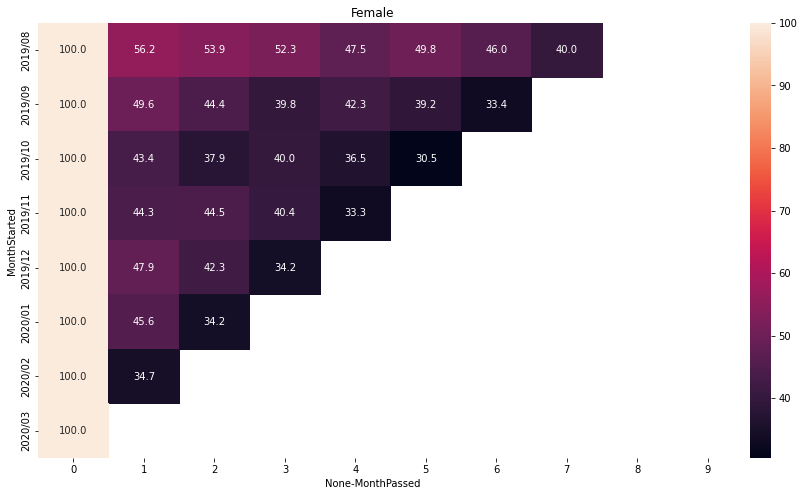

In [ ]:
# 여성 그룹
female_dt = data[data['gender'] == 'female']
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('Female')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

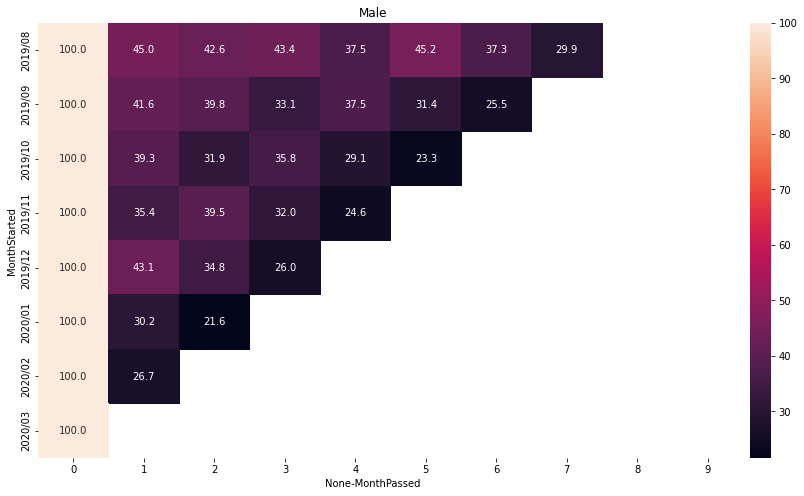

In [ ]:
# 남성 그룹
female_dt = data[data['gender'] == 'male']
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('Male')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

### 연령

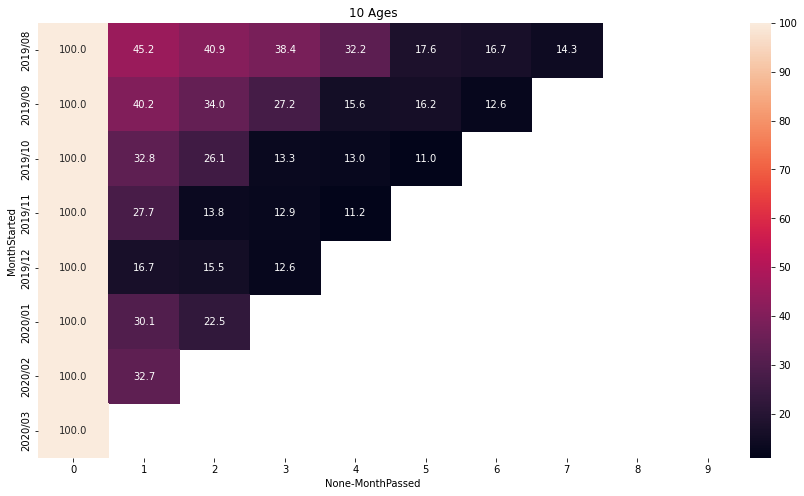

In [ ]:
female_dt = data[data['age_category'] == 10]
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('10 Ages')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

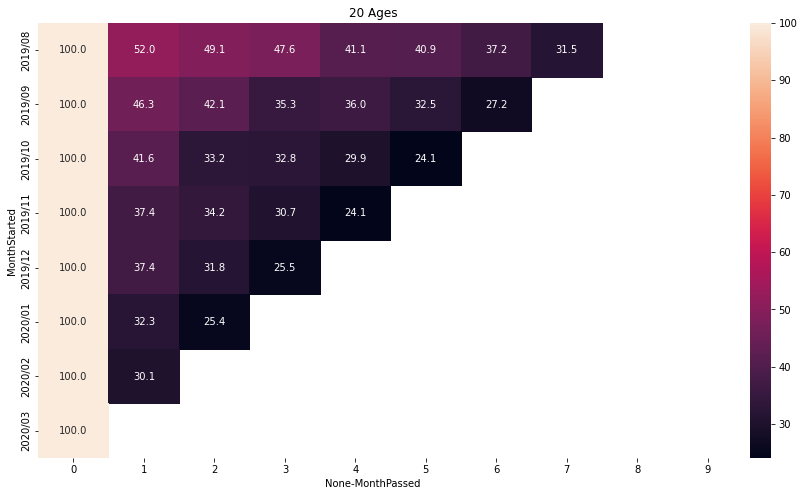

In [ ]:
female_dt = data[data['age_category'] == 20]
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('20 Ages')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

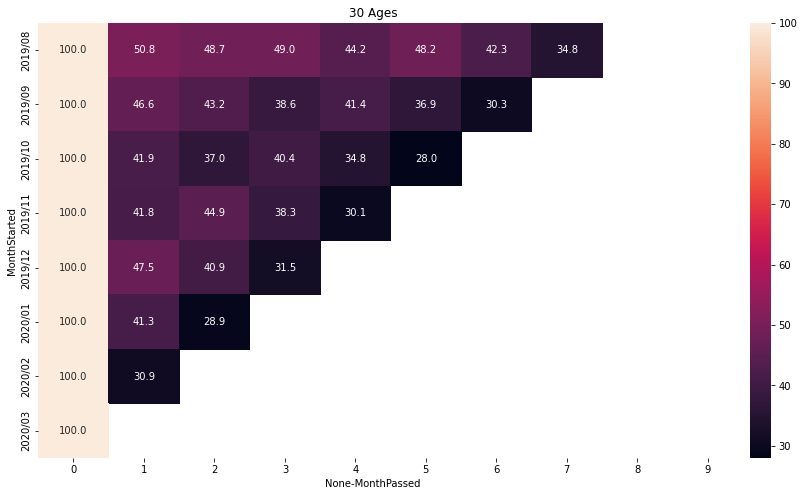

In [ ]:
female_dt = data[data['age_category'] == 30]
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('30 Ages')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

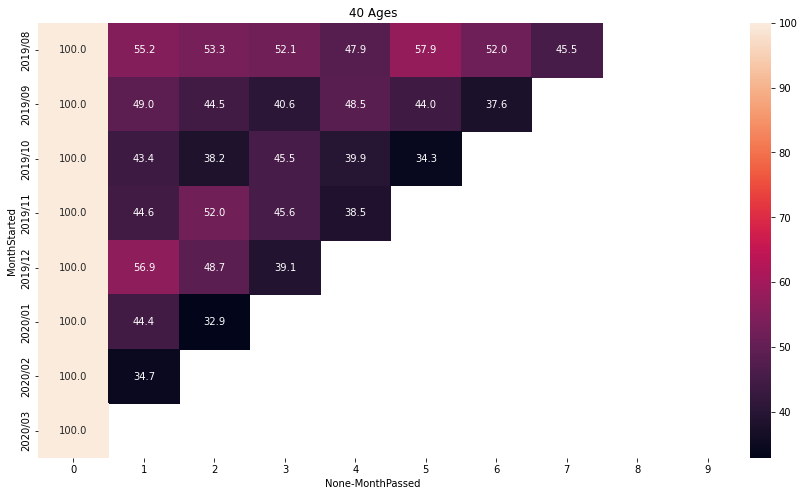

In [ ]:
female_dt = data[data['age_category'] == 40]
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('40 Ages')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

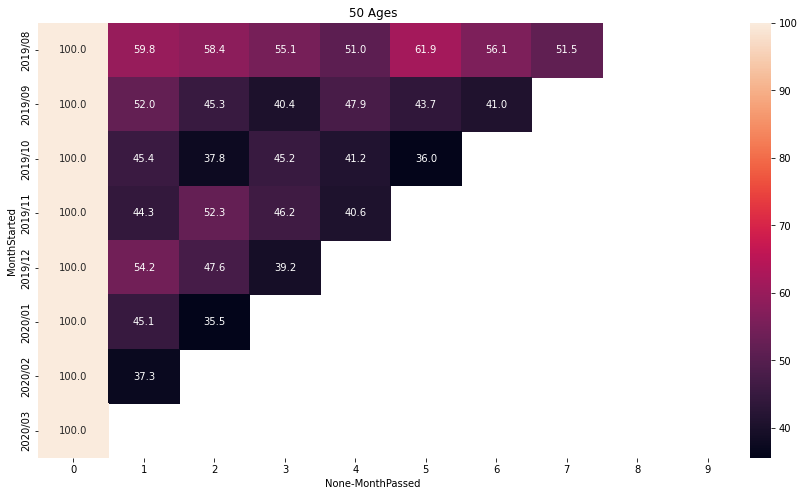

In [ ]:
female_dt = data[data['age_category'] == 50]
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('50 Ages')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

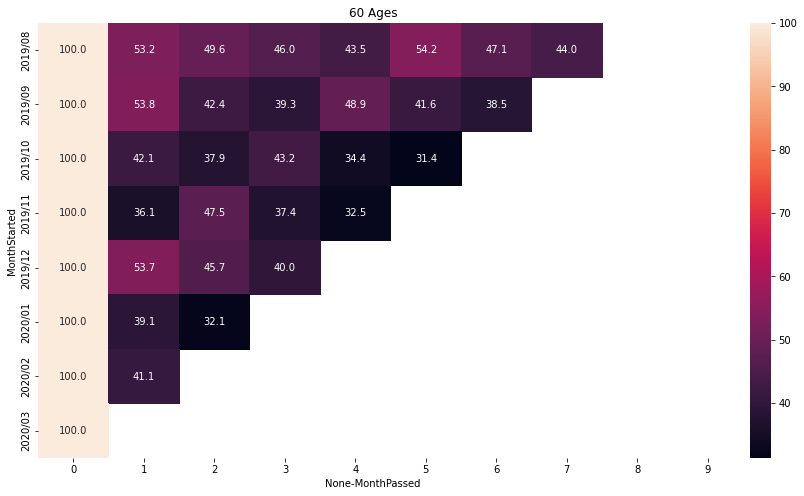

In [ ]:
female_dt = data[data['age_category'] == 60]
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('60 Ages')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

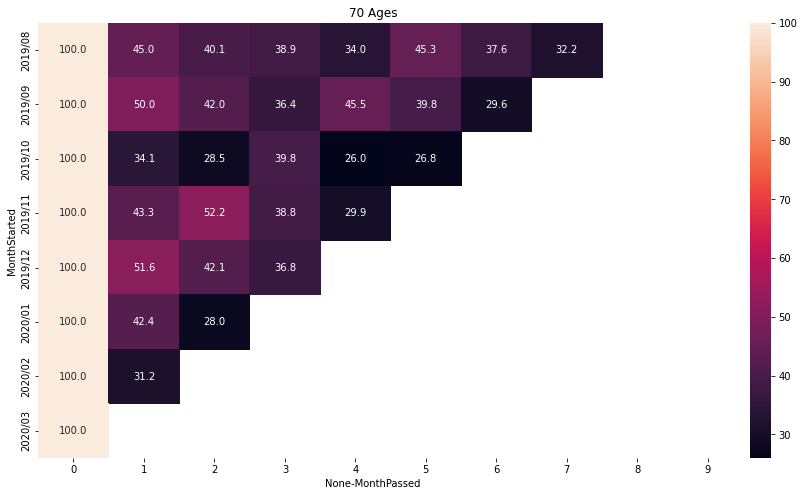

In [ ]:
female_dt = data[data['age_category'] == 70]
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

female_df = female_df.pivot(index='MonthStarted', columns='MonthPassed')

female_cohort = female_df.div(female_df.iloc[:, 0], axis=0) * 100
female_cohort = female_cohort.round(decimals=2)

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
plt.title('70 Ages')
sns.heatmap(female_cohort,
            annot=True,
            xticklabels=xticks,
            yticklabels=yticks,
            fmt='.1f')

## 재구매 lineplot으로 보기

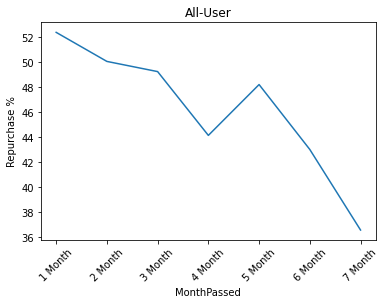

In [ ]:
female_group = data.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()
female_df

femonth0 = female_df[female_df['MonthPassed'] == 0]['customer_id']
femonth0.reset_index(drop=True, inplace = True)
femonth1 = female_df[female_df['MonthPassed'] == 1]['customer_id']
femonth1.reset_index(drop=True, inplace = True)
femonth2 = female_df[female_df['MonthPassed'] == 2]['customer_id']
femonth2.reset_index(drop=True, inplace = True)
femonth3 = female_df[female_df['MonthPassed'] == 3]['customer_id']
femonth3.reset_index(drop=True, inplace = True)
femonth4 = female_df[female_df['MonthPassed'] == 4]['customer_id']
femonth4.reset_index(drop=True, inplace = True)
femonth5 = female_df[female_df['MonthPassed'] == 5]['customer_id']
femonth5.reset_index(drop=True, inplace = True)
femonth6 = female_df[female_df['MonthPassed'] == 6]['customer_id']
femonth6.reset_index(drop=True, inplace = True)
femonth7 = female_df[female_df['MonthPassed'] == 7]['customer_id']
femonth7.reset_index(drop=True, inplace = True)

monthDate = ['1 Month', '2 Month', '3 Month', '4 Month', '5 Month', '6 Month', '7 Month']

fmonthPassed = []

fmonthPassed.append((femonth1.div(femonth0) * 100).mean())
fmonthPassed.append((femonth2.div(femonth0) * 100).mean())
fmonthPassed.append((femonth3.div(femonth0) * 100).mean())
fmonthPassed.append((femonth4.div(femonth0) * 100).mean())
fmonthPassed.append((femonth5.div(femonth0) * 100).mean())
fmonthPassed.append((femonth6.div(femonth0) * 100).mean())
fmonthPassed.append((femonth7.div(femonth0) * 100).mean())

monthDate = pd.Series(monthDate)
fmonthPassed = pd.Series(fmonthPassed)
fremonth = pd.concat([fmonthPassed, monthDate], axis = 1)
ax = sns.lineplot(y = fremonth[0], x = fremonth[1], data = fremonth)
ax.set_xlabel('MonthPassed', fontsize = 10)
ax.set_ylabel('Repurchase %', fontsize = 10)
plt.title('All-User')
plt.xticks(rotation=45)
plt.show()

### 성별

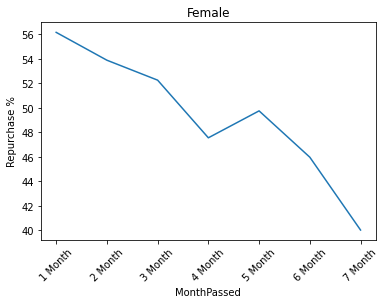

In [ ]:
# 여성 그룹
female_dt = data[data['gender'] == 'female']
female_group = female_dt.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()
female_df

femonth0 = female_df[female_df['MonthPassed'] == 0]['customer_id']
femonth1.reset_index(drop=True, inplace = True)
femonth1 = female_df[female_df['MonthPassed'] == 1]['customer_id']
femonth1.reset_index(drop=True, inplace = True)
femonth2 = female_df[female_df['MonthPassed'] == 2]['customer_id']
femonth2.reset_index(drop=True, inplace = True)
femonth3 = female_df[female_df['MonthPassed'] == 3]['customer_id']
femonth3.reset_index(drop=True, inplace = True)
femonth4 = female_df[female_df['MonthPassed'] == 4]['customer_id']
femonth4.reset_index(drop=True, inplace = True)
femonth5 = female_df[female_df['MonthPassed'] == 5]['customer_id']
femonth5.reset_index(drop=True, inplace = True)
femonth6 = female_df[female_df['MonthPassed'] == 6]['customer_id']
femonth6.reset_index(drop=True, inplace = True)
femonth7 = female_df[female_df['MonthPassed'] == 7]['customer_id']
femonth7.reset_index(drop=True, inplace = True)

monthDate = ['1 Month', '2 Month', '3 Month', '4 Month', '5 Month', '6 Month', '7 Month']

fmonthPassed = []

fmonthPassed.append((femonth1.div(femonth0) * 100).mean())
fmonthPassed.append((femonth2.div(femonth0) * 100).mean())
fmonthPassed.append((femonth3.div(femonth0) * 100).mean())
fmonthPassed.append((femonth4.div(femonth0) * 100).mean())
fmonthPassed.append((femonth5.div(femonth0) * 100).mean())
fmonthPassed.append((femonth6.div(femonth0) * 100).mean())
fmonthPassed.append((femonth7.div(femonth0) * 100).mean())

monthDate = pd.Series(monthDate)
fmonthPassed = pd.Series(fmonthPassed)
fremonth = pd.concat([fmonthPassed, monthDate], axis = 1)
ax = sns.lineplot(y = fremonth[0], x = fremonth[1], data = fremonth)
ax.set_xlabel('MonthPassed', fontsize = 10)
ax.set_ylabel('Repurchase %', fontsize = 10)
plt.title('Female')
plt.xticks(rotation=45)
plt.show()

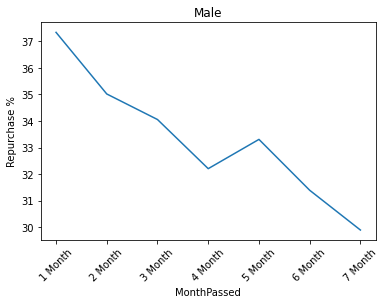

In [ ]:
# 남성 그룹
male_dt = data[data['gender'] == 'male']
male_group = male_dt.groupby(['MonthStarted', 'MonthPassed'])
male_df = male_group['customer_id'].apply(get_unique_no).reset_index()
male_df

month0 = male_df[male_df['MonthPassed'] == 0]['customer_id']
month0.reset_index(drop=True, inplace = True)
month1 = male_df[male_df['MonthPassed'] == 1]['customer_id']
month1.reset_index(drop=True, inplace = True)
month2 = male_df[male_df['MonthPassed'] == 2]['customer_id']
month2.reset_index(drop=True, inplace = True)
month3 = male_df[male_df['MonthPassed'] == 3]['customer_id']
month3.reset_index(drop=True, inplace = True)
month4 = male_df[male_df['MonthPassed'] == 4]['customer_id']
month4.reset_index(drop=True, inplace = True)
month5 = male_df[male_df['MonthPassed'] == 5]['customer_id']
month5.reset_index(drop=True, inplace = True)
month6 = male_df[male_df['MonthPassed'] == 6]['customer_id']
month6.reset_index(drop=True, inplace = True)
month7 = male_df[male_df['MonthPassed'] == 7]['customer_id']
month7.reset_index(drop=True, inplace = True)

monthDate = ['1 Month', '2 Month', '3 Month', '4 Month', '5 Month', '6 Month', '7 Month']

monthPassed = []

monthPassed.append((month1.div(month0) * 100).mean())
monthPassed.append((month2.div(month0) * 100).mean())
monthPassed.append((month3.div(month0) * 100).mean())
monthPassed.append((month4.div(month0) * 100).mean())
monthPassed.append((month5.div(month0) * 100).mean())
monthPassed.append((month6.div(month0) * 100).mean())
monthPassed.append((month7.div(month0) * 100).mean())

monthDate = pd.Series(monthDate)
monthPassed = pd.Series(monthPassed)
remonth = pd.concat([monthPassed, monthDate], axis = 1)
ax = sns.lineplot(y = remonth[0], x = remonth[1], data = fremonth)
ax.set_xlabel('MonthPassed', fontsize = 10)
ax.set_ylabel('Repurchase %', fontsize = 10)
plt.title('Male')
plt.xticks(rotation=45)
plt.show()

### 연령

# 재구매 데이터와 고객데이터 병합

In [ ]:
cust = data.drop_duplicates(['customer_id'], keep = 'first') # 고객중복제거
rebuy.reset_index(drop=False, inplace = True) # 인덱스 부여
demo = pd.merge(rebuy, cust, on = 'customer_id', how = 'inner') # 고객 데이터와 재구매 데이터 병합
demo.head()

In [ ]:
demo.columns

In [ ]:
demo = demo[['customer_id', 'first', 'last', 'buy_ct', 'term', 'cycle','push_permission', 'gender', 'is_foreigner',
       'birthday', 'age', 'age_category', 'sign_up_date']]
demo.head(10)

# RFM


R : 최근 방문일

- recency = 최근


In [ ]:
# 최근 방문일
## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']



In [ ]:

# 최근 방문일로부터 얼마나 지났는지
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (data['created_at'].max() - x).days)


recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

F : 결제 빈도

- frequency = 고객 ID groupby후 created_at을 카운트


In [ ]:
## 각 고객별 구매횟수를 알아보자.
frequency_df = data.loc[:,('customer_id','counts')]
frequency_df

,customer_id,counts
0,207317,13
1,95246,20
2,208074,47
3,15552,24
4,511595,3
...,...,...
5623805,434398,136
5623806,481515,40
5623807,298192,13
5623808,430962,18


M : 기업에 대한 고객의 금전적 이익

- monetary = 고객 ID groupby후 post_discount의 합

In [ ]:
money = pd.DataFrame(data.groupby('customer_id',as_index=False)['post_discount'].sum())
money

,customer_id,post_discount
0,1,18960
1,10,22590
2,100,477525
3,1000,27300
4,10000,27150
...,...,...
544916,99995,114840
544917,99996,2861400
544918,99997,48230
544919,99998,14880


In [ ]:
## 데이터 병합
rfm_df = pd.concat([money,recency_df],axis=1) # money에 recency합치기
rfm = pd.concat([rfm_df,frequency_df],axis=1) # frequency합치기
rfm.columns = ['monetary','recency','frequency'] # 열의 이름 바꿔주기
rfm['recency'] = pd.to_datetime(rfm['recency']) # recency파일 날짜 형식으로 바꾸기
rfm['recency'] = rfm['recency'].dt.to_period(freq='M') # recency에 년-월 형식으로만 나올수 있게 하기
rfm

In [ ]:
# min_max 스케일링
from sklearn.preprocessing import minmax_scale

## 최근성: 숫자가 작을수록 좋음
# 즉, 최근 구매일이 얼마 지나지 않은 고객이 더 점수가 높음

rfm['Recency'] = minmax_scale(rfm['Recency'], axis = 0, copy = True )
#행기준으로, 카피해서 만들기
rfm['Recency'] = 1 - rfm['Recency']  # 작은값이 좋기 때문에, 1에서 빼줌(반전)


rfm['Frequency'] = minmax_scale(rfm['Frequency'], axis = 0, copy = True )
rfm['Monetary'] = minmax_scale(rfm['Monetary'], axis = 0, copy = True )


# 점수화하기
# score
rfm['Score'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']


# score 에 minmax_scale 적용
# 100을 곱해서 100점 만점으로 스케일링

rfm['Score'] = minmax_scale(rfm['Score'], axis = 0, copy = True) * 100

rfm['Score'] = round(rfm['Score'], 0)
rfm.head(3)

# CLV(고객생애가치)

## lifetime package

### RTFM 구하기

In [ ]:
import datetime as dt

# 최근 방문일

## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']
# 최근 방문일로부터 얼마나 지났는지
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (dt.datetime.now() - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

## 각 고객별 구매횟수 & 금액 알아보자.
frequency_df = pd.DataFrame(data.groupby('customer_id', as_index=False)['created_at'].nunique())

money = pd.DataFrame(data.groupby('customer_id',as_index=False)['post_discount'].sum())

# 현재 - 첫구매
min_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].min())
min_df['T'] = min_df['created_at'].apply(lambda x: (dt.datetime.now() - x).days)
min_df.drop(columns =['created_at'],inplace = True )


In [ ]:
recency_df.head(3)

,customer_id,Recency
0,1,1093
1,10,918
2,100,898


In [ ]:
min_df.head(3)

,customer_id,T
0,1,1095
1,10,931
2,100,1094


In [ ]:
## 데이터 병합
cltv_df = pd.merge(recency_df, min_df, how='left', on='customer_id') # money에 recency합치기
cltv_df = pd.merge(cltv_df, frequency_df, how ='left', on='customer_id') # frequency합치기
cltv_df = pd.merge(cltv_df,money,how = 'left', on='customer_id') # money합치기

In [ ]:
cltv_df.head(3)

,customer_id,Recency,T,created_at,post_discount
0,1,1093,1095,2,18960
1,10,918,931,2,22590
2,100,898,1094,42,477525


In [ ]:
cltv_df.set_index('customer_id', inplace = True)
cltv_df.columns = ['recency', 'T', 'frequency','monetary'] # 열의 이름 바꿔주기

#Expressing "monetary value" as average earnings per purchase - monetary평균으로
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
# selection of monetary values greater than zero - 0인 애들은 없애기
cltv_df = cltv_df[cltv_df["monetary"] > 0]
# Expression of "recency "and "T" in weekly terms - 일주일 단위로
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7
#frequency must be greater than 1. - 1번 이상 구매자만
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.head()

,recency,T,frequency,monetary
customer_id,,,,
1,156.142857,156.428571,2,9480.000000
10,131.142857,133.000000,2,11295.000000
100,128.285714,156.285714,42,11369.642857
100001,149.714286,157.857143,3,14933.333333
100004,125.428571,150.285714,11,8435.636364


### BG/NBD

In [ ]:
# pip install lifetimes

In [ ]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
#setting up the model
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])
#fitting of all dataset

<lifetimes.BetaGeoFitter: fitted with 381694 subjects, a: 0.18, alpha: 8.04, b: 5.89, r: 0.84>

In [ ]:
cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])
# 위의 함수 = predict 같은 거임

cltv_df['expected_purc_1_month'] = bgf.predict(4,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'])

In [ ]:
# 한달 매출이 어떻게 될까?
bgf.predict(4,cltv_df['frequency'],cltv_df['recency'],cltv_df['T']).sum()

69167.94905858929

In [ ]:
from lifetimes.plotting import plot_period_transactions

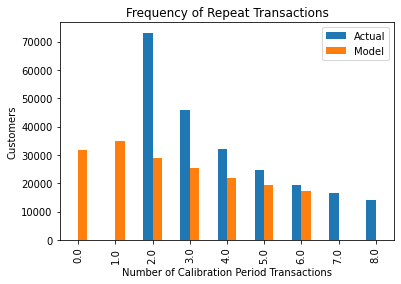

In [ ]:
plot_period_transactions(bgf)
plt.show()

### Gamma/Gamma

In [ ]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 381694 subjects, p: 2.64, q: 0.14, v: 2.59>

In [ ]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],cltv_df['monetary'])
cltv_df.head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit
customer_id,,,,,,,
1,156.142857,156.428571,2,9480.000000,0.016841,0.067312,11338.356659
10,131.142857,133.000000,2,11295.000000,0.019621,0.078414,13508.852668
100,128.285714,156.285714,42,11369.642857,0.021148,0.084466,11459.077572
100001,149.714286,157.857143,3,14933.333333,0.022538,0.090077,16764.747600
100004,125.428571,150.285714,11,8435.636364,0.068943,0.275426,8694.796275
100005,133.428571,148.428571,11,14604.636364,0.072962,0.291479,15053.142756
100006,138.000000,153.285714,7,11925.714286,0.047059,0.188027,12511.575131
100008,125.571429,132.714286,7,16081.428571,0.054468,0.217595,16871.306939
10001,133.142857,140.428571,5,8900.000000,0.038410,0.153471,9524.509863


In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'],
 cltv_df['monetary'],
 time=3, # 3 Months
 freq='W', # Frequency of T ,in this case it is 'weekly'
 discount_rate=0.01)
cltv = cltv.reset_index()
cltv.head()

,customer_id,clv
0,1,2432.650621
1,10,3375.126864
2,100,3078.901213
3,100001,4812.163987
4,100004,7622.335288


In [ ]:
cltv_final = cltv_df.merge(cltv, on="customer_id", how="left")
#merging our real dataset and cltv_df data.
cltv_final

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
0,1,156.142857,156.428571,2,9480.000000,0.016841,0.067312,11338.356659,2432.650621
1,10,131.142857,133.000000,2,11295.000000,0.019621,0.078414,13508.852668,3375.126864
2,100,128.285714,156.285714,42,11369.642857,0.021148,0.084466,11459.077572,3078.901213
3,100001,149.714286,157.857143,3,14933.333333,0.022538,0.090077,16764.747600,4812.163987
4,100004,125.428571,150.285714,11,8435.636364,0.068943,0.275426,8694.796275,7622.335288
...,...,...,...,...,...,...,...,...,...
381689,99992,130.428571,159.857143,6,39660.000000,0.038398,0.153437,41950.741580,20501.380523
381690,99994,135.571429,154.285714,4,29090.000000,0.028781,0.115014,31685.459648,11609.764748
381691,99995,131.000000,156.285714,5,22968.000000,0.033924,0.135563,24578.778908,10613.312268
381692,99996,135.285714,136.714286,16,178837.500000,0.115135,0.459861,182575.568442,267067.207363


- clv값을 0-1사이의 값으로 조정

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
#score between 0-1 ,1 is best 0 is worst. You can change by your wish, if you want you can score between 0-100 .
scaler.fit(cltv_final[['clv']])
cltv_final['scaled_clv'] = scaler.transform(cltv_final[['clv']])
cltv_final.sort_values(by="scaled_clv", ascending=False).head()

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv
138764,278477,135.142857,139.285714,44,802943.181818,0.300284,1.199169,808965.829885,3.084308e+06,1.000000
68561,188272,135.142857,139.142857,39,807653.846154,0.267305,1.067488,814495.070125,2.764504e+06,0.896313
306810,494218,131.714286,148.285714,32,850178.125000,0.176327,0.704250,858971.150583,1.924083e+06,0.623830
78017,200406,135.285714,139.428571,26,774461.538462,0.179703,0.717696,784343.497989,1.790194e+06,0.580420
101280,230370,148.000000,148.142857,23,902391.304348,0.151593,0.605498,915429.166946,1.763298e+06,0.571700


- 고객들을 clv에 따라 A,B,C,D그룹으로 나눔

In [ ]:
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.head()
cltv_final.sort_values(by="scaled_clv", ascending=False).head(10)

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv,segment
138764,278477,135.142857,139.285714,44,802943.181818,0.300284,1.199169,808965.829885,3.084308e+06,1.000000,A
68561,188272,135.142857,139.142857,39,807653.846154,0.267305,1.067488,814495.070125,2.764504e+06,0.896313,A
306810,494218,131.714286,148.285714,32,850178.125000,0.176327,0.704250,858971.150583,1.924083e+06,0.623830,A
78017,200406,135.285714,139.428571,26,774461.538462,0.179703,0.717696,784343.497989,1.790194e+06,0.580420,A
101280,230370,148.000000,148.142857,23,902391.304348,0.151593,0.605498,915429.166946,1.763298e+06,0.571700,A
324114,516523,135.000000,139.428571,31,625783.870968,0.213025,0.850750,632467.116670,1.711016e+06,0.554749,A
221414,38481,135.285714,148.285714,83,905745.783133,0.136415,0.544785,909334.631873,1.575198e+06,0.510714,A
5399,106924,133.714286,148.285714,41,555101.560976,0.217124,0.867163,559572.350968,1.543232e+06,0.500349,A
199088,355991,129.571429,139.285714,25,692848.000000,0.169448,0.676746,702046.918280,1.510958e+06,0.489886,A
183334,335736,125.571429,137.142857,87,744186.551724,0.157102,0.627320,746999.172663,1.489501e+06,0.482929,A


In [ ]:
cltv_final.shape

(381694, 11)

In [ ]:
cltv_final['segment'].value_counts()

D    95424
A    95424
C    95423
B    95423
Name: segment, dtype: int64

(array([3.8132e+05, 2.9000e+02, 4.9000e+01, 1.9000e+01, 8.0000e+00,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

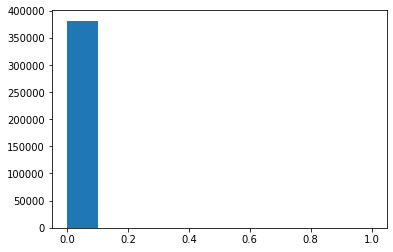

In [ ]:
plt.hist(cltv_final['scaled_clv'])

## lifetime package_ 최근 방문일 = 마지막날

### RTFM 구하기

In [ ]:
import datetime as dt

# 최근 방문일
last =pd.to_datetime('2020-04-01 23:59:14.018000')

## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']
# 최근 방문일로부터 얼마나 지났는지
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

## 각 고객별 구매횟수 & 금액 알아보자.
frequency_df = pd.DataFrame(data.groupby('customer_id', as_index=False)['created_at'].nunique())

money = pd.DataFrame(data.groupby('customer_id',as_index=False)['post_discount'].sum())

# 현재 - 첫구매
min_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].min())
min_df['T'] = min_df['created_at'].apply(lambda x: (last - x).days)
min_df.drop(columns =['created_at'],inplace = True )


In [ ]:
min_df.head(3)

,customer_id,T
0,1,1095
1,10,931
2,100,1094


In [ ]:
## 데이터 병합
cltv_df = pd.merge(recency_df, min_df, how='left', on='customer_id') # money에 recency합치기
cltv_df = pd.merge(cltv_df, frequency_df, how ='left', on='customer_id') # frequency합치기
cltv_df = pd.merge(cltv_df,money,how = 'left', on='customer_id') # money합치기

In [ ]:
cltv_df.set_index('customer_id', inplace = True)
cltv_df.columns = ['recency', 'T', 'frequency','monetary'] # 열의 이름 바꿔주기

#Expressing "monetary value" as average earnings per purchase - monetary평균으로
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
# selection of monetary values greater than zero - 0인 애들은 없애기   # 1366 행 제거됨
cltv_df = cltv_df[cltv_df["monetary"] > 0]
# Expression of "recency "and "T" in weekly terms - 일주일 단위로
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7
#frequency must be greater than 1. - 1번 이상 구매자만   # 163227 행 제거됨
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.head()

,recency,T,frequency,monetary
customer_id,,,,
1,31.142857,31.428571,2,9480.000000
10,6.000000,8.000000,2,11295.000000
100,3.285714,31.285714,42,11369.642857
100001,24.714286,32.857143,3,14933.333333
100004,0.428571,25.285714,11,8435.636364


In [ ]:
print(cltv_df.shape)

(544921, 5)


### BG/NBD

In [ ]:
# pip install lifetimes

In [ ]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
#setting up the model
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])
#fitting of all dataset

<lifetimes.BetaGeoFitter: fitted with 381694 subjects, a: 0.94, alpha: 0.01, b: 7.46, r: 0.27>

In [ ]:
cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])
# 위의 함수 = predict 같은 거임

cltv_df['expected_purc_1_month'] = bgf.predict(4,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'])

In [ ]:
cltv_df

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month
customer_id,,,,,,
1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01
10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01
100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39
100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01
100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19
...,...,...,...,...,...,...
99992,5.428571,34.714286,6,39660.000000,2.136418e-05,8.377807e-05
99994,10.571429,29.285714,4,29090.000000,1.823724e-02,7.152140e-02
99995,6.000000,31.285714,5,22968.000000,3.415837e-04,1.338786e-03


In [ ]:
# 한달 매출이 어떻게 될까?
bgf.predict(4,cltv_df['frequency'],cltv_df['recency'],cltv_df['T']).sum()  # 4 = 4주

87023.20060081087

In [ ]:
from lifetimes.plotting import plot_period_transactions

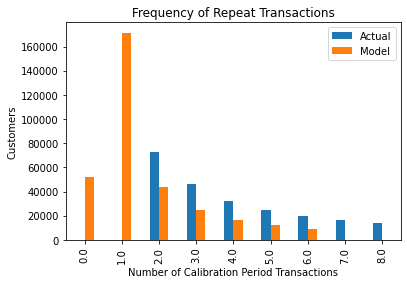

In [ ]:
plot_period_transactions(bgf)
plt.show()

### Gamma/Gamma

In [ ]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 381694 subjects, p: 2.64, q: 0.14, v: 2.59>

In [ ]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],cltv_df['monetary'])
cltv_df.head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit
customer_id,,,,,,,
1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01,11338.356659
10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01,13508.852668
100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39,11459.077572
100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01,16764.747600
100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19,8694.796275
100005,8.428571,23.428571,11,14604.636364,8.846660e-05,3.413659e-04,15053.142756
100006,12.857143,28.285714,7,11925.714286,1.134538e-02,4.423150e-02,12511.575131
100008,0.571429,7.571429,7,16081.428571,1.068394e-07,3.918948e-07,16871.306939
10001,8.000000,15.428571,5,8900.000000,9.347632e-02,3.592606e-01,9524.509863


In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'],
 cltv_df['monetary'],
 time=3, # 3 Months
 freq='W', # Frequency of T ,in this case it is 'weekly'
 discount_rate=0.01)
cltv = cltv.reset_index()
cltv.head()

,customer_id,clv
0,1,8.869929e+03
1,10,3.322535e+04
2,100,4.336726e-35
3,100001,1.595096e+04
4,100004,1.219515e-14


(array([3.812e+05, 3.180e+02, 8.300e+01, 6.700e+01, 1.500e+01, 7.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  2.23780482,  4.47560964,  6.71341446,  8.95121927,
        11.18902409, 13.42682891, 15.66463373, 17.90243855, 20.14024337,
        22.37804819]),
 <a list of 10 Patch objects>)

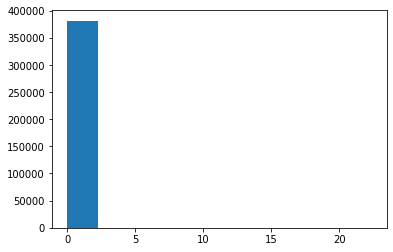

In [ ]:
plt.hist(cltv_df['expected_purc_1_week'])

In [ ]:
cltv_final = cltv_df.merge(cltv, on="customer_id", how="left")
#merging our real dataset and cltv_df data.
cltv_final

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
0,1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01,11338.356659,8.869929e+03
1,10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01,13508.852668,3.322535e+04
2,100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39,11459.077572,4.336726e-35
3,100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01,16764.747600,1.595096e+04
4,100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19,8694.796275,1.219515e-14
...,...,...,...,...,...,...,...,...,...
381689,99992,5.428571,34.714286,6,39660.000000,2.136418e-05,8.377807e-05,41950.741580,1.062407e+01
381690,99994,10.571429,29.285714,4,29090.000000,1.823724e-02,7.152140e-02,31685.459648,6.852975e+03
381691,99995,6.000000,31.285714,5,22968.000000,3.415837e-04,1.338786e-03,24578.778908,9.934107e+01
381692,99996,10.285714,11.571429,16,178837.500000,1.063935e+00,3.942295e+00,182575.568442,1.915728e+06


- clv값을 0-1사이의 값으로 조정

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
#score between 0-1 ,1 is best 0 is worst. You can change by your wish, if you want you can score between 0-100 .
scaler.fit(cltv_final[['clv']])
cltv_final['scaled_clv'] = scaler.transform(cltv_final[['clv']])
cltv_final.sort_values(by="scaled_clv", ascending=False).head()

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv
368438,82872,0.142857,0.142857,8,372937.500000,22.378048,41.967928,388860.252493,2.372066e+07,1.000000
224797,38917,0.142857,0.142857,3,413100.000000,10.414029,21.510070,463736.433923,1.534842e+07,0.647048
101280,230370,22.857143,23.142857,23,902391.304348,0.949085,3.632851,915429.166946,9.473867e+06,0.399393
280496,460470,14.285714,14.285714,14,915000.000000,0.933432,3.512292,936922.239403,9.033834e+06,0.380842
112398,244597,10.142857,11.428571,16,830100.000000,1.070770,3.964251,847450.180020,8.926978e+06,0.376338


- 고객들을 clv에 따라 A,B,C,D그룹으로 나눔

In [ ]:
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.head()
cltv_final.sort_values(by="scaled_clv", ascending=False).head(10)

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv,segment
368438,82872,0.142857,0.142857,8,372937.500000,22.378048,41.967928,388860.252493,2.372066e+07,1.000000,A
224797,38917,0.142857,0.142857,3,413100.000000,10.414029,21.510070,463736.433923,1.534842e+07,0.647048,A
101280,230370,22.857143,23.142857,23,902391.304348,0.949085,3.632851,915429.166946,9.473867e+06,0.399393,A
280496,460470,14.285714,14.285714,14,915000.000000,0.933432,3.512292,936922.239403,9.033834e+06,0.380842,A
112398,244597,10.142857,11.428571,16,830100.000000,1.070770,3.964251,847450.180020,8.926978e+06,0.376338,A
176873,327425,11.285714,12.285714,13,935261.538462,0.916129,3.421295,959437.437103,8.874239e+06,0.374114,A
127911,264503,13.000000,14.285714,22,690770.000000,1.197385,4.474626,701210.867769,8.490634e+06,0.357943,A
366592,80500,0.142857,0.285714,2,413100.000000,3.635831,8.947659,494013.617872,7.638445e+06,0.322017,A
265448,44112,0.142857,0.142857,2,229500.000000,7.702787,16.691633,274452.699288,7.280607e+06,0.306931,A
238854,407048,0.142857,0.142857,2,229500.000000,7.702787,16.691633,274452.699288,7.280607e+06,0.306931,A


In [ ]:
print(cltv_final['scaled_clv'].median())
print(cltv_final['scaled_clv'].mean())

4.277890712365396e-06
0.0008488832514610865


(array([3.81564e+05, 1.06000e+02, 1.30000e+01, 9.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

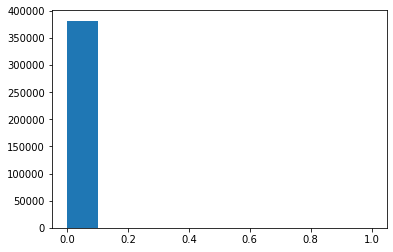

In [ ]:
plt.hist(cltv_final['scaled_clv'])

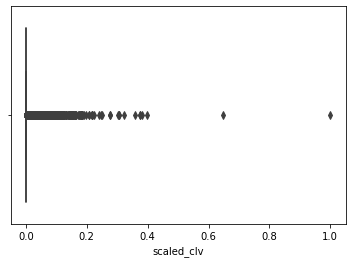

In [ ]:
sns.boxplot( cltv_final['scaled_clv'])

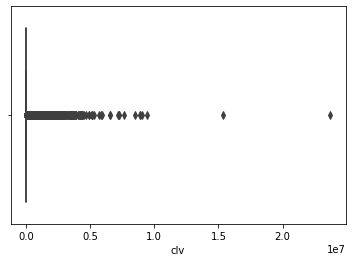

In [ ]:
sns.boxplot( cltv_final['clv'])

## cashback lifetime package_ 최근 방문일 = 마지막날

### RTFM 구하기

In [ ]:
import datetime as dt

# 최근 방문일
last =pd.to_datetime('2020-04-01 23:59:14.018000')

## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']
# 최근 방문일로부터 얼마나 지났는지
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

## 각 고객별 구매횟수 & 금액 알아보자.
frequency_df = pd.DataFrame(data.groupby('customer_id', as_index=False)['created_at'].nunique())

money = pd.DataFrame(data.groupby('customer_id',as_index=False)['post_discount'].sum())

# 현재 - 첫구매
min_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].min())
min_df['T'] = min_df['created_at'].apply(lambda x: (last - x).days)
min_df.drop(columns =['created_at'],inplace = True )


In [ ]:
min_df.head(3)

,customer_id,T
0,1,1095
1,10,931
2,100,1094


In [ ]:
## 데이터 병합
cltv_df = pd.merge(recency_df, min_df, how='left', on='customer_id') # money에 recency합치기
cltv_df = pd.merge(cltv_df, frequency_df, how ='left', on='customer_id') # frequency합치기
cltv_df = pd.merge(cltv_df,money,how = 'left', on='customer_id') # money합치기

In [ ]:
cltv_df.set_index('customer_id', inplace = True)
cltv_df.columns = ['recency', 'T', 'frequency','monetary'] # 열의 이름 바꿔주기

#Expressing "monetary value" as average earnings per purchase - monetary평균으로
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
# selection of monetary values greater than zero - 0인 애들은 없애기   # 1366 행 제거됨
cltv_df = cltv_df[cltv_df["monetary"] > 0]
# Expression of "recency "and "T" in weekly terms - 일주일 단위로
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7
#frequency must be greater than 1. - 1번 이상 구매자만   # 163227 행 제거됨
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.head()

,recency,T,frequency,monetary
customer_id,,,,
1,31.142857,31.428571,2,9480.000000
10,6.000000,8.000000,2,11295.000000
100,3.285714,31.285714,42,11369.642857
100001,24.714286,32.857143,3,14933.333333
100004,0.428571,25.285714,11,8435.636364


In [ ]:
print(cltv_df.shape)

(544921, 5)


### BG/NBD

In [ ]:
# pip install lifetimes

In [ ]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
#setting up the model
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])
#fitting of all dataset

<lifetimes.BetaGeoFitter: fitted with 381694 subjects, a: 0.94, alpha: 0.01, b: 7.46, r: 0.27>

In [ ]:
cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])
# 위의 함수 = predict 같은 거임

cltv_df['expected_purc_1_month'] = bgf.predict(4,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'])

In [ ]:
cltv_df

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month
customer_id,,,,,,
1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01
10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01
100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39
100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01
100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19
...,...,...,...,...,...,...
99992,5.428571,34.714286,6,39660.000000,2.136418e-05,8.377807e-05
99994,10.571429,29.285714,4,29090.000000,1.823724e-02,7.152140e-02
99995,6.000000,31.285714,5,22968.000000,3.415837e-04,1.338786e-03


In [ ]:
# 한달 매출이 어떻게 될까?
bgf.predict(4,cltv_df['frequency'],cltv_df['recency'],cltv_df['T']).sum()  # 4 = 4주

87023.20060081087

In [ ]:
from lifetimes.plotting import plot_period_transactions

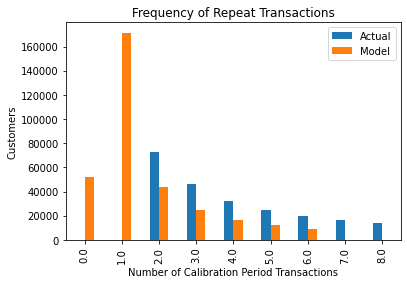

In [ ]:
plot_period_transactions(bgf)
plt.show()

### Gamma/Gamma

In [ ]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 381694 subjects, p: 2.64, q: 0.14, v: 2.59>

In [ ]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],cltv_df['monetary'])
cltv_df.head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit
customer_id,,,,,,,
1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01,11338.356659
10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01,13508.852668
100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39,11459.077572
100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01,16764.747600
100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19,8694.796275
100005,8.428571,23.428571,11,14604.636364,8.846660e-05,3.413659e-04,15053.142756
100006,12.857143,28.285714,7,11925.714286,1.134538e-02,4.423150e-02,12511.575131
100008,0.571429,7.571429,7,16081.428571,1.068394e-07,3.918948e-07,16871.306939
10001,8.000000,15.428571,5,8900.000000,9.347632e-02,3.592606e-01,9524.509863


In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'],
 cltv_df['monetary'],
 time=3, # 3 Months
 freq='W', # Frequency of T ,in this case it is 'weekly'
 discount_rate=0.01)
cltv = cltv.reset_index()
cltv.head()

,customer_id,clv
0,1,8.869929e+03
1,10,3.322535e+04
2,100,4.336726e-35
3,100001,1.595096e+04
4,100004,1.219515e-14


(array([3.812e+05, 3.180e+02, 8.300e+01, 6.700e+01, 1.500e+01, 7.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  2.23780482,  4.47560964,  6.71341446,  8.95121927,
        11.18902409, 13.42682891, 15.66463373, 17.90243855, 20.14024337,
        22.37804819]),
 <a list of 10 Patch objects>)

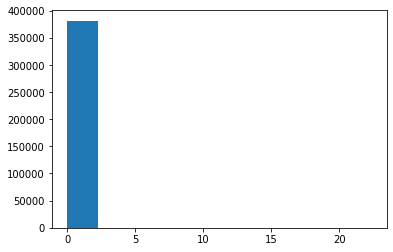

In [ ]:
plt.hist(cltv_df['expected_purc_1_week'])

In [ ]:
cltv_final = cltv_df.merge(cltv, on="customer_id", how="left")
#merging our real dataset and cltv_df data.
cltv_final

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
0,1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01,11338.356659,8.869929e+03
1,10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01,13508.852668,3.322535e+04
2,100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39,11459.077572,4.336726e-35
3,100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01,16764.747600,1.595096e+04
4,100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19,8694.796275,1.219515e-14
...,...,...,...,...,...,...,...,...,...
381689,99992,5.428571,34.714286,6,39660.000000,2.136418e-05,8.377807e-05,41950.741580,1.062407e+01
381690,99994,10.571429,29.285714,4,29090.000000,1.823724e-02,7.152140e-02,31685.459648,6.852975e+03
381691,99995,6.000000,31.285714,5,22968.000000,3.415837e-04,1.338786e-03,24578.778908,9.934107e+01
381692,99996,10.285714,11.571429,16,178837.500000,1.063935e+00,3.942295e+00,182575.568442,1.915728e+06


- clv값을 0-1사이의 값으로 조정

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
#score between 0-1 ,1 is best 0 is worst. You can change by your wish, if you want you can score between 0-100 .
scaler.fit(cltv_final[['clv']])
cltv_final['scaled_clv'] = scaler.transform(cltv_final[['clv']])
cltv_final.sort_values(by="scaled_clv", ascending=False).head()

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv
368438,82872,0.142857,0.142857,8,372937.500000,22.378048,41.967928,388860.252493,2.372066e+07,1.000000
224797,38917,0.142857,0.142857,3,413100.000000,10.414029,21.510070,463736.433923,1.534842e+07,0.647048
101280,230370,22.857143,23.142857,23,902391.304348,0.949085,3.632851,915429.166946,9.473867e+06,0.399393
280496,460470,14.285714,14.285714,14,915000.000000,0.933432,3.512292,936922.239403,9.033834e+06,0.380842
112398,244597,10.142857,11.428571,16,830100.000000,1.070770,3.964251,847450.180020,8.926978e+06,0.376338


- 고객들을 clv에 따라 A,B,C,D그룹으로 나눔

In [ ]:
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.head()
cltv_final.sort_values(by="scaled_clv", ascending=False).head(10)

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv,segment
368438,82872,0.142857,0.142857,8,372937.500000,22.378048,41.967928,388860.252493,2.372066e+07,1.000000,A
224797,38917,0.142857,0.142857,3,413100.000000,10.414029,21.510070,463736.433923,1.534842e+07,0.647048,A
101280,230370,22.857143,23.142857,23,902391.304348,0.949085,3.632851,915429.166946,9.473867e+06,0.399393,A
280496,460470,14.285714,14.285714,14,915000.000000,0.933432,3.512292,936922.239403,9.033834e+06,0.380842,A
112398,244597,10.142857,11.428571,16,830100.000000,1.070770,3.964251,847450.180020,8.926978e+06,0.376338,A
176873,327425,11.285714,12.285714,13,935261.538462,0.916129,3.421295,959437.437103,8.874239e+06,0.374114,A
127911,264503,13.000000,14.285714,22,690770.000000,1.197385,4.474626,701210.867769,8.490634e+06,0.357943,A
366592,80500,0.142857,0.285714,2,413100.000000,3.635831,8.947659,494013.617872,7.638445e+06,0.322017,A
265448,44112,0.142857,0.142857,2,229500.000000,7.702787,16.691633,274452.699288,7.280607e+06,0.306931,A
238854,407048,0.142857,0.142857,2,229500.000000,7.702787,16.691633,274452.699288,7.280607e+06,0.306931,A


In [ ]:
print(cltv_final['scaled_clv'].median())
print(cltv_final['scaled_clv'].mean())

4.277890712365396e-06
0.0008488832514610865


(array([3.81564e+05, 1.06000e+02, 1.30000e+01, 9.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

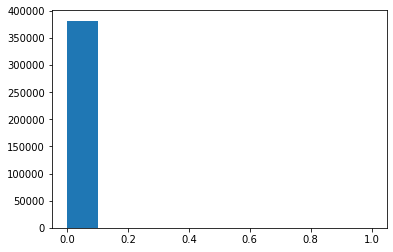

In [ ]:
plt.hist(cltv_final['scaled_clv'])

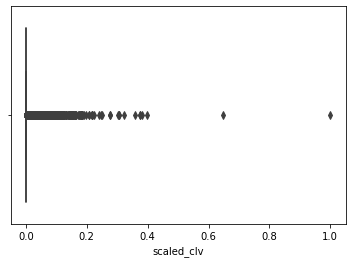

In [ ]:
sns.boxplot( cltv_final['scaled_clv'])

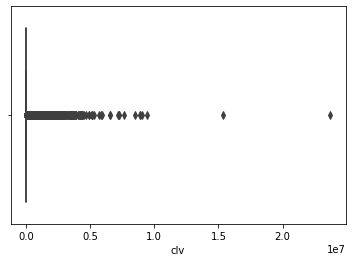

In [ ]:
sns.boxplot( cltv_final['clv'])

## CLV 계산식을 이용하여 구하기

In [ ]:
# 컬럼 소개 year = 구매한 달, month = 구매 년-월,
# MonthStarted = 첫 구매달, MonthPassed = 첫 구매로부터 지난 개월 수

data['year'] = data['created_at'].dt.to_period(freq='A')
data['month'] = data['created_at'].dt.to_period(freq='M')

month_group = data.groupby('customer_id')['month']
data['MonthStarted'] = month_group.transform(np.min)   # MonthStarted = 첫 구매달

data['MonthPassed'] = (data['month'].dt.year - data['MonthStarted'].dt.year) * 12 + (data['month'].dt.month - data['MonthStarted'].dt.month) #MonthPassed = 첫 구매로부터 지난 개월 수

In [ ]:
def get_unique_no(x):
    return len(np.unique(x))

female_group = data.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

femonth0 = female_df[female_df['MonthPassed'] == 0]['customer_id'].reset_index(drop=True)
femonth1 = female_df[female_df['MonthPassed'] == 1]['customer_id'].reset_index(drop=True)

In [ ]:
female_df[female_df['MonthPassed'] == 0]

,MonthStarted,MonthPassed,customer_id
0,2019-08,0,194355
8,2019-09,0,54259
15,2019-10,0,47654
21,2019-11,0,44953
26,2019-12,0,54347
30,2020-01,0,70895
33,2020-02,0,47540
35,2020-03,0,27016


In [ ]:
def get_unique_no(x):
    return len(np.unique(x))


# 1. 고객 아이디 당 첫 구매일과 첫 구매로부터 지난 개월 수(MonthPassed)를 그룹화 하기
female_group = data.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index() # 사람 '수'

#2. 첫 구매로부터 지난 개월 수에 따라 고객들 묶기
femonth0 = female_df[female_df['MonthPassed'] == 0]['customer_id'].reset_index(drop=True)  #
femonth1 = female_df[female_df['MonthPassed'] == 1]['customer_id'].reset_index(drop=True)
femonth2 = female_df[female_df['MonthPassed'] == 2]['customer_id'].reset_index(drop=True)
femonth3 = female_df[female_df['MonthPassed'] == 3]['customer_id'].reset_index(drop=True)
femonth4 = female_df[female_df['MonthPassed'] == 4]['customer_id'].reset_index(drop=True)
femonth5 = female_df[female_df['MonthPassed'] == 5]['customer_id'].reset_index(drop=True)
femonth6 = female_df[female_df['MonthPassed'] == 6]['customer_id'].reset_index(drop=True)
femonth7 = female_df[female_df['MonthPassed'] == 7]['customer_id'].reset_index(drop=True)

monthDate = ['1 Month', '2 Month', '3 Month', '4 Month', '5 Month', '6 Month', '7 Month']

fmonthPassed = []

fmonthPassed.append((femonth1.div(femonth0) * 100).mean())  # 첫구매로부터  1개월 지난 고객을 첫구매로부터  0개월 지난 고객으로 나누기
fmonthPassed.append((femonth2.div(femonth0) * 100).mean())
fmonthPassed.append((femonth3.div(femonth0) * 100).mean())
fmonthPassed.append((femonth4.div(femonth0) * 100).mean())
fmonthPassed.append((femonth5.div(femonth0) * 100).mean())
fmonthPassed.append((femonth6.div(femonth0) * 100).mean())
fmonthPassed.append((femonth7.div(femonth0) * 100).mean())

monthDate = pd.Series(monthDate)
fmonthPassed = pd.Series(fmonthPassed)


In [ ]:
#CLV = (monetary) / (1-유지율+할인율)

# 고객의 평균 유지율, 재구매 line-plot의 코드에서 가져옴
# fmonthPassed : 각 개월이 지났을때의 구매율을 담은 리스트
fmonthPassed.mean()
retention_rate = round(fmonthPassed.mean(),0)/100

cust_disc = data.groupby('customer_id')['discount_rate'].mean()      #discount_rate
discount_rate = round(cust_disc.mean(),0)/100

In [ ]:
last =pd.to_datetime('2020-04-01 23:59:14.018000')

## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']
# 최근 방문일로부터 얼마나 지났는지
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

## 각 고객별 구매횟수 & 금액 알아보자.
frequency_df = pd.DataFrame(data.groupby('customer_id', as_index=False)['created_at'].nunique())

money = pd.DataFrame(data.groupby('customer_id',as_index=False)['post_discount'].sum())
promotion = pd.DataFrame(data.groupby('customer_id', as_index = False)['total_promotion'].sum())
# 현재 - 첫구매
min_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].min())
min_df['T'] = min_df['created_at'].apply(lambda x: (last - x).days)
min_df.drop(columns =['created_at'],inplace = True )

## 데이터 병합
test = pd.merge(recency_df, min_df, how='left', on='customer_id') # money에 recency합치기
test = pd.merge(test, frequency_df, how ='left', on='customer_id') # frequency합치기
test = pd.merge(test,money,how = 'left', on='customer_id') # money합치기
test = pd.merge(test, promotion, how = 'left', on = 'customer_id') # promotion 합치기


test.columns = ['customer_id','recency', 'T', 'frequency','monetary','promotion'] # 열의 이름 바꿔주기

#Expressing "monetary value" as average earnings per purchase - monetary평균으로

test["monetary"] = test["monetary"] - test['promotion'] / test['frequency']

#frequency must be greater than 1. - 1번 이상 구매자만
test = test[(test['frequency'] > 1)]
test = test.drop(test.columns[5], axis = 1)
test.head(3)

,customer_id,recency,T,frequency,monetary
0,1,218,220,2,16275.000000
1,10,42,56,2,21310.000000
2,100,23,219,42,476527.809524


In [ ]:
# CLV = (monetary) / (1-유지율 + i)
test['clv'] = test['monetary'] / (1- retention_rate + 0.01)

In [ ]:
test

,customer_id,recency,T,frequency,monetary,clv
0,1,218,220,2,1.627500e+04,2.625000e+04
1,10,42,56,2,2.131000e+04,3.437097e+04
2,100,23,219,42,4.765278e+05,7.685932e+05
6,100001,173,230,3,4.323333e+04,6.973118e+04
9,100004,3,177,11,9.184109e+04,1.481308e+05
...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05
541014,99994,74,205,4,1.148425e+05,1.852298e+05
541015,99995,42,219,5,1.127140e+05,1.817968e+05
541016,99996,72,81,16,2.855400e+06,4.605484e+06


# 8월 30일 (희구)


In [ ]:
test

,customer_id,recency,T,frequency,monetary,clv
0,1,218,220,2,1.627500e+04,2.625000e+04
1,10,42,56,2,2.131000e+04,3.437097e+04
2,100,23,219,42,4.765278e+05,7.685932e+05
6,100001,173,230,3,4.323333e+04,6.973118e+04
9,100004,3,177,11,9.184109e+04,1.481308e+05
...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05
541014,99994,74,205,4,1.148425e+05,1.852298e+05
541015,99995,42,219,5,1.127140e+05,1.817968e+05
541016,99996,72,81,16,2.855400e+06,4.605484e+06


In [ ]:
# 고객 세그먼트
test['monetary'].describe()

count    3.806930e+05
mean     2.648935e+05
std      6.152494e+05
min     -6.040000e+04
25%      4.367550e+04
50%      1.086286e+05
75%      2.822040e+05
max      1.122582e+08
Name: monetary, dtype: float64

In [ ]:
def get_score(v):
  if v >= 28220 :
    m_score = 4
  elif 28220 > v >= 10863 :
    m_score= 3
  elif 10863 > v >= 4368 :
    m_score = 2
  else :
    m_score = 1
  return m_score

test["m_socre"] = test["monetary"].apply(lambda v: get_score(v))
test = test.drop(test.columns[6], axis = 1)

test

,customer_id,recency,T,frequency,monetary,clv,m_socre
0,1,218,220,2,1.627500e+04,2.625000e+04,3
1,10,42,56,2,2.131000e+04,3.437097e+04,3
2,100,23,219,42,4.765278e+05,7.685932e+05,4
6,100001,173,230,3,4.323333e+04,6.973118e+04,4
9,100004,3,177,11,9.184109e+04,1.481308e+05,4
...,...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05,4
541014,99994,74,205,4,1.148425e+05,1.852298e+05,4
541015,99995,42,219,5,1.127140e+05,1.817968e+05,4
541016,99996,72,81,16,2.855400e+06,4.605484e+06,4


In [ ]:
test['frequency'].describe()

count    380693.000000
mean         14.328004
std          23.772806
min           2.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        2705.000000
Name: frequency, dtype: float64

In [ ]:
def get_score(v):
  if v >= 16 :
    f_score = 4
  elif 16 > v >= 6 :
    f_score= 3
  elif 6 > v >= 3 :
    f_score = 2
  else :
    f_score = 1
  return f_score

test["f_socre"] = test["frequency"].apply(lambda v: get_score(v))
test

,customer_id,recency,T,frequency,monetary,clv,m_socre,f_socre
0,1,218,220,2,1.627500e+04,2.625000e+04,3,1
1,10,42,56,2,2.131000e+04,3.437097e+04,3,1
2,100,23,219,42,4.765278e+05,7.685932e+05,4,4
6,100001,173,230,3,4.323333e+04,6.973118e+04,4,2
9,100004,3,177,11,9.184109e+04,1.481308e+05,4,3
...,...,...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05,4,3
541014,99994,74,205,4,1.148425e+05,1.852298e+05,4,2
541015,99995,42,219,5,1.127140e+05,1.817968e+05,4,2
541016,99996,72,81,16,2.855400e+06,4.605484e+06,4,4


In [ ]:
test['recency'].describe()

count    380693.000000
mean         55.411174
std          56.714514
min           1.000000
25%          12.000000
50%          37.000000
75%          78.000000
max         244.000000
Name: recency, dtype: float64

In [ ]:
def get_score(v):
  if v >= 78 :
    r_score = 4
  elif 78 > v >= 37 :
    r_score= 3
  elif 37 > v >= 12 :
    r_score = 2
  else :
    r_score = 1
  return r_score

test["r_socre"] = test["recency"].apply(lambda v: get_score(v))
test


,customer_id,recency,T,frequency,monetary,clv,m_socre,f_socre,r_socre
0,1,218,220,2,1.627500e+04,2.625000e+04,3,1,4
1,10,42,56,2,2.131000e+04,3.437097e+04,3,1,3
2,100,23,219,42,4.765278e+05,7.685932e+05,4,4,2
6,100001,173,230,3,4.323333e+04,6.973118e+04,4,2,4
9,100004,3,177,11,9.184109e+04,1.481308e+05,4,3,1
...,...,...,...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05,4,3,3
541014,99994,74,205,4,1.148425e+05,1.852298e+05,4,2,3
541015,99995,42,219,5,1.127140e+05,1.817968e+05,4,2,3
541016,99996,72,81,16,2.855400e+06,4.605484e+06,4,4,3


In [ ]:
#평균 할인
d_rate = data.groupby('customer_id')['discount_amount'].mean()
d_rate = pd.DataFrame(d_rate).reset_index()

In [ ]:
# 평균 캐시백
c_rate=data.groupby('customer_id')['cashback_amount'].mean()
c_rate= pd.DataFrame(c_rate).reset_index()

In [ ]:
rate = pd.merge(d_rate, c_rate, on = 'customer_id', how = 'left')

In [ ]:
rate

,customer_id,discount_amount,cashback_amount
0,1,2685.000000,0.000000
1,10,1000.000000,280.000000
2,100,990.071429,7.119048
3,1000,900.000000,0.000000
4,10000,1050.000000,0.000000
...,...,...,...
541014,99994,1517.500000,0.000000
541015,99995,2126.000000,0.000000
541016,99996,6000.000000,0.000000
541017,99998,1317.500000,118.000000


In [ ]:
# 푸시 비율
chai = pd.read_csv('chai.csv')


In [ ]:
#chai['sell'] = chai['covid_buy'] + chai['covid_x_num']

chai = chai[['customer_id','push_num','age','age_category','gender','sell']]

In [ ]:
chai['push_rate'] = (chai['push_num'] / chai['sell']) * 100

In [ ]:
chai['push_rate'].describe()

count    541019.000000
mean         41.971169
std          49.351215
min           0.000000
25%           0.000000
50%           0.000000
75%         100.000000
max         100.000000
Name: push_rate, dtype: float64

In [ ]:
chai = df.astype({'시가':'int'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541019 entries, 0 to 541018
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   customer_id   541019 non-null  int64  
 1   push_num      541019 non-null  float64
 2   age           541019 non-null  int64  
 3   age_category  541019 non-null  int64  
 4   gender        541019 non-null  object 
 5   sell          541019 non-null  float64
 6   push_rate     541019 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 28.9+ MB


In [ ]:
rate = rate.astype({'customer':'int'})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541019 entries, 0 to 541018
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      541019 non-null  object 
 1   discount_amount  541019 non-null  float64
 2   cashback_amount  541019 non-null  float64
dtypes: float64(2), object(1)
memory usage: 16.5+ MB


In [ ]:
chai = pd.merge(chai, rate, on = 'customer_id', how = 'left')

ValueError: ignored

# 다중회귀분석 (희구)


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/fc/파이널프로젝트')
os.getcwd()

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # boxplot
import seaborn as sns # boxplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import re
from datetime import datetime

# 코랩 한글깨짐 방지 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
pd.set_option('display.max_columns',None) #

Mounted at /content/drive


In [ ]:
last_last = pd.read_csv('last_last_last.csv')
data = pd.read_csv('차이코퍼레이션 데이터(BA_assesment).csv')

info = data.drop_duplicates(['customer_id'], keep = 'first')
info = info[['customer_id', 'is_foreigner']]
last_last = pd.merge(last_last, info, how = 'left', on = 'customer_id')

In [ ]:
last_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541019 entries, 0 to 541018
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       541019 non-null  int64  
 1   customer_id      541019 non-null  int64  
 2   push_num         541019 non-null  float64
 3   age              541019 non-null  int64  
 4   age_category     541019 non-null  int64  
 5   gender           541019 non-null  object 
 6   sell             541019 non-null  float64
 7   push_rate        541019 non-null  float64
 8   discount_mean    541019 non-null  float64
 9   cashback_mean    541019 non-null  float64
 10  recency          541019 non-null  int64  
 11  T                541019 non-null  int64  
 12  frequency        541019 non-null  int64  
 13  monetary         541019 non-null  float64
 14  clv              541019 non-null  float64
 15  f_socre          541019 non-null  int64  
 16  r_socre          541019 non-null  int6

In [ ]:
last_last = last_last.rename(columns = {'push_rate': 'is_push', 'discount_amount':'CAC', 'group':'segmant'})
last_last = last_last.astype({'is_push': 'bool'})
last_last['is_CAC'] = last_last['CAC'] > 0
last_last['is_discount'] = last_last['discount_mean'] > 0 # 받았냐 안 받았냐
last_last['is_cashback'] = last_last['cashback_mean'] > 0
last_last = last_last.drop(columns= ['Unnamed: 0','age','push_num','sell', 'T', 'customer_id','f_socre','r_socre','m_socre', 'CAC', 'frequency', 'monetary'])
# last_last = pd.get_dummies(last_last, columns = ['is_push','age_category','gender','is_CAC', 'is_discount', 'is_cashback', 'is_foreigner', 'segmant'])
# last_last = last_last.drop(columns= ['is_push_False', 'age_category_100', 'gender_male', 'is_CAC_False', 'is_discount_False','is_cashback_False', 'is_foreigner_False', 'segmant_low_profit'])

In [ ]:
last_last['age_category'] = last_last['age_category'].astype(str)

In [ ]:
last_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541019 entries, 0 to 541018
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age_category   541019 non-null  object 
 1   gender         541019 non-null  object 
 2   is_push        541019 non-null  bool   
 3   discount_mean  541019 non-null  float64
 4   cashback_mean  541019 non-null  float64
 5   recency        541019 non-null  int64  
 6   clv            541019 non-null  float64
 7   segmant        541019 non-null  object 
 8   is_foreigner   541019 non-null  bool   
 9   is_CAC         541019 non-null  bool   
 10  is_discount    541019 non-null  bool   
 11  is_cashback    541019 non-null  bool   
dtypes: bool(5), float64(3), int64(1), object(3)
memory usage: 35.6+ MB


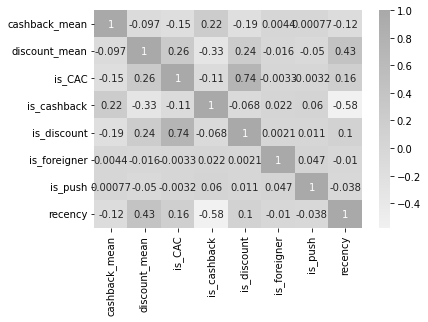

In [ ]:
x = last_last[last_last.columns.difference(['clv'])]
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("darkgray", as_cmap = True)
sns.heatmap(x.corr(), annot = True, cmap = cmap)
plt.show()

In [ ]:
last_last = pd.get_dummies(last_last, columns = ['is_push','age_category','gender','is_CAC', 'is_discount', 'is_cashback', 'is_foreigner', 'segmant'])
last_last = last_last.drop(columns= ['is_push_False', 'age_category_100', 'gender_male', 'is_CAC_False', 'is_discount_False','is_cashback_False', 'is_foreigner_False', 'segmant_VIP'])

In [ ]:
# last_last.to_csv('lllast.csv')
last_last = pd.read_csv('lllast.csv')

In [ ]:
last_last = last_last.drop(columns = ['Unnamed: 0'])
last_last.columns

Index(['discount_mean', 'cashback_mean', 'clv', 'is_push_True',
       'age_category_10', 'age_category_20', 'age_category_30',
       'age_category_40', 'age_category_50', 'age_category_60',
       'age_category_70', 'age_category_80', 'age_category_90',
       'gender_female', 'is_CAC_True', 'is_discount_True', 'is_cashback_True',
       'is_foreigner_True', 'segmant_New', 'segmant_Potential',
       'segmant_churn', 'segmant_low_profit'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
x = last_last[last_last.columns.difference(['clv'])]  # clv 컬럼 빼고 나머지
y = last_last[['clv']]  # clv 컬럼만
x = sm.add_constant(x, has_constant = 'add')
multi_model = sm.OLS(y, x)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    clv   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     3833.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:58:19   Log-Likelihood:            -8.1186e+06
No. Observations:              541019   AIC:                         1.624e+07
Df Residuals:                  540997   BIC:                         1.624e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.998e+05   7.96e+05     -0.377      0.706   -1.86e+06    1.26e+06
age_category_10     2.618e+05   7.96e+05      0.329      0.742    -1.3e+06    1.82e+06
age_category_20      3.24e+05   7.96e+05      0.407      0.684   -1.24e+06    1.88e+06
age_category_30     3.634e+05   7.96e+05      0.457      0.648    -1.2e+06    1.92e+06
age_category_40     4.226e+05   7.96e+05      0.531      0.595   -1.14e+06    1.98e+06
age_category_50     4.687e+05   7.96e+05      0.589      0.556   -1.09e+06    2.03e+06
age_category_60     4.597e+05   7.96e+05      0.577      0.564    -1.1e+06    2.02e+06
age_category_70     5.387e+05   7.96e+05      0.677      0.499   -1.02e+06     2.1e+06
age_category_80     4.603e+05   7.98e+05      0.577      0.564    -1.1e+06    2.02e+06
age_category_90     4.774e+05   8.28e+05      0.576      0.564   -1.15e+06     2.1e+06
cashback_mean         34.3465      1.714     20.038      0.000      30.987      37.706
discount_mean         84.1169      0.559    150.411      0.000      83.021      85.213
gender_female       2.182e+04   2294.417      9.509      0.000    1.73e+04    2.63e+04
is_CAC_True         2.842e+04   5381.329      5.281      0.000    1.79e+04     3.9e+04
is_cashback_True    3.406e+05   2969.847    114.676      0.000    3.35e+05    3.46e+05
is_discount_True    9.769e+04   6998.104     13.959      0.000     8.4e+04    1.11e+05
is_foreigner_True   2.162e+05   1.43e+04     15.117      0.000    1.88e+05    2.44e+05
is_push_True        5.231e+04   2272.030     23.025      0.000    4.79e+04    5.68e+04
segmant_New        -3.775e+05   3655.535   -103.261      0.000   -3.85e+05    -3.7e+05
segmant_Potential  -4.645e+05   4346.478   -106.861      0.000   -4.73e+05   -4.56e+05
segmant_churn      -5.764e+04   3721.865    -15.487      0.000   -6.49e+04   -5.03e+04
segmant_low_profit -4.361e+05   2.21e+05     -1.976      0.048   -8.69e+05   -3451.480
==============================================================================
Omnibus:                  1851242.598   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2671358782088.606
Skew:                          62.891   Prob(JB):                         0.00
Kurtosis:                   10888.202   Cond. No.                     7.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# # 3개 모델과 full모델의 잔차비교

# import matplotlib.pyplot as plt
# fitted_multi_model.resid.plot(label = "3 model")
# fitted_multi_model2.resid.plot(label = "full model")
# plt.legend()

In [ ]:
# # 상관행렬 시각화

# import seaborn as sns                        #heatmap 만들기 위한 라이브러리
# cmap = sns.light_palette("darkgray", as_cmap = True)
# sns.heatmap(x_data2.corr(), annot = True, cmap = cmap)
# plt.show()

In [ ]:
# # 변수끼리 산점도를 시각화

# sns.pairplot(x_data2)
# plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_data2 = x

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,541042.719636,const
1,11133.196324,age_category_10
2,111559.155557,age_category_20
3,131599.632029,age_category_30
4,90392.113100,age_category_40
5,23524.680558,age_category_50
6,5642.024905,age_category_60
7,1074.877180,age_category_70
8,197.931186,age_category_80
9,12.999933,age_category_90


In [ ]:
# nox 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_data3 = x_data2.drop("const",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.648569,age_category_10
1,9.394156,age_category_20
2,13.149161,age_category_30
3,7.251431,age_category_40
4,2.372264,age_category_50
5,1.311694,age_category_60
6,1.058622,age_category_70
7,1.010727,age_category_80
8,1.000646,age_category_90
9,1.122677,cashback_mean


In [ ]:
# nox 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_data3 = x_data2.drop(columns = ["const", 'is_discount_True'],axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.475135,age_category_10
1,7.059491,age_category_20
2,9.613333,age_category_30
3,5.434604,age_category_40
4,1.982757,age_category_50
5,1.221062,age_category_60
6,1.041121,age_category_70
7,1.007643,age_category_80
8,1.000451,age_category_90
9,1.107860,cashback_mean


In [ ]:
# nox 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_data3 = x_data2.drop(columns = ["const", 'is_discount_True', 'is_CAC_True'],axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.275338,age_category_10
1,4.338297,age_category_20
2,5.600283,age_category_30
3,3.389384,age_category_40
4,1.550650,age_category_50
5,1.125557,age_category_60
6,1.022839,age_category_70
7,1.004061,age_category_80
8,1.000285,age_category_90
9,1.089735,cashback_mean


In [ ]:
x = x_data3
y = last_last[['clv']]  # clv 컬럼만
multi_model = sm.OLS(y, x)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    clv   R-squared (uncentered):                   0.233
Model:                            OLS   Adj. R-squared (uncentered):              0.233
Method:                 Least Squares   F-statistic:                              8646.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):                        0.00
Time:                        12:59:59   Log-Likelihood:                     -8.1189e+06
No. Observations:              541019   AIC:                                  1.624e+07
Df Residuals:                  541000   BIC:                                  1.624e+07
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age_category_10     7.774e+04   8434.122      9.218      0.000    6.12e+04    9.43e+04
age_category_20     1.388e+05   4182.643     33.179      0.000    1.31e+05    1.47e+05
age_category_30     1.802e+05   3964.188     45.469      0.000    1.72e+05    1.88e+05
age_category_40     2.399e+05   4328.949     55.412      0.000    2.31e+05    2.48e+05
age_category_50     2.853e+05   6316.990     45.164      0.000    2.73e+05    2.98e+05
age_category_60     2.748e+05   1.12e+04     24.556      0.000    2.53e+05    2.97e+05
age_category_70     3.548e+05   2.46e+04     14.451      0.000    3.07e+05    4.03e+05
age_category_80      2.78e+05   5.69e+04      4.889      0.000    1.67e+05    3.89e+05
age_category_90     2.866e+05    2.3e+05      1.246      0.213   -1.64e+05    7.37e+05
cashback_mean         26.8739      1.690     15.904      0.000      23.562      30.186
discount_mean         87.8042      0.540    162.527      0.000      86.745      88.863
gender_female       2.401e+04   2293.980     10.467      0.000    1.95e+04    2.85e+04
is_cashback_True    3.424e+05   2969.876    115.281      0.000    3.37e+05    3.48e+05
is_foreigner_True   2.175e+05   1.43e+04     15.194      0.000    1.89e+05    2.46e+05
is_push_True        5.294e+04   2273.262     23.289      0.000    4.85e+04    5.74e+04
segmant_New        -3.857e+05   3643.838   -105.849      0.000   -3.93e+05   -3.79e+05
segmant_Potential  -4.772e+05   4318.232   -110.517      0.000   -4.86e+05   -4.69e+05
segmant_churn      -6.584e+04   3710.198    -17.747      0.000   -7.31e+04   -5.86e+04
segmant_low_profit -4.388e+05   2.21e+05     -1.987      0.047   -8.72e+05   -5880.655
==============================================================================
Omnibus:                  1849147.994   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2650558115563.637
Skew:                          62.679   Prob(JB):                         0.00
Kurtosis:                   10845.739   Cond. No.                     6.43e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df = last_last
variables = df.columns.difference(['clv']).tolist() ## 설명 변수 리스트

y = df['clv'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['is_cashback_True',
 'is_discount_True',
 'segmant_churn',
 'discount_mean',
 'segmant_New',
 'segmant_Potential',
 'is_push_True',
 'age_category_20',
 'age_category_30',
 'age_category_10',
 'cashback_mean',
 'is_foreigner_True',
 'gender_female',
 'age_category_40',
 'is_CAC_True',
 'age_category_70',
 'segmant_low_profit']

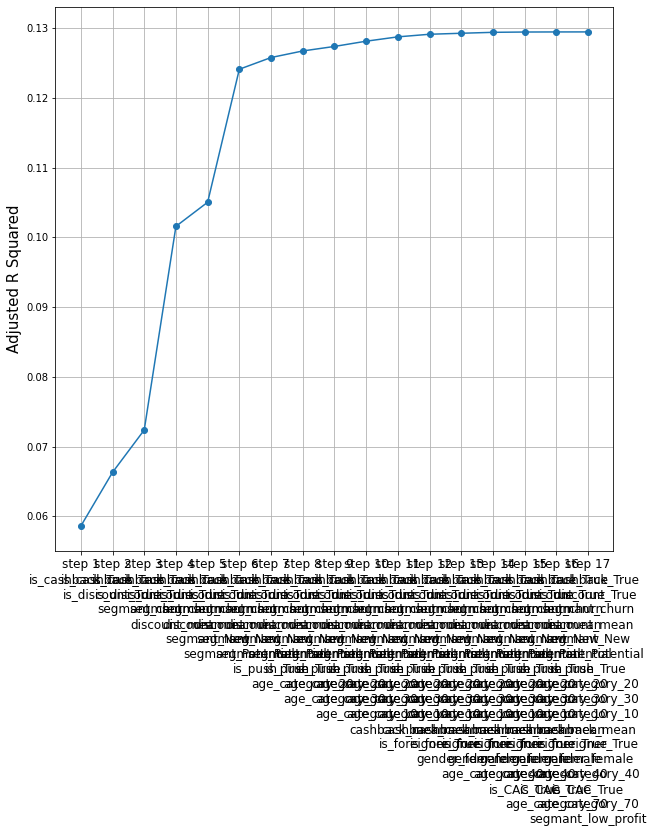

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
x = last_last[['cashback_mean',
 'segmant_churn',
 'discount_mean',
 'is_cashback_True',
 'segmant_Potential',
 'segmant_New',
 'is_push_True',
 'is_discount_True',
 'age_category_20',
 'age_category_30',
 'age_category_10',
 'is_foreigner_True',
 'gender_female',
 'age_category_40',
 'is_CAC_True',
 'age_category_70',
 'segmant_low_profit']]
y = last_last[['clv']]  # clv 컬럼만
multi_model = sm.OLS(y, x)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    clv   R-squared (uncentered):                   0.233
Model:                            OLS   Adj. R-squared (uncentered):              0.233
Method:                 Least Squares   F-statistic:                              9675.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:01:29   Log-Likelihood:                     -8.1189e+06
No. Observations:              541019   AIC:                                  1.624e+07
Df Residuals:                  541002   BIC:                                  1.624e+07
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
cashback_mean         38.2754      1.706     22.438      0.000      34.932      41.619
segmant_churn      -2.898e+04   3495.835     -8.290      0.000   -3.58e+04   -2.21e+04
discount_mean         84.2592      0.559    150.615      0.000      83.163      85.356
is_cashback_True    3.481e+05   2952.006    117.923      0.000    3.42e+05    3.54e+05
segmant_Potential  -4.287e+05   4043.095   -106.035      0.000   -4.37e+05   -4.21e+05
segmant_New        -3.459e+05   3374.252   -102.525      0.000   -3.53e+05   -3.39e+05
is_push_True        6.205e+04   2230.969     27.811      0.000    5.77e+04    6.64e+04
is_discount_True    1.639e+05   6342.283     25.848      0.000    1.52e+05    1.76e+05
age_category_20    -7.766e+04   4136.300    -18.776      0.000   -8.58e+04   -6.96e+04
age_category_30    -3.892e+04   3981.897     -9.775      0.000   -4.67e+04   -3.11e+04
age_category_10     -1.44e+05   8332.555    -17.281      0.000    -1.6e+05   -1.28e+05
is_foreigner_True   2.141e+05   1.43e+04     14.963      0.000    1.86e+05    2.42e+05
gender_female       2.926e+04   2271.190     12.881      0.000    2.48e+04    3.37e+04
age_category_40     1.875e+04   4291.646      4.370      0.000    1.03e+04    2.72e+04
is_CAC_True         2.964e+04   5383.449      5.506      0.000    1.91e+04    4.02e+04
age_category_70      1.35e+05   2.45e+04      5.500      0.000    8.69e+04    1.83e+05
segmant_low_profit   -4.1e+05   2.21e+05     -1.856      0.063   -8.43e+05    2.29e+04
==============================================================================
Omnibus:                  1850430.497   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2661006787967.218
Skew:                          62.809   Prob(JB):                         0.00
Kurtosis:                   10867.089   Cond. No.                     6.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## cashback_rftm 계산식을 이용하여 구하기

In [ ]:
# 캐쉬백을 사용한적이 있는 사람들만의 컬럼
data_cashback = data[data['is_cashback']== True]
data_cashback.head(3)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category,year,MonthStarted,MonthPassed
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,I,1,Sun,10,2020-03,2020-03-22,True,True,under_$100,2.999779,True,0.0,False,2.999779,True,63,60,2020,2019-12,3
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,F,1,Thu,9,2020-03,2020-03-12,True,False,under_$100,3.000000,True,0.0,False,3.000000,True,37,30,2020,2020-01,2
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,I,1,Sat,8,2020-02,2020-02-01,True,False,under_$10,3.000000,True,0.0,False,3.000000,True,45,40,2020,2019-08,6


In [ ]:
data_cashback.to_csv('data_cashback.csv')

In [ ]:
# 컬럼 소개 year = 구매한 달, month = 구매 년-월,
# MonthStarted = 첫 구매달, MonthPassed = 첫 구매로부터 지난 개월 수

data_cashback['year'] = data_cashback['created_at'].dt.to_period(freq='A')   # A: year
data_cashback['month'] = data_cashback['created_at'].dt.to_period(freq='M')   # M: year - month


month_group = data_cashback.groupby('customer_id')['month']


# 캐쉬백이 시작한 달

data_cashback['MonthStarted_cash'] = month_group.transform(np.min)

data_cashback['MonthPassed_cash'] = (data_cashback['month'].dt.year - data_cashback['MonthStarted_cash'].dt.year) * 12 + (data_cashback['month'].dt.month - data_cashback['MonthStarted_cash'].dt.month)

In [ ]:
last =pd.to_datetime('2020-04-01 23:59:14.018000')


## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data_cashback.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']
# 최근 방문일로부터 얼마나 지났는지
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

## 각 고객별 구매횟수 & 금액 알아보자.
frequency_df = pd.DataFrame(data_cashback.groupby('customer_id', as_index=False)['created_at'].nunique())

money = pd.DataFrame(data_cashback.groupby('customer_id',as_index=False)['post_discount'].sum())

# 현재 - 첫구매
min_df = pd.DataFrame(data_cashback.groupby('customer_id',as_index=False)['created_at'].min())
min_df['T'] = min_df['created_at'].apply(lambda x: (last - x).days)
min_df.drop(columns =['created_at'],inplace = True )


## 데이터 병합
test_cashback = pd.merge(recency_df, min_df, how='left', on='customer_id') # money에 recency합치기
test_cashback = pd.merge(test_cashback, frequency_df, how ='left', on='customer_id') # frequency합치기
test_cashback = pd.merge(test_cashback,money,how = 'left', on='customer_id') # money합치기

test_cashback.columns = ['customer_id','recency', 'T', 'frequency','monetary'] # 열의 이름 바꿔주기

#Expressing "monetary value" as average earnings per purchase - monetary평균으로
test_cashback["monetary"] = test_cashback["monetary"] / test_cashback["frequency"]

#frequency must be greater than 1. - 1번 이상 구매자만
test_cashback = test_cashback[(test_cashback['frequency'] > 1)]
test_cashback.head(3)

,customer_id,recency,T,frequency,monetary
1,100,23,30,2,4995.000000
2,100004,12,32,4,11550.000000
3,100008,4,49,6,17778.333333


In [ ]:
test_cashback.columns = ['customer_id','recency_cashback','T_cashback','freqeuncy_cashback','monetary_cashback']
test_cashback.head(3)

,customer_id,recency_cashback,T_cashback,freqeuncy_cashback,monetary_cashback
1,100,23,30,2,4995.000000
2,100004,12,32,4,11550.000000
3,100008,4,49,6,17778.333333


# 8월 26일 (희구)


#8월 29일 (희구)

In [ ]:
data[data.month == '2019-08'].groupby('gender').mean()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,count,hour,is_covid_A,is_covid_B,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age
gender,,,,,,,,,,,,,,,,
female,17162.282668,15012.628105,0.0,2149.654564,2149.654564,1.0,12.866452,0.0,0.0,0.0,0.0,16.238530,0.940894,16.238530,0.940894,35.792191
male,16243.291665,13648.439183,0.0,2594.852482,2594.852482,1.0,12.437213,0.0,0.0,0.0,0.0,23.656765,0.958201,23.656765,0.958201,37.854650


In [ ]:
pd.get_dummies(data['weekday'])

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
5623805,0,0,0,0,1,0,0
5623806,1,0,0,0,0,0,0
5623807,0,0,0,1,0,0,0
5623808,0,0,0,0,0,1,0


In [ ]:
aaa = data.groupby('customer_id')['weekday'].value_counts()

In [ ]:
aaa

customer_id  weekday
1            Sun         1
             Tue         1
10           Wed         2
100          Mon        11
             Fri         9
                        ..
99996        Mon         5
             Sat         2
99998        Mon         1
             Sun         1
99999        Tue         1
Name: weekday, Length: 1747840, dtype: int64

In [ ]:
data.set_index('customer_id')['weekday'].str.get_dummies().max(level=0).reset_index()

,customer_id,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,207317,1,1,1,1,1,1,1
1,95246,1,1,1,1,1,1,1
2,208074,1,1,1,0,1,1,1
3,15552,1,1,1,1,1,1,1
4,511595,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
541014,351958,0,0,0,0,0,0,1
541015,254863,0,0,0,0,1,0,0
541016,310276,0,1,0,0,0,0,0
541017,434118,1,0,0,0,0,0,0


In [ ]:
asd = pd.pivot_table(data,                # 피벗할 데이터프레임
                     index = 'customer_id',    # 행 위치에 들어갈 열
                     columns = 'weekday',    # 열 위치에 들어갈 열
                     values = 'created_at',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
asd = asd.fillna(0)
asd

weekday,Fri,Mon,Sat,Sun,Thu,Tue,Wed
customer_id,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,2.0
100,9.0,11.0,0.0,6.0,7.0,4.0,5.0
1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
99994,0.0,1.0,1.0,0.0,0.0,2.0,0.0
99995,0.0,1.0,0.0,0.0,0.0,1.0,3.0
99996,0.0,5.0,2.0,9.0,0.0,0.0,0.0


In [ ]:
asd1 = asd.copy()

In [ ]:
asd1.columns = asd1.columns.values

In [ ]:
asd1.reset_index(level=0,inplace=True)
asd1

,customer_id,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,100,9.0,11.0,0.0,6.0,7.0,4.0,5.0
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
541014,99994,0.0,1.0,1.0,0.0,0.0,2.0,0.0
541015,99995,0.0,1.0,0.0,0.0,0.0,1.0,3.0
541016,99996,0.0,5.0,2.0,9.0,0.0,0.0,0.0
541017,99998,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
qwe = pd.pivot_table(data,                # 피벗할 데이터프레임
                     index = 'customer_id',    # 행 위치에 들어갈 열
                     columns = 'hour',    # 열 위치에 들어갈 열
                     values = 'created_at',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
qwe = qwe.fillna(0)
qwe

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,1.0,3.0,3.0,4.0,3.0,3.0,6.0,4.0,2.0,3.0,1.0,0.0,1.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99996,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
day_hour = pd.merge(asd1, qwe, on = 'customer_id', how = 'left')

In [ ]:
day_hour

,customer_id,Fri,Mon,Sat,Sun,Thu,Tue,Wed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,9.0,11.0,0.0,6.0,7.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,1.0,3.0,3.0,4.0,3.0,3.0,6.0,4.0,2.0,3.0,1.0,0.0,1.0,0.0
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541014,99994,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541015,99995,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
541016,99996,0.0,5.0,2.0,9.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0
541017,99998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
day_hour

,customer_id,Fri,Mon,Sat,Sun,Thu,Tue,Wed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,9.0,11.0,0.0,6.0,7.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,1.0,3.0,3.0,4.0,3.0,3.0,6.0,4.0,2.0,3.0,1.0,0.0,1.0,0.0
3,1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541014,99994,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541015,99995,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
541016,99996,0.0,5.0,2.0,9.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0
541017,99998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
covid = pd.read_csv('covid.csv', index_col = 0)
covid.head()

,customer_id,covid_buy
0,207317,10.0
1,95246,20.0
2,208074,15.0
3,15552,21.0
4,511595,3.0


In [ ]:
covid.columns

Index(['customer_id', 'covid_buy'], dtype='object')

In [ ]:
asd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541019 entries, 0 to 541018
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  541019 non-null  object 
 1   Fri          541019 non-null  float64
 2   Mon          541019 non-null  float64
 3   Sat          541019 non-null  float64
 4   Sun          541019 non-null  float64
 5   Thu          541019 non-null  float64
 6   Tue          541019 non-null  float64
 7   Wed          541019 non-null  float64
dtypes: float64(7), object(1)
memory usage: 33.0+ MB


In [ ]:
covid['customer_id'] = covid['customer_id'].astype('int')
asd1['customer_id'] = asd1['customer_id'].astype('int')

In [ ]:
asd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541019 entries, 0 to 541018
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  541019 non-null  int64  
 1   Fri          541019 non-null  float64
 2   Mon          541019 non-null  float64
 3   Sat          541019 non-null  float64
 4   Sun          541019 non-null  float64
 5   Thu          541019 non-null  float64
 6   Tue          541019 non-null  float64
 7   Wed          541019 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 33.0 MB


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541019 entries, 0 to 541018
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  541019 non-null  int64  
 1   covid_buy    541019 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 12.4 MB


In [ ]:
heegu = pd.merge(covid, asd1, on = 'customer_id', how = 'left')

In [ ]:
covid_0 = pd.read_csv('covid_0.csv', index_col = 0)
covid_0.head()

,customer_id,covid_x_num
0,207317,3.0
1,95246,0.0
2,208074,32.0
3,15552,3.0
4,511595,0.0


In [ ]:
covid0 = pd.pivot_table(data,                # 피벗할 데이터프레임
                     index = 'customer_id',    # 행 위치에 들어갈 열
                     columns = 'hour',    # 열 위치에 들어갈 열
                     values = 'created_at',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
covid0 = covid_0.fillna(0)
covid0

,customer_id,covid_x_num
0,207317,3.0
1,95246,0.0
2,208074,32.0
3,15552,3.0
4,511595,0.0
...,...,...
541014,351958,1.0
541015,254863,1.0
541016,310276,1.0
541017,434118,0.0


In [ ]:
covid0['customer_id'] = covid['customer_id'].astype('int')


In [ ]:
heegu = pd.merge(heegu, covid0, on = 'customer_id', how = 'left')

In [ ]:
heegu

,customer_id,covid_buy,Fri,Mon,Sat,Sun,Thu,Tue,Wed,covid_x_num
0,207317,10.0,3.0,2.0,2.0,1.0,1.0,3.0,1.0,3.0
1,95246,20.0,2.0,3.0,1.0,3.0,6.0,1.0,4.0,0.0
2,208074,15.0,1.0,22.0,7.0,0.0,12.0,3.0,2.0,32.0
3,15552,21.0,4.0,7.0,3.0,1.0,5.0,3.0,1.0,3.0
4,511595,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
541014,351958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
541015,254863,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
541016,310276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
541017,434118,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
heegu.to_csv('heegu.csv') #csv파일로 생성


In [ ]:
data.to_csv('chacha.csv')

In [ ]:
data.head(10)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,I,1,Sun,10,2020-03,2020-03-22,True,True,under_$100,2.999779,True,0.000000,False,2.999779,True,63,60
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,F,1,Thu,9,2020-03,2020-03-12,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,37,30
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,I,1,Sat,8,2020-02,2020-02-01,True,False,under_$10,3.000000,True,0.000000,False,3.000000,True,45,40
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,D,1,Fri,10,2020-03,2020-03-06,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,24,20
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,E,1,Fri,12,2020-03,2020-03-13,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,21,20
5,542961,2020-03-02 19:32:27.893,30900,30900,927,0,927,False,female,False,1979-08-12,2019-06-27 11:38:07.948,B,1,Mon,19,2020-03,2020-03-02,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,41,40
6,31330,2020-01-07 21:03:33.007,32100,31100,1605,1000,2605,True,female,False,1974-02-16,2019-06-19 10:40:54.152,B,1,Tue,21,2020-01,2020-01-07,False,False,under_$100,5.000000,True,3.115265,True,8.115265,True,46,40
7,253327,2020-03-04 15:55:26.624,4618,4618,138,0,138,False,female,False,1986-05-15,2019-08-29 07:14:50.635,J,1,Wed,15,2020-03,2020-03-04,True,False,under_$10,2.988307,True,0.000000,False,2.988307,True,34,30
8,524243,2020-03-23 15:55:17.518,15900,13900,318,2000,2318,True,female,False,1987-07-20,2019-07-22 21:39:32.909,F,1,Mon,15,2020-03,2020-03-23,True,True,under_$100,2.000000,True,12.578616,True,14.578616,True,33,30
9,168043,2020-01-21 20:02:59.730,26750,25750,1337,1000,2337,True,male,False,1977-03-21,2019-11-18 17:06:32.900,B,1,Tue,20,2020-01,2020-01-21,True,False,under_$100,4.998131,True,3.738318,True,8.736449,True,43,40


# 파이널 데이터 병합(final.csv)

In [ ]:
# 데이터 불러오기

covid_0 = pd.read_csv('covid_0.csv')
covid = pd.read_csv('covid.csv')
seungwoo = pd.read_csv('seungwoo.csv')
heegu = pd.read_csv('heegu.csv')


In [ ]:
covid_m = pd.merge(covid_0, covid, on = 'customer_id', how = 'left')
m = pd.merge(covid_m, seungwoo, on = 'customer_id', how = 'left')
m['customer_id'] = m['customer_id'].astype(str)
m.drop(['Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y'], inplace = True, axis = 1)

heegu.drop(['Unnamed: 0'], inplace = True, axis = 1)
heegu['customer_id'] = heegu['customer_id'].astype(str)

In [ ]:
m = pd.merge(m,heegu, how='left',on = ['customer_id','covid_buy','covid_x_num'])
m

In [ ]:
final_rft = pd.merge(test_cashback, test, on ='customer_id',how = 'outer')
final_rft.head(3)

,customer_id,recency_cashback,T_cashback,freqeuncy_cashback,monetary_cashback,recency,T,frequency,monetary,clv
0,100,23.0,30.0,2.0,4995.000000,23,219,42,11369.642857,15364.382239
1,100004,12.0,32.0,4.0,11550.000000,3,177,11,8435.636364,11399.508600
2,100008,4.0,49.0,6.0,17778.333333,4,53,7,16081.428571,21731.660232


In [ ]:
final = pd.merge(m, final_rft, on ='customer_id',how = 'left')
final.head(3)

,customer_id,covid_x_num,covid_buy,gender,age,age_category,push_num,Fri,Mon,Sat,Sun,Thu,Tue,Wed,recency_cashback,T_cashback,freqeuncy_cashback,monetary_cashback,recency,T,frequency,monetary,clv
0,207317,3.0,10.0,female,63,60,13.0,3.0,2.0,2.0,1.0,1.0,3.0,1.0,10.0,32.0,6.0,32326.500000,10.0,121.0,13.0,21894.153846,29586.694387
1,95246,0.0,20.0,female,37,30,20.0,2.0,3.0,1.0,3.0,6.0,1.0,4.0,1.0,39.0,17.0,27551.058824,1.0,90.0,20.0,25965.150000,35088.040541
2,208074,32.0,15.0,female,45,40,47.0,1.0,22.0,7.0,0.0,12.0,3.0,2.0,30.0,60.0,7.0,18102.857143,30.0,230.0,47.0,17891.957447,24178.320874


In [ ]:
final

,customer_id,covid_x_num,covid_buy,gender,age,age_category,push_num,Fri,Mon,Sat,Sun,Thu,Tue,Wed,recency_cashback,T_cashback,freqeuncy_cashback,monetary_cashback,recency,T,frequency,monetary,clv
0,207317,3.0,10.0,female,63,60,13.0,3.0,2.0,2.0,1.0,1.0,3.0,1.0,10.0,32.0,6.0,32326.500000,10.0,121.0,13.0,21894.153846,29586.694387
1,95246,0.0,20.0,female,37,30,20.0,2.0,3.0,1.0,3.0,6.0,1.0,4.0,1.0,39.0,17.0,27551.058824,1.0,90.0,20.0,25965.150000,35088.040541
2,208074,32.0,15.0,female,45,40,47.0,1.0,22.0,7.0,0.0,12.0,3.0,2.0,30.0,60.0,7.0,18102.857143,30.0,230.0,47.0,17891.957447,24178.320874
3,15552,3.0,21.0,male,24,20,0.0,4.0,7.0,3.0,1.0,5.0,3.0,1.0,6.0,54.0,20.0,15134.000000,6.0,219.0,24.0,15068.333333,20362.612613
4,511595,0.0,3.0,female,21,20,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0,19.0,2.0,21300.000000,18.0,20.0,3.0,20133.333333,27207.207207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541014,351958,1.0,0.0,female,34,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541015,254863,1.0,0.0,male,39,30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541016,310276,1.0,0.0,male,22,20,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541017,434118,0.0,1.0,male,25,20,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final = final[['customer_id','gender', 'age','age_category', 'push_num','covid_x_num', 'covid_buy',
          'recency', 'T', 'frequency',  'monetary','clv','recency_cashback', 'T_cashback', 'freqeuncy_cashback',
       'monetary_cashback','Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

In [ ]:
final = final.fillna(0)
final.to_csv('final.csv',index = False)

# 파이널

In [ ]:
final = pd.read_csv('final.csv')
final

,customer_id,gender,age,age_category,push_num,covid_x_num,covid_buy,recency,T,frequency,monetary,clv,recency_cashback,T_cashback,freqeuncy_cashback,monetary_cashback,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,207317,female,63,60,13.0,3.0,10.0,10.0,121.0,13.0,21894.153846,29586.694387,10.0,32.0,6.0,32326.500000,2.0,3.0,1.0,1.0,3.0,2.0,1.0
1,95246,female,37,30,20.0,0.0,20.0,1.0,90.0,20.0,25965.150000,35088.040541,1.0,39.0,17.0,27551.058824,3.0,1.0,4.0,6.0,2.0,1.0,3.0
2,208074,female,45,40,47.0,32.0,15.0,30.0,230.0,47.0,17891.957447,24178.320874,30.0,60.0,7.0,18102.857143,22.0,3.0,2.0,12.0,1.0,7.0,0.0
3,15552,male,24,20,0.0,3.0,21.0,6.0,219.0,24.0,15068.333333,20362.612613,6.0,54.0,20.0,15134.000000,7.0,3.0,1.0,5.0,4.0,3.0,1.0
4,511595,female,21,20,3.0,0.0,3.0,18.0,20.0,3.0,20133.333333,27207.207207,18.0,19.0,2.0,21300.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541014,351958,female,34,30,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
541015,254863,male,39,30,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
541016,310276,male,22,20,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
541017,434118,male,25,20,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
final.isnull().sum()

customer_id           0
gender                0
age                   0
age_category          0
push_num              0
covid_x_num           0
covid_buy             0
recency               0
T                     0
frequency             0
monetary              0
clv                   0
recency_cashback      0
T_cashback            0
freqeuncy_cashback    0
monetary_cashback     0
Mon                   0
Tue                   0
Wed                   0
Thu                   0
Fri                   0
Sat                   0
Sun                   0
dtype: int64

In [ ]:
final_cashback = final[final['recency_cashback'] != 0]
final_non_cashback= final[final['recency_cashback'] == 0]

In [ ]:
final_cashback.to_csv('final_cashback.csv',index = False)
final_non_cashback.to_csv('final_non_cashback.csv',index = False)

In [ ]:
final.head(3)

,customer_id,gender,age,age_category,push_num,covid_x_num,covid_buy,recency,T,frequency,monetary,clv,recency_cashback,T_cashback,freqeuncy_cashback,monetary_cashback,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,207317,female,63,60,13.0,3.0,10.0,10.0,121.0,13.0,21894.153846,29586.694387,10.0,32.0,6.0,32326.500000,2.0,3.0,1.0,1.0,3.0,2.0,1.0
1,95246,female,37,30,20.0,0.0,20.0,1.0,90.0,20.0,25965.150000,35088.040541,1.0,39.0,17.0,27551.058824,3.0,1.0,4.0,6.0,2.0,1.0,3.0
2,208074,female,45,40,47.0,32.0,15.0,30.0,230.0,47.0,17891.957447,24178.320874,30.0,60.0,7.0,18102.857143,22.0,3.0,2.0,12.0,1.0,7.0,0.0


# RFM 세그먼트

In [ ]:
seg = pd.read_csv('last_last2.csv')

In [ ]:
seg.head(3)

,Unnamed: 0,Unnamed: 0.1,customer_id,push_num,age,age_category,gender,sell,push_rate,discount_mean,cashback_mean,recency,T,frequency,monetary,clv,f_socre,r_socre,discount_amount,m_socre
0,0,0,207317,13.0,63,60,female,13.0,1.0,615.384615,447.538462,10,121,13,283561.076923,4.573566e+05,3,1,5000,4
1,1,1,95246,20.0,37,30,female,20.0,1.0,100.000000,987.950000,1,90,20,518215.050000,8.358307e+05,4,1,0,4
2,2,2,208074,47.0,45,40,female,47.0,1.0,1089.148936,80.872340,30,230,47,839751.978723,1.354439e+06,4,2,5000,4


In [ ]:
#  R-F 행렬
rf_matrix = seg.groupby(['r_socre', 'f_socre']).agg({
    'customer_id': 'count',
    'm_socre': 'sum'}).reset_index()

rf_matrix['avg_sales'] = rf_matrix['m_socre']/rf_matrix['customer_id']
rf_matrix

,r_socre,f_socre,customer_id,m_socre,avg_sales
0,1,1,13207,40965,3.101764
1,1,2,12396,47996,3.871894
2,1,3,24930,99653,3.997312
3,1,4,48227,192908,4.000000
4,2,1,28298,82940,2.930949
5,2,2,23674,91247,3.854313
6,2,3,34366,137337,3.996304
7,2,4,29447,117788,4.000000
8,3,1,53845,144616,2.685783
9,3,2,30466,114481,3.757664


In [ ]:
rf_pivot = rf_matrix.pivot(index='f_socre', columns='r_socre', values='customer_id')  #.fillna(0).sort_index(ascending=False)

rf_pivot.style.background_gradient(cmap ='Blues', axis=None, low=0.2)

r_socre,1,2,3,4
f_socre,,,,
1,13207,28298,53845,137681
2,12396,23674,30466,35913
3,24930,34366,30607,19711
4,48227,29447,14173,4078


In [ ]:
rf_pivot = rf_matrix.pivot(index='f_socre', columns='r_socre', values='avg_sales')  #.fillna(0).sort_index(ascending=False)

rf_pivot.style.background_gradient(cmap ='Blues', axis=None, low=0.2)

r_socre,1,2,3,4
f_socre,,,,
1,3.101764,2.930949,2.685783,2.790879
2,3.871894,3.854313,3.757664,3.810737
3,3.997312,3.996304,3.985951,3.987469
4,4.000000,4.000000,4.000000,4.000000


r_socre,1,2,3,4
f_socre,,,,
4,48227,29447,14173,4078
3,24930,34366,30607,19711
2,12396,23674,30466,35913
1,5632,11515,20057,35501


# 빌드업 (희구)


In [ ]:
data.groupby('weekday').mean()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,count,hour,is_covid_A,is_covid_B,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age
weekday,,,,,,,,,,,,,,,,
Fri,17673.780247,16396.052066,120.889126,1277.728181,1398.617307,1.0,12.141668,0.293573,0.024258,0.689060,0.192881,9.457690,0.751416,10.146749,0.912210,36.677640
Mon,23616.241568,21989.397784,117.952123,1626.843784,1744.795907,1.0,12.676190,0.288999,0.043493,0.633605,0.179281,11.373400,0.738401,12.007005,0.888633,36.681189
Sat,19046.642679,17712.681190,130.192896,1333.961488,1464.154384,1.0,12.646209,0.306704,0.025940,0.716142,0.206709,9.661357,0.742014,10.377498,0.906546,36.913554
Sun,19442.767197,18161.809438,136.884513,1280.957759,1417.842272,1.0,13.481264,0.301813,0.045150,0.731580,0.211017,8.701299,0.716022,9.432879,0.899041,36.703301
Thu,18961.393663,17383.282849,110.144120,1578.110814,1688.254934,1.0,12.329492,0.287577,0.021571,0.602748,0.170850,11.795286,0.743583,12.398033,0.886410,36.498903
Tue,22176.188981,20792.466627,129.066201,1383.722353,1512.788554,1.0,12.491490,0.325897,0.043799,0.681670,0.194598,9.139808,0.743802,9.821477,0.908886,36.402637
Wed,20863.290255,19503.554596,119.377648,1359.735658,1479.113306,1.0,12.515601,0.301701,0.023531,0.642229,0.182111,9.077728,0.750231,9.719957,0.902606,36.531967


In [ ]:
data.groupby('weekday')['customer_id'].value_counts()

weekday  customer_id
Fri      45419          418
         445691         390
         485910         205
         262049         196
         400418         182
                       ... 
Wed      99978            1
         99981            1
         99987            1
         99988            1
         99989            1
Name: customer_id, Length: 1747840, dtype: int64

In [ ]:
data.groupby('hour')['customer_id'].value_counts()

hour  customer_id
0     530784         197
      270151         148
      465002         135
      517166         133
      192938         132
                    ... 
23    99962            1
      99974            1
      99978            1
      9998             1
      99983            1
Name: customer_id, Length: 2710505, dtype: int64

In [ ]:
data1010 = data[['customer_id','hour','weekday']]

In [ ]:
data1010.to_csv('./data1010.csv')

In [ ]:
#가장 많이 중복 결제건은 27건
data01  = data[data.days == '2020-01-30']

In [ ]:

data01 = data01.astype({'customer_id':'int64'})

In [ ]:
#data01['customer_id'].value_counts()
data01 = data01[data.customer_id == '498862']

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,I,1,Sun,10,2020-03,2020-03-22,True,True,under_$100,2.999779,True,0.000000,False,2.999779,True,63,60
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,F,1,Thu,9,2020-03,2020-03-12,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,37,30
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,I,1,Sat,8,2020-02,2020-02-01,True,False,under_$10,3.000000,True,0.000000,False,3.000000,True,45,40
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,D,1,Fri,10,2020-03,2020-03-06,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,24,20
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,E,1,Fri,12,2020-03,2020-03-13,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,21,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623805,434398,2019-12-12 07:48:51.491,7547,7547,0,0,0,True,female,False,1975-02-06,2019-06-17 11:09:42.453,E,1,Thu,7,2019-12,2019-12-12,False,False,under_$10,0.000000,False,0.000000,False,0.000000,False,44,40
5623806,481515,2019-12-20 07:37:15.259,22900,20900,0,2000,2000,True,female,False,1989-01-23,2019-08-22 01:26:58.339,B,1,Fri,7,2019-12,2019-12-20,False,False,under_$100,0.000000,False,8.733624,True,8.733624,True,30,30
5623807,298192,2020-01-05 01:55:28.331,19790,18790,0,1000,1000,True,female,False,1985-04-06,2019-09-13 17:15:21.732,A,1,Sun,1,2020-01,2020-01-05,False,False,under_$100,0.000000,False,5.053057,True,5.053057,True,35,30
5623808,430962,2019-10-01 03:32:17.435,15921,14152,0,1769,1769,False,male,False,1983-07-25,2019-06-20 00:59:09.309,C,1,Tue,3,2019-10,2019-10-01,False,False,under_$100,0.000000,False,11.111111,True,11.111111,True,36,30


# 9월 14일 빌드업 [희구]

In [ ]:
data.describe(include='all')

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category
count,5614897,5614897,5.614897e+06,5.614897e+06,5.614897e+06,5.614897e+06,5.614897e+06,5614897,5614897,5614897,5614897,5614897,5614897,5614897.0,5614897,5.614897e+06,5614897,5614897,5614897,5614897,5614897,5.614897e+06,5614897,5.614897e+06,5614897,5.614897e+06,5614897,5.614897e+06,5614897.0
unique,541019,5613737,NaN,NaN,NaN,NaN,NaN,2,2,2,19945,540910,10,NaN,7,NaN,8,244,2,2,4,NaN,2,NaN,2,NaN,2,NaN,10.0
top,45419,2020-01-30 00:12:06.592000,NaN,NaN,NaN,NaN,NaN,True,female,False,1990-01-22 00:00:00,2019-06-18 08:52:13.835000,C,NaN,Mon,NaN,2020-01,2019-08-01,False,False,under_$100,NaN,False,NaN,True,NaN,True,NaN,30.0
freq,2705,3,NaN,NaN,NaN,NaN,NaN,2904339,4063733,5552918,3329,2705,625359,NaN,1030422,NaN,938381,46952,3928987,5429514,2890399,NaN,4549262,NaN,4160794,NaN,5053320,NaN,2267754.0
first,NaN,2019-08-01 00:32:56.331000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919-05-15 00:00:00,2019-05-02 15:38:01.007000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-03-31 23:59:14.018000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-22 00:00:00,2020-03-31 23:52:26.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.044032e+04,1.902131e+04,1.228634e+02,1.419001e+03,1.541865e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.259913e+01,NaN,NaN,NaN,NaN,NaN,6.671457e-01,NaN,9.972344e+00,NaN,1.063949e+01,NaN,3.662117e+01,NaN
std,NaN,NaN,4.860806e+04,4.743104e+04,5.939649e+02,1.956764e+03,1.975686e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,6.835884e+00,NaN,NaN,NaN,NaN,NaN,1.443349e+00,NaN,1.145947e+01,NaN,1.115725e+01,NaN,9.454133e+00,NaN
min,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,1.400000e+01,NaN
25%,NaN,NaN,7.900000e+03,6.900000e+03,0.000000e+00,0.000000e+00,5.400000e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,8.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,3.191489e+00,NaN,3.000000e+01,NaN


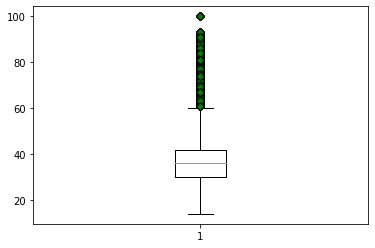

In [ ]:
#나이대 박스 플롯
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(data['age'], flierprops=green_diamond)
plt.show()

In [ ]:
Q1 = data['age'].quantile(q=0.25)
Q3 = data['age'].quantile(q=0.75)
print(Q1)
print(Q3)

30.0
42.0


In [ ]:
IQR = Q3-Q1
IQR

12.0

In [ ]:
IQR_df = data[(data['age'] <= 42+1.5*12) & (data['age'] >= 30-1.5*12)]
IQR_df = IQR_df['age']

print('origin_df :', len(data))
print('IQR_df :', len(IQR_df))

origin_df : 5614897
IQR_df : 5532430


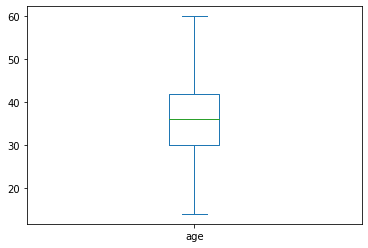

In [ ]:
IQR_df.plot.box()

In [ ]:
IQR_df.min()

14

In [ ]:
index1 = data[data['age'] > 60].index
#data.drop(index1)

82467


결제 건 수 이상치 알아보기 : 2020 - 01 - 30 / 2019 - 09 - 16


In [ ]:
data_2019  = data[data.days == '2019-09-06']

In [ ]:
data_2019 = data_2019.groupby('customer_id').count()

In [ ]:
data_2019[data_2019.created_at == 14]

,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
156394,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [ ]:
data_2019 = data_2019.astype({'customer_id':'int64'})

In [ ]:
data[(data['days'] == '2019-09-06') & (data['customer_id'] == '156394')]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category
4244444,156394,2019-09-06 09:22:11.333,17900,17900,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,G,1,Fri,9,2019-09,2019-09-06,False,False,under_$100,0.0,False,0.000000,False,0.000000,False,41,40
4300217,156394,2019-09-06 06:05:36.363,590,590,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,C,1,Fri,6,2019-09,2019-09-06,False,False,under_$10,0.0,False,0.000000,False,0.000000,False,41,40
4316111,156394,2019-09-06 06:33:04.787,2970,2970,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,I,1,Fri,6,2019-09,2019-09-06,False,False,under_$10,0.0,False,0.000000,False,0.000000,False,41,40
4441298,156394,2019-09-06 13:51:27.787,38640,38640,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,F,1,Fri,13,2019-09,2019-09-06,False,False,under_$100,0.0,False,0.000000,False,0.000000,False,41,40
4442927,156394,2019-09-06 01:04:40.764,5346,4752,0,594,594,False,female,False,1978-04-30,2019-07-25 05:04:43.506,D,1,Fri,1,2019-09,2019-09-06,False,False,under_$10,0.0,False,11.111111,True,11.111111,True,41,40
4532137,156394,2019-09-06 08:59:34.831,3500,3500,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,C,1,Fri,8,2019-09,2019-09-06,False,False,under_$10,0.0,False,0.000000,False,0.000000,False,41,40
4563056,156394,2019-09-06 05:20:05.589,3500,3500,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,C,1,Fri,5,2019-09,2019-09-06,False,False,under_$10,0.0,False,0.000000,False,0.000000,False,41,40
4690062,156394,2019-09-06 10:00:34.109,1900,1900,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,B,1,Fri,10,2019-09,2019-09-06,False,False,under_$10,0.0,False,0.000000,False,0.000000,False,41,40
4730792,156394,2019-09-06 01:44:30.421,1782,1584,0,198,198,False,female,False,1978-04-30,2019-07-25 05:04:43.506,F,1,Fri,1,2019-09,2019-09-06,False,False,under_$10,0.0,False,11.111111,True,11.111111,True,41,40
4776699,156394,2019-09-06 12:01:50.348,2500,2500,0,0,0,False,female,False,1978-04-30,2019-07-25 05:04:43.506,A,1,Fri,12,2019-09,2019-09-06,False,False,under_$10,0.0,False,0.000000,False,0.000000,False,41,40


**결제 건수 박스 플롯 그려보기**

In [ ]:
cnt = data[data.month == '2020-01']
cnt = cnt.groupby('customer_id').count()
cnt

,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100005,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100006,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9999,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
99991,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [ ]:
cnt['created_at'].describe()

count    249317.000000
mean          3.763807
std           5.408151
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         409.000000
Name: created_at, dtype: float64

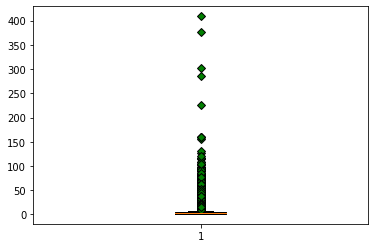

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(cnt['created_at'], flierprops=green_diamond)
plt.show()

In [ ]:
Q1 = cnt['created_at'].quantile(q=0.25)
Q3 = cnt['created_at'].quantile(q=0.75)
print(Q1)
print(Q3)

1.0
4.0


In [ ]:
IQR = Q3-Q1
IQR

3.0

In [ ]:
IQR_df = cnt[(cnt['created_at'] <= 4+3*9) & (cnt['created_at'] >= 1-3*9)]
IQR_df = IQR_df['created_at']

print('IQR_df :', len(IQR_df))

IQR_df : 247967


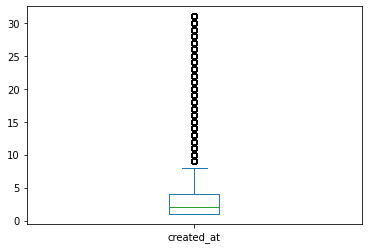

In [ ]:
IQR_df.plot.box()

In [ ]:
IQR_df.describe()

count    247967.000000
mean          3.538176
std           4.138769
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          31.000000
Name: created_at, dtype: float64

# Lifespan CLV

In [ ]:
# 고객별 평균 구매가치 : 전체 매출을 연간 총 구매건수로 나눕니다. 이 기간은 고정된 시간이어야 합니다.
data_atv = data.groupby('customer_id')['post_discount'].mean()

In [ ]:
# 평균구매빈도 : 구매횟수를 해당기간 구매한 고유한 고객수로 나눕니다.
#data_atf = data.groupby('customer_id')['created_at'].count()
#data_atf

<bound method IndexOpsMixin.nunique of 0          207317
1           95246
2          208074
3           15552
4          511595
            ...  
5623805    434398
5623806    481515
5623807    298192
5623808    430962
5623809    246136
Name: customer_id, Length: 5614897, dtype: object>

# [RUN]7건 post_discount 기준으로 중복 제거





In [ ]:
data = data.astype({'customer_id':'int64'})

In [ ]:
index01 = data[(data['days'] == '2020-01-30') & (data['customer_id'] == '498862')].index

In [ ]:
data = data.drop(index01)

In [ ]:
data = pd.concat([data, data01],axis = 0)

In [ ]:
data[(data['days'] == '2020-01-30') & (data['customer_id'] == '498862')].drop_duplicates(['post_discount'])

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category
2858366,498862,2020-01-30 21:28:26.035,9900,9900,0,0,0,True,female,True,1993-09-06,2019-11-28 10:55:01.076,E,1,Thu,21,2020-01,2020-01-30,True,False,under_$10,0.0,False,0.000000,False,0.000000,False,27,20
2905074,498862,2020-01-30 13:10:15.630,7900,7900,0,0,0,True,female,True,1993-09-06,2019-11-28 10:55:01.076,E,1,Thu,13,2020-01,2020-01-30,True,False,under_$10,0.0,False,0.000000,False,0.000000,False,27,20
3052645,498862,2020-01-30 11:42:05.623,7900,5900,0,2000,2000,True,female,True,1993-09-06,2019-11-28 10:55:01.076,E,1,Thu,11,2020-01,2020-01-30,True,False,under_$10,0.0,False,25.316456,True,25.316456,True,27,20
3384144,498862,2020-01-30 16:22:16.498,25900,24900,0,1000,1000,True,female,True,1993-09-06,2019-11-28 10:55:01.076,E,1,Thu,16,2020-01,2020-01-30,True,False,under_$100,0.0,False,3.861004,True,3.861004,True,27,20


In [ ]:
data

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,I,1,Sun,10,2020-03,2020-03-22,True,True,under_$100,2.999779,True,0.000000,False,2.999779,True,63,60
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,F,1,Thu,9,2020-03,2020-03-12,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,37,30
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,I,1,Sat,8,2020-02,2020-02-01,True,False,under_$10,3.000000,True,0.000000,False,3.000000,True,45,40
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,D,1,Fri,10,2020-03,2020-03-06,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,24,20
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,E,1,Fri,12,2020-03,2020-03-13,True,False,under_$100,3.000000,True,0.000000,False,3.000000,True,21,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623809,246136,2019-11-07 11:33:34.230,6750,6000,0,750,750,True,female,False,1987-08-20,2019-07-16 05:50:24.888,D,1,Thu,11,2019-11,2019-11-07,False,False,under_$10,0.000000,False,11.111111,True,11.111111,True,32,30
2858366,498862,2020-01-30 21:28:26.035,9900,9900,0,0,0,True,female,True,1993-09-06,2019-11-28 10:55:01.076,E,1,Thu,21,2020-01,2020-01-30,True,False,under_$10,0.000000,False,0.000000,False,0.000000,False,27,20
2905074,498862,2020-01-30 13:10:15.630,7900,7900,0,0,0,True,female,True,1993-09-06,2019-11-28 10:55:01.076,E,1,Thu,13,2020-01,2020-01-30,True,False,under_$10,0.000000,False,0.000000,False,0.000000,False,27,20
3052645,498862,2020-01-30 11:42:05.623,7900,5900,0,2000,2000,True,female,True,1993-09-06,2019-11-28 10:55:01.076,E,1,Thu,11,2020-01,2020-01-30,True,False,under_$10,0.000000,False,25.316456,True,25.316456,True,27,20


In [ ]:
55 + 40 + 36

131